In [1]:
# Importing all the necessary library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import pickle
import json
from matplotlib.ticker import FuncFormatter, MaxNLocator


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing Bangalore Dataset

In [3]:
# Importing Bangalore dataset
bengaluru_data = pd.read_csv("datasets/Bengaluru.csv")

In [4]:
# Printing first few rows
bengaluru_data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
# Printing the columns bangalore dataset
bengaluru_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# Dropping unnecessary columns in the dataset
bengaluru_data = bengaluru_data.drop(['area_type','society','balcony','availability'],axis='columns')
bengaluru_data.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [7]:
# Dropping and checking the null values 
bengaluru_data = bengaluru_data.dropna()
bengaluru_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
bengaluru_data.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [9]:
# Printing dimensions of the dataset
bengaluru_data.shape


(13246, 5)

In [10]:
# Printing the unique values of size column
bengaluru_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# Cleaning and manipulating the size column 
bengaluru_data['bhk'] = bengaluru_data['size'].apply(lambda x:int(x.split(' ')[0]))

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
bengaluru_data[~bengaluru_data['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [14]:
# This function splits the entries that are in range and returns mean of the lowest and highest.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

In [15]:
bengaluru_data['total_sqft']=bengaluru_data['total_sqft'].apply(convert_sqft_to_num)
bengaluru_data.head(3)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3

In [16]:
bengaluru_data['price'] = bengaluru_data['price']*100000

In [17]:
bengaluru_data.loc[30]

location       Yelahanka
size               4 BHK
total_sqft        2475.0
bath                 4.0
price         18600000.0
bhk                    4
Name: 30, dtype: object

In [18]:
bengaluru_data = bengaluru_data[~(bengaluru_data.total_sqft/bengaluru_data.bhk<300)]
bengaluru_data.shape

(12502, 6)

In [19]:
# Renaming columns to meaningful names
bengaluru_data.rename(columns={'bhk': 'No. of Bedrooms','price':'Price_INR'}, inplace=True)

In [20]:
# Dropping the size as we have created new column, ' No. of Bedrooms'
bengaluru_data = bengaluru_data.drop(['size'],axis='columns')

In [21]:
bengaluru_data.head()

location  total_sqft  bath   Price_INR  No. of Bedrooms
0  Electronic City Phase II      1056.0   2.0   3907000.0                2
1          Chikka Tirupathi      2600.0   5.0  12000000.0                4
2               Uttarahalli      1440.0   2.0   6200000.0                3
3        Lingadheeranahalli      1521.0   3.0   9500000.0                3
4                  Kothanur      1200.0   2.0   5100000.0                2

In [22]:
# Counting and printing the unique locations
bengaluru_data.location = bengaluru_data.location.apply(lambda x: x.strip())
location_stats = bengaluru_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                     534
Sarjapur  Road                 388
Electronic City                295
Kanakpura Road                 264
Thanisandra                    235
                              ... 
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
Kathreguppe                      1
Kathriguppe IV Phase             1
whitefiled                       1
Name: location, Length: 1211, dtype: int64

In [23]:
# Checking entries of locations which are equal to or less than 10.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
ISRO Layout                    10
Dodsworth Layout               10
Sadashiva Nagar                10
Gunjur Palya                   10
Nagappa Reddy Layout           10
                               ..
Karnataka Shabarimala           1
Kasthuri Nagar East Of NGEF     1
Kathreguppe                     1
Kathriguppe IV Phase            1
whitefiled                      1
Name: location, Length: 988, dtype: int64

In [24]:
# Locations occuring less than or equal to 10 identified as others
bengaluru_data.location = bengaluru_data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(bengaluru_data.location.unique())

224

In [25]:
bengaluru_data['Total_Rooms'] = bengaluru_data['No. of Bedrooms'] + 2

In [26]:
# Converting the price in GBP from local currency  (INR)
bengaluru_data['Price_GBP'] = bengaluru_data['Price_INR']*0.0094

In [27]:
bengaluru_data.tail()

location  total_sqft  bath   Price_INR  No. of Bedrooms  \
13315             Whitefield      3453.0   4.0  23100000.0                5   
13316                  other      3600.0   5.0  40000000.0                4   
13317  Raja Rajeshwari Nagar      1141.0   2.0   6000000.0                2   
13318        Padmanabhanagar      4689.0   4.0  48800000.0                4   
13319           Doddathoguru       550.0   1.0   1700000.0                1   

       Total_Rooms  Price_GBP  
13315            7   217140.0  
13316            6   376000.0  
13317            4    56400.0  
13318            6   458720.0  
13319            3    15980.0

In [28]:
# Checking null values
bengaluru_data.isna().sum()

location            0
total_sqft         46
bath                0
Price_INR           0
No. of Bedrooms     0
Total_Rooms         0
Price_GBP           0
dtype: int64

In [29]:
# Dropping null values if any
bengaluru_data.dropna(inplace=True)

In [30]:
# Calculating price per square feet and storing in another column
bengaluru_data['price_per_sqft'] = bengaluru_data['Price_INR']*100000/bengaluru_data['total_sqft']
bengaluru_data.head()

location  total_sqft  bath   Price_INR  No. of Bedrooms  \
0  Electronic City Phase II      1056.0   2.0   3907000.0                2   
1          Chikka Tirupathi      2600.0   5.0  12000000.0                4   
2               Uttarahalli      1440.0   2.0   6200000.0                3   
3        Lingadheeranahalli      1521.0   3.0   9500000.0                3   
4                  Kothanur      1200.0   2.0   5100000.0                2   

   Total_Rooms  Price_GBP  price_per_sqft  
0            4    36725.8    3.699811e+08  
1            6   112800.0    4.615385e+08  
2            5    58280.0    4.305556e+08  
3            5    89300.0    6.245891e+08  
4            4    47940.0    4.250000e+08

In [31]:
bengaluru_data.price_per_sqft.describe()

count    1.245600e+04
mean     6.308514e+08
std      4.168124e+08
min      2.678298e+07
25%      4.210526e+08
50%      5.294118e+08
75%      6.916667e+08
max      1.764706e+10
Name: price_per_sqft, dtype: float64

In [32]:
# Function to Removes outliers based on price per square foot (price_per_sqft) within each location group.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

bengaluru_data = remove_pps_outliers(bengaluru_data)
bengaluru_data

location  total_sqft  bath   Price_INR  No. of Bedrooms  \
0      1st Phase JP Nagar      2825.0   4.0  25000000.0                4   
1      1st Phase JP Nagar      1875.0   3.0  16700000.0                3   
2      1st Phase JP Nagar      1500.0   5.0   8500000.0                5   
3      1st Phase JP Nagar      2065.0   4.0  21000000.0                3   
4      1st Phase JP Nagar      2024.0   3.0  15700000.0                3   
...                   ...         ...   ...         ...              ...   
10261               other      1353.0   2.0  11000000.0                2   
10262               other       812.0   1.0   2600000.0                1   
10263               other      1440.0   2.0   6393000.0                3   
10264               other      1075.0   2.0   4800000.0                2   
10265               other      3600.0   5.0  40000000.0                4   

       Total_Rooms  Price_GBP  price_per_sqft  
0                6   235000.0    8.849558e+08  
1                5   156980.0    8.906667e+08  
2                7    79900.0    5.666667e+08  
3                5   197400.0    1.016949e+09  
4                5   147580.0    7.756917e+08  
...            ...        ...             ...  
10261            4   103400.0    8.130081e+08  
10262            3    24440.0    3.201970e+08  
10263            5    60094.2    4.439583e+08  
10264            4    45120.0    4.465116e+08  
10265            6   376000.0    1.111111e+09  

[10266 rows x 8 columns]

In [33]:
# Renaming the columns, this is important as we have 8 other cities dataset, we need same column name for better comparison.
bengaluru_data.rename(columns={
    'location': 'Location',
    'total_sqft': 'Area_sqft',
    'Price_INR': 'Local_price',
    'No. of Bedrooms': 'Bedrooms',
    'bath': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)


bengaluru_data.drop(columns=['Total_Rooms', 'price_per_sqft'], inplace=True)

In [34]:
bengaluru_data['City'] = 'Bengaluru'

In [35]:
# Rearrange the columns
bengaluru_data = bengaluru_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
bengaluru_data.head()

City            Location  Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Bengaluru  1st Phase JP Nagar     2825.0        4.0   25000000.0         4   
1  Bengaluru  1st Phase JP Nagar     1875.0        3.0   16700000.0         3   
2  Bengaluru  1st Phase JP Nagar     1500.0        5.0    8500000.0         5   
3  Bengaluru  1st Phase JP Nagar     2065.0        4.0   21000000.0         3   
4  Bengaluru  1st Phase JP Nagar     2024.0        3.0   15700000.0         3   

   Price_GBP  
0   235000.0  
1   156980.0  
2    79900.0  
3   197400.0  
4   147580.0

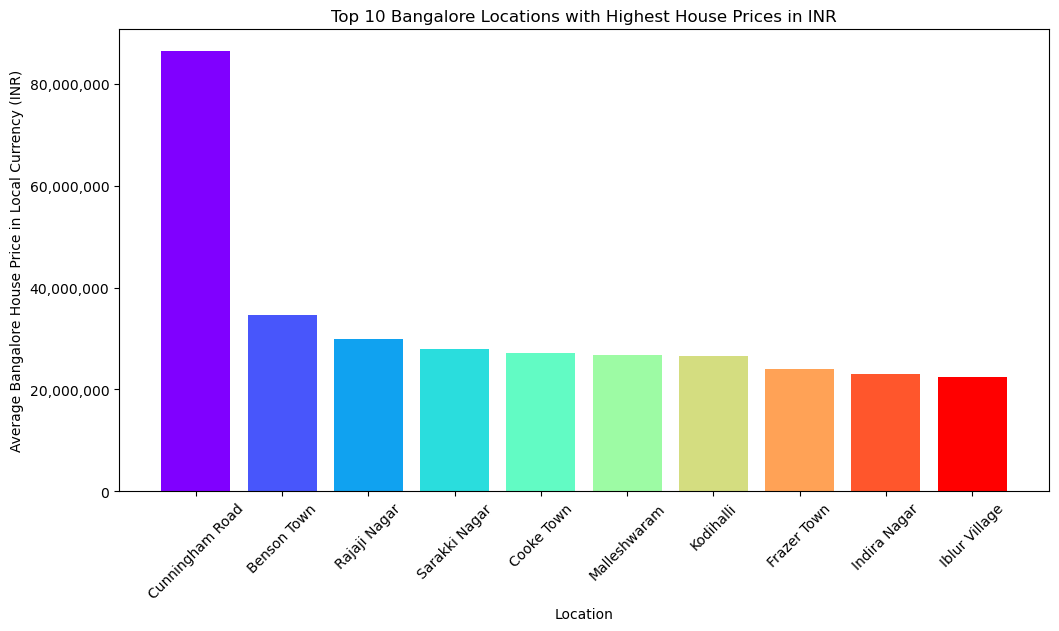

In [36]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = bengaluru_data.groupby('Location')['Local_price'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Local_price', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Local_price'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average Bangalore House Price in Local Currency (INR)')
plt.title('Top 10 Bangalore Locations with Highest House Prices in INR')
plt.xticks(rotation=45)
plt.show()

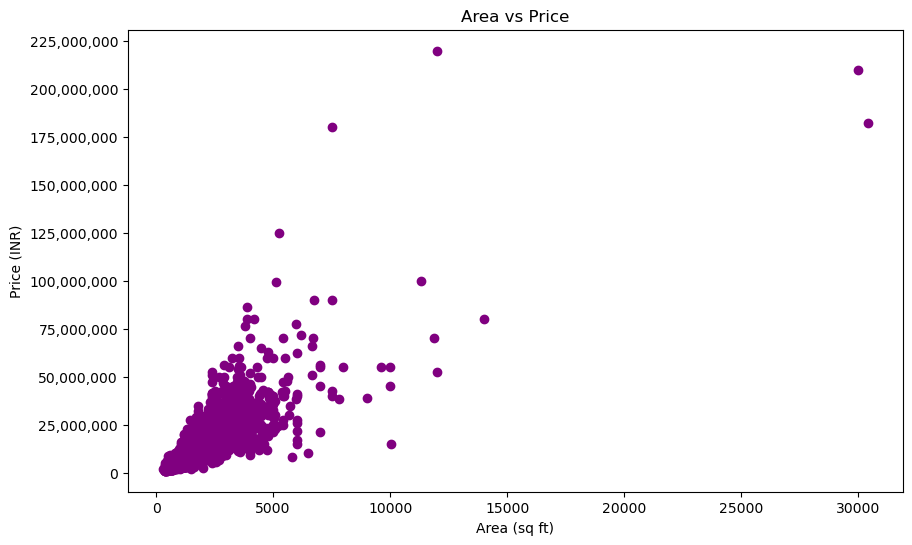

In [37]:
# Scatter plot to show the distribution of prices VS Area in sq. feet.
# Function to format y-axis labels as whole numbers
def format_func(value, tick_number):
    return f'{int(value):,}'

# Scatter Plot: Area vs Price
plt.figure(figsize=(10, 6))
plt.scatter(bengaluru_data['Area_sqft'], bengaluru_data['Local_price'], color='purple')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.title('Area vs Price')

# Ensure y-axis labels are in whole numbers
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

## Importing Pune Dataset

In [38]:
# Importing Pune Dataset
pune_data = pd.read_csv("datasets/Pune.csv")
pune_data.head()

area_type   availability       size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec      2 BHK  Coomee        1056   2.0   
1            Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move      3 BHK      NaN       1440   2.0   
3  Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   3.0   
4  Super built-up  Area  Ready To Move      2 BHK      NaN       1200   2.0   

   balcony   price    site_location  
0      1.0   39.07      Alandi Road  
1      3.0  120.00  Ambegaon Budruk  
2      3.0   62.00       Anandnagar  
3      1.0   95.00            Aundh  
4      1.0   51.00       Aundh Road

In [39]:
# Printing dimensions of Pune Dataset
pune_data.shape

(13320, 9)

In [40]:
pune_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [41]:
# Dropping the irrelevant columns of dataset
pune_data = pune_data.drop(['area_type','society','balcony','availability'],axis='columns')
pune_data.head()

size total_sqft  bath   price    site_location
0      2 BHK       1056   2.0   39.07      Alandi Road
1  4 Bedroom       2600   5.0  120.00  Ambegaon Budruk
2      3 BHK       1440   2.0   62.00       Anandnagar
3      3 BHK       1521   3.0   95.00            Aundh
4      2 BHK       1200   2.0   51.00       Aundh Road

In [42]:
# Renaming the location column
pune_data['location'] = pune_data['site_location']

In [43]:
pune_data['Price_INR'] = pune_data['price']*100000

In [44]:
pune_data = pune_data.drop(['price'],axis='columns')

In [45]:
pune_data.head()

size total_sqft  bath    site_location         location   Price_INR
0      2 BHK       1056   2.0      Alandi Road      Alandi Road   3907000.0
1  4 Bedroom       2600   5.0  Ambegaon Budruk  Ambegaon Budruk  12000000.0
2      3 BHK       1440   2.0       Anandnagar       Anandnagar   6200000.0
3      3 BHK       1521   3.0            Aundh            Aundh   9500000.0
4      2 BHK       1200   2.0       Aundh Road       Aundh Road   5100000.0

In [46]:
# Creating another column for GBP price unit
pune_data['Price_GBP'] = pune_data['Price_INR']*0.0094

In [47]:
pune_data = pune_data.drop(['site_location'],axis='columns')
pune_data.head()

size total_sqft  bath         location   Price_INR  Price_GBP
0      2 BHK       1056   2.0      Alandi Road   3907000.0    36725.8
1  4 Bedroom       2600   5.0  Ambegaon Budruk  12000000.0   112800.0
2      3 BHK       1440   2.0       Anandnagar   6200000.0    58280.0
3      3 BHK       1521   3.0            Aundh   9500000.0    89300.0
4      2 BHK       1200   2.0       Aundh Road   5100000.0    47940.0

In [48]:
# Checking the null values
pune_data.isnull().sum()

size          16
total_sqft     0
bath          73
location       1
Price_INR      0
Price_GBP      0
dtype: int64

In [49]:
# Dropping the null values
pune_data = pune_data.dropna()
pune_data.isnull().sum()

size          0
total_sqft    0
bath          0
location      0
Price_INR     0
Price_GBP     0
dtype: int64

In [50]:
pune_data.shape

(13246, 6)

In [51]:
# Printing the unique values in size column
pune_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [52]:
# Cleaning the 'bhk' column by splitting it
pune_data['bhk'] = pune_data['size'].apply(lambda x:int(x.split(' ')[0]))

In [53]:
pune_data.head()

size total_sqft  bath         location   Price_INR  Price_GBP  bhk
0      2 BHK       1056   2.0      Alandi Road   3907000.0    36725.8    2
1  4 Bedroom       2600   5.0  Ambegaon Budruk  12000000.0   112800.0    4
2      3 BHK       1440   2.0       Anandnagar   6200000.0    58280.0    3
3      3 BHK       1521   3.0            Aundh   9500000.0    89300.0    3
4      2 BHK       1200   2.0       Aundh Road   5100000.0    47940.0    2

In [54]:
pune_data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [55]:
# Dropping size column as we have stored total number of bedrooms in bhk column
pune_data = pune_data.drop(['size'],axis = 'columns')
pune_data.head()

total_sqft  bath         location   Price_INR  Price_GBP  bhk
0       1056   2.0      Alandi Road   3907000.0    36725.8    2
1       2600   5.0  Ambegaon Budruk  12000000.0   112800.0    4
2       1440   2.0       Anandnagar   6200000.0    58280.0    3
3       1521   3.0            Aundh   9500000.0    89300.0    3
4       1200   2.0       Aundh Road   5100000.0    47940.0    2

In [56]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [57]:
pune_data[~pune_data['total_sqft'].apply(is_float)].head(10)

total_sqft  bath      location   Price_INR  Price_GBP  bhk
30      2100 - 2850   4.0      Gultekdi  18600000.0   174840.0    4
122     3067 - 8156   4.0   Ganeshkhind  47700000.0   448380.0    4
137     1042 - 1105   2.0       Khadaki   5400500.0    50764.7    2
165     1145 - 1340   2.0  Prabhat Road   4349000.0    40880.6    2
188     1015 - 1540   2.0    Wakadewadi   5680000.0    53392.0    2
410  34.46Sq. Meter   1.0   Ganeshkhind   1850000.0    17390.0    1
549     1195 - 1440   2.0  Prabhat Road   6377000.0    59943.8    2
648       4125Perch   9.0  Raviwar Peth  26500000.0   249100.0    9
661     1120 - 1145   2.0    Tilak Road   4813000.0    45242.2    2
672     3090 - 5002   4.0   Alandi Road  44500000.0   418300.0    4

In [58]:
# Function to create area size in ranges to decimal numbers.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

In [59]:
# Checking if the function works well
convert_sqft_to_num('1000-12000')

6500.0

In [60]:
pune_data = pune_data.copy()


In [61]:
pune_data['total_sqft']=pune_data['total_sqft'].apply(convert_sqft_to_num)
pune_data.head(3)

total_sqft  bath         location   Price_INR  Price_GBP  bhk
0      1056.0   2.0      Alandi Road   3907000.0    36725.8    2
1      2600.0   5.0  Ambegaon Budruk  12000000.0   112800.0    4
2      1440.0   2.0       Anandnagar   6200000.0    58280.0    3

In [62]:
pune_data

total_sqft  bath              location   Price_INR  Price_GBP  bhk
0          1056.0   2.0           Alandi Road   3907000.0    36725.8    2
1          2600.0   5.0       Ambegaon Budruk  12000000.0   112800.0    4
2          1440.0   2.0            Anandnagar   6200000.0    58280.0    3
3          1521.0   3.0                 Aundh   9500000.0    89300.0    3
4          1200.0   2.0            Aundh Road   5100000.0    47940.0    2
...           ...   ...                   ...         ...        ...  ...
13315      3453.0   4.0                Pashan  23100000.0   217140.0    5
13316      3600.0   5.0             Paud Road  40000000.0   376000.0    4
13317      1141.0   2.0              Pirangut   6000000.0    56400.0    2
13318      4689.0   4.0          Prabhat Road  48800000.0   458720.0    4
13319       550.0   1.0  Pune Railway Station   1700000.0    15980.0    1

[13246 rows x 6 columns]

In [63]:
pune_data.loc[30]

total_sqft        2475.0
bath                 4.0
location        Gultekdi
Price_INR     18600000.0
Price_GBP       174840.0
bhk                    4
Name: 30, dtype: object

In [64]:
# Creating another column price_per_square_feet, so that outliers can be removed 
pune_data = pune_data.copy()
pune_data['price_per_sqft'] = pune_data['Price_INR']*100000/pune_data['total_sqft']
pune_data.head()

total_sqft  bath         location   Price_INR  Price_GBP  bhk  \
0      1056.0   2.0      Alandi Road   3907000.0    36725.8    2   
1      2600.0   5.0  Ambegaon Budruk  12000000.0   112800.0    4   
2      1440.0   2.0       Anandnagar   6200000.0    58280.0    3   
3      1521.0   3.0            Aundh   9500000.0    89300.0    3   
4      1200.0   2.0       Aundh Road   5100000.0    47940.0    2   

   price_per_sqft  
0    3.699811e+08  
1    4.615385e+08  
2    4.305556e+08  
3    6.245891e+08  
4    4.250000e+08

In [65]:
len(pune_data.location.unique())

97

In [66]:
# Counting the occurences of location from highest to lowest.
pune_data.location = pune_data.location.apply(lambda x: x.strip())
location_stats = pune_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Alandi Road        139
Karve Nagar        139
Paud Road          139
Ganeshkhind        139
Parvati Darshan    139
                  ... 
Shukrawar Peth     136
Satara Road        136
Model colony       136
Vadgaon Budruk     134
other                1
Name: location, Length: 97, dtype: int64

In [67]:
# Printing the number of cities having count less than 10.
len(location_stats[location_stats<=10])

1

In [68]:
# And storing it in another variable
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
other    1
Name: location, dtype: int64

In [69]:
# Printing the unique number of locations
len(pune_data.location.unique())

97

In [70]:
# Lambda function to store location whose count is less than 10 should be called as 'other'
pune_data.location = pune_data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(pune_data.location.unique())

97

In [71]:
pune_data.head(15)

total_sqft  bath          location   Price_INR  Price_GBP  bhk  \
0       1056.0   2.0       Alandi Road   3907000.0    36725.8    2   
1       2600.0   5.0   Ambegaon Budruk  12000000.0   112800.0    4   
2       1440.0   2.0        Anandnagar   6200000.0    58280.0    3   
3       1521.0   3.0             Aundh   9500000.0    89300.0    3   
4       1200.0   2.0        Aundh Road   5100000.0    47940.0    2   
5       1170.0   2.0      Balaji Nagar   3800000.0    35720.0    2   
6       2732.0   4.0             Baner  20400000.0   191760.0    4   
7       3300.0   4.0        Baner road  60000000.0   564000.0    4   
8       1310.0   3.0   Bhandarkar Road   6325000.0    59455.0    3   
9       1020.0   6.0      Bhavani Peth  37000000.0   347800.0    6   
10      1800.0   2.0         Bibvewadi   7000000.0    65800.0    3   
11      2785.0   5.0            Bopodi  29500000.0   277300.0    4   
12      1000.0   2.0      Budhwar Peth   3800000.0    35720.0    2   
13      1100.0   2.0  Bund Garden Road   4000000.0    37600.0    2   
14      2250.0   3.0              Camp  14800000.0   139120.0    3   

    price_per_sqft  
0     3.699811e+08  
1     4.615385e+08  
2     4.305556e+08  
3     6.245891e+08  
4     4.250000e+08  
5     3.247863e+08  
6     7.467057e+08  
7     1.818182e+09  
8     4.828244e+08  
9     3.627451e+09  
10    3.888889e+08  
11    1.059246e+09  
12    3.800000e+08  
13    3.636364e+08  
14    6.577778e+08

In [72]:
# Common data cleaning step to identify outliers or unrealistic data points in datasets. After filtering, it returns the first few rows of the resulting DataFrame
pune_data[(pune_data.total_sqft/pune_data.bhk)<300].head()

total_sqft  bath              location   Price_INR  Price_GBP  bhk  \
9       1020.0   6.0          Bhavani Peth  37000000.0   347800.0    6   
45       600.0   9.0        Kondhwa Budruk  20000000.0   188000.0    8   
58      1407.0   4.0              Mundhawa  15000000.0   141000.0    6   
68      1350.0   7.0              Pirangut   8500000.0    79900.0    8   
70       500.0   3.0  Pune Railway Station  10000000.0    94000.0    3   

    price_per_sqft  
9     3.627451e+09  
45    3.333333e+09  
58    1.066098e+09  
68    6.296296e+08  
70    2.000000e+09

In [73]:
pune_data.shape

(13246, 7)

In [74]:
# Below code is used to remove rows from the pune_data DataFrame where the ratio of total_sqft to bhk (i.e., the total square footage per bedroom) is less than 300.
pune_data = pune_data[~(pune_data.total_sqft/pune_data.bhk<300)]
pune_data.shape

(12502, 7)

In [75]:
pune_data.price_per_sqft.describe()

count    1.245600e+04
mean     6.308640e+08
std      4.168072e+08
min      2.678298e+07
25%      4.210526e+08
50%      5.294118e+08
75%      6.916667e+08
max      1.764706e+10
Name: price_per_sqft, dtype: float64

In [76]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

pune_data = remove_pps_outliers(pune_data)
pune_data

total_sqft  bath     location   Price_INR  Price_GBP  bhk  \
0          1056.0   2.0  Alandi Road   3907000.0    36725.8    2   
1          2894.0   4.0  Alandi Road  24500000.0   230300.0    4   
2          1084.0   2.0  Alandi Road   5000000.0    47000.0    2   
3          1230.0   2.0  Alandi Road   8000000.0    75200.0    2   
4          1750.0   3.0  Alandi Road  13000000.0   122200.0    3   
...           ...   ...          ...         ...        ...  ...   
10878      1050.0   2.0     Yerawada   5400000.0    50760.0    2   
10879       970.0   2.0     Yerawada   4500000.0    42300.0    2   
10880      1140.0   2.0     Yerawada   5700000.0    53580.0    2   
10881      1464.0   3.0     Yerawada   5600000.0    52640.0    3   
10882      1132.0   2.0     Yerawada   7000000.0    65800.0    2   

       price_per_sqft  
0        3.699811e+08  
1        8.465791e+08  
2        4.612546e+08  
3        6.504065e+08  
4        7.428571e+08  
...               ...  
10878    5.142857e+08  
10879    4.639175e+08  
10880    5.000000e+08  
10881    3.825137e+08  
10882    6.183746e+08  

[10883 rows x 7 columns]

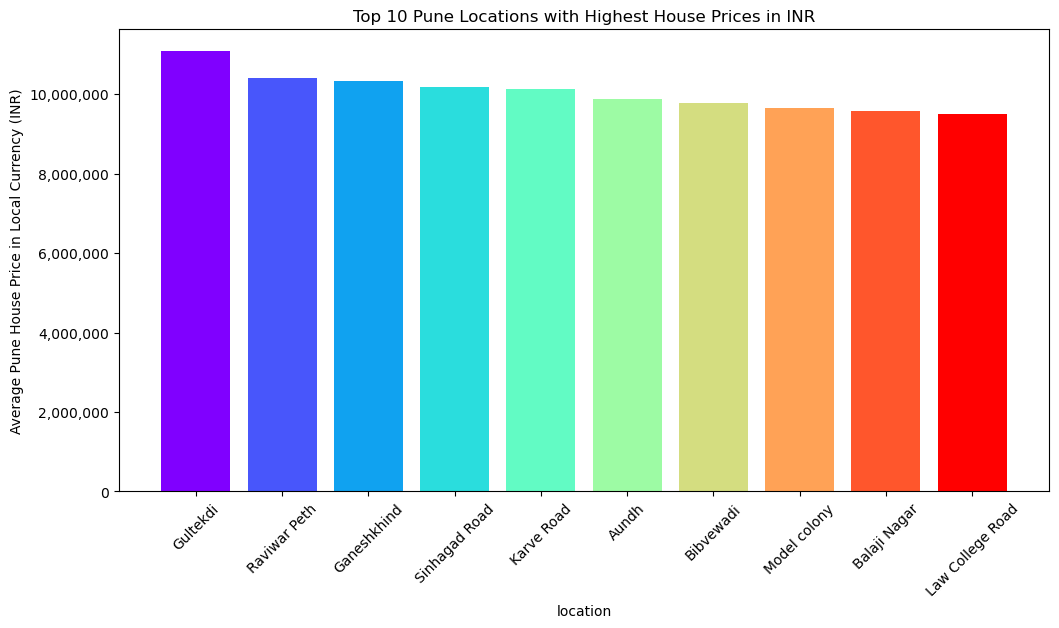

In [77]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = pune_data.groupby('location')['Price_INR'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_INR', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['location'], top_10_locations['Price_INR'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('location')
plt.ylabel('Average Pune House Price in Local Currency (INR)')
plt.title('Top 10 Pune Locations with Highest House Prices in INR')
plt.xticks(rotation=45)
plt.show()

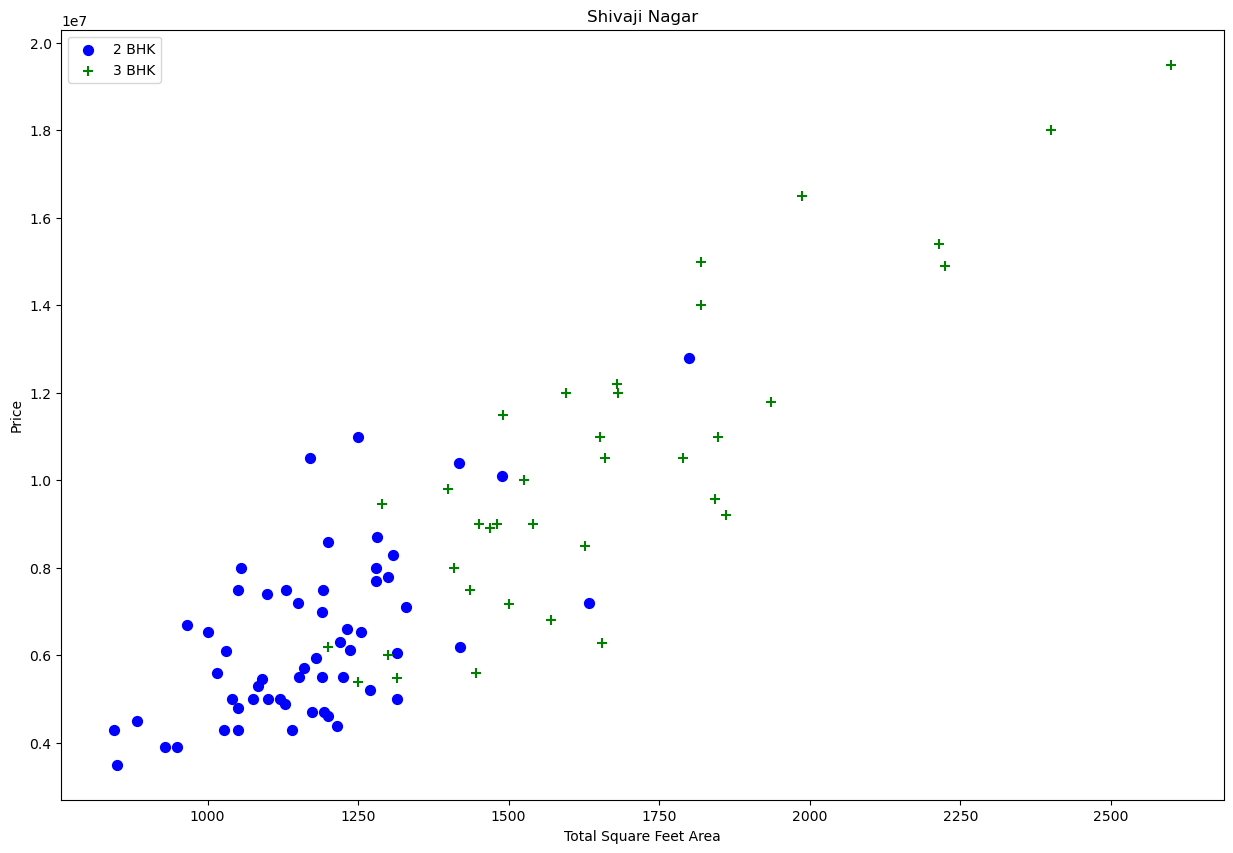

In [78]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.Price_INR,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.Price_INR,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(pune_data,"Shivaji Nagar")

In [79]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')    

pune_data = remove_bhk_outliers(pune_data)
pune_data.shape

(7543, 7)

In [80]:
pune_data.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [81]:
pune_data[pune_data.bath>10]

total_sqft  bath       location   Price_INR  Price_GBP  bhk  \
1211       6000.0  12.0      Bibvewadi  15000000.0   141000.0   11   
2637      12000.0  12.0   Fatima Nagar  52500000.0   493500.0   10   
5265       5425.0  13.0  Kondhwa Khurd  27500000.0   258500.0   13   
6350      10000.0  16.0   Model colony  55000000.0   517000.0   16   
10389      4000.0  12.0        Wagholi  16000000.0   150400.0   10   

       price_per_sqft  
1211     2.500000e+08  
2637     4.375000e+08  
5265     5.069124e+08  
6350     5.500000e+08  
10389    4.000000e+08

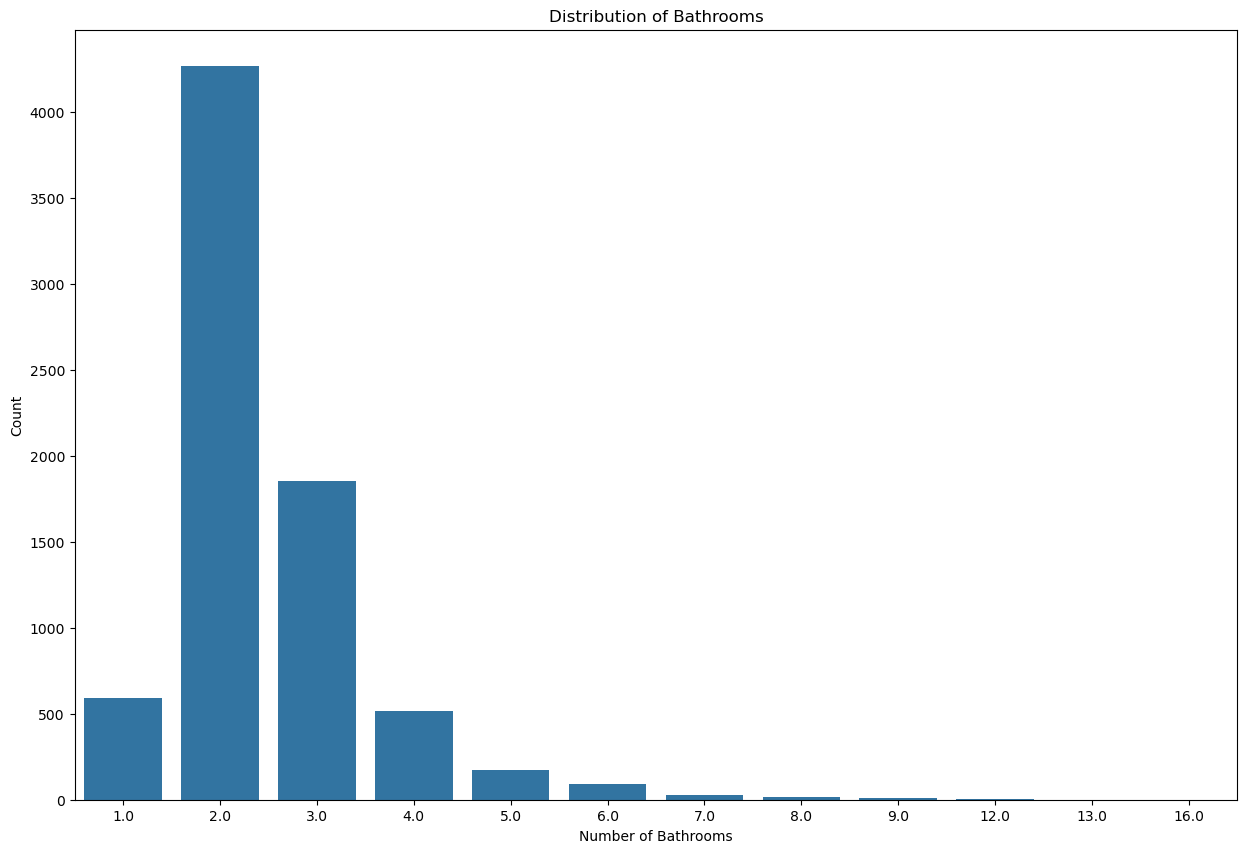

In [82]:
sns.countplot(x='bath', data=pune_data)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Distribution of Bathrooms")
plt.show()

In [83]:
pune_data[pune_data.bath>pune_data.bhk+2]

total_sqft  bath       location    Price_INR  Price_GBP  bhk  \
772       1806.0   6.0          Baner   11600000.0   109040.0    3   
3067     11338.0   9.0  Ghorpade Peth  100000000.0   940000.0    6   
4231      7000.0   8.0    Karve Nagar   45000000.0   423000.0    4   

      price_per_sqft  
772     6.423034e+08  
3067    8.819898e+08  
4231    6.428571e+08

In [84]:
pune_data = pune_data[pune_data.bath<pune_data.bhk+2]

In [85]:
pune_data.shape

(7479, 7)

In [86]:
pune_data = pune_data.drop(['price_per_sqft'],axis='columns')
pune_data.head(3)
pune_data.shape

(7479, 6)

In [87]:
# Renaming the columns
pune_data.rename(columns={
    'location': 'Location',
    'total_sqft': 'Area_sqft',
    'Price_INR': 'Local_price',
    'bhk': 'Bedrooms',
    'bath': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)


In [88]:
pune_data['City'] = 'Pune'

In [89]:
# Arranging the columns correctly
pune_data = pune_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
pune_data.head()

City     Location  Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  Pune  Alandi Road     1056.0        2.0    3907000.0         2    36725.8
1  Pune  Alandi Road     2894.0        4.0   24500000.0         4   230300.0
2  Pune  Alandi Road     1084.0        2.0    5000000.0         2    47000.0
3  Pune  Alandi Road     1230.0        2.0    8000000.0         2    75200.0
4  Pune  Alandi Road     1750.0        3.0   13000000.0         3   122200.0

## Importing Cairo Dataset

In [90]:
# Importing cairo dataset
cairo_data = pd.read_csv("datasets/Cairo.csv")

In [91]:
cairo_data.head()

type                                              title  \
0     Duplex     Prime Location Duplex Fully Finished With A\C    
1      Villa  Town house resale at Mivida Emaar with best price   
2  Apartment   Lake View Residence - Apartment | Prime Location   
3  Townhouse  Best Penthouse for sale in villette ( sky conds )   
4  Penthouse  2nd Floor | Fully Finished | Lowest Price |Par...   

                                            location bedroom  bathroom  \
0  Park View, North Investors Area, New Cairo Cit...       4         4   
1  Mivida, 5th Settlement Compounds, The 5th Sett...       3         3   
2  Lake View Residence, 5th Settlement Compounds,...       3         3   
3  La Vista City, New Capital Compounds, New Capi...       4         4   
4  Villette, 5th Settlement Compounds, The 5th Se...       5         6   

  size_sqm        price  
0      345    68,50,000  
1      285  1,00,00,000  
2      210    57,00,000  
3      230    75,10,000  
4      284    85,11,300

In [92]:
# Printing unique values in bedroom column
cairo_data['bedroom'].unique()

array(['4', '3', '5', '2', '1', '7', '6', '8', 'Studio', '{0}'],
      dtype=object)

In [93]:
# Checking null values
cairo_data.isna().sum()

type        0
title       0
location    0
bedroom     0
bathroom    0
size_sqm    0
price       0
dtype: int64

In [94]:
# Dropping null values, if there are any
cairo_data.dropna(inplace=True)

In [95]:
# Cleaning bedroom column, as there are some irrelavant entries
cairo_data = cairo_data[~cairo_data['bedroom'].isin(['Studio', '{0}'])]


In [96]:
 # This cell, assigns city names based on specific keywords found in the 'title' and 'location' columns, and it standardizes property types based on keywords in the 'title' column.

cairo_data['City'] = 'NA'

cairo_data.loc[cairo_data['title'].str.contains("5th"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['title'].str.contains("settlement"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['title'].str.contains("new cairo"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['title'].str.contains("tag sultan"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['title'].str.contains("mivida"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['location'].str.contains("5th"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['location'].str.contains("settlement"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['location'].str.contains("new cairo"), 'City'] = 'New Cairo'
cairo_data.loc[cairo_data['location'].str.contains("tag sultan"), 'City'] = 'New Cairo'

cairo_data.loc[cairo_data['title'].str.contains("new capital"), 'City'] = 'New Capital'
cairo_data.loc[cairo_data['location'].str.contains("new capital"), 'City'] = 'New Capital'
cairo_data.loc[cairo_data['title'].str.contains("capital"), 'City'] = 'New Capital'
cairo_data.loc[cairo_data['location'].str.contains("capital"), 'City'] = 'New Capital'

cairo_data.loc[cairo_data['title'].str.contains("mostakbal"), 'City'] = 'Mostakbal City'
cairo_data.loc[cairo_data['location'].str.contains("mostakbal"), 'City'] = 'Mostakbal City'

cairo_data.loc[cairo_data['title'].str.contains("shorouk"), 'City'] = 'Shorouk'
cairo_data.loc[cairo_data['title'].str.contains("madinaty"), 'City'] = 'Shorouk'
cairo_data.loc[cairo_data['location'].str.contains("shorouk"), 'City'] = 'Shorouk'
cairo_data.loc[cairo_data['location'].str.contains("madinaty"), 'City'] = 'Shorouk'
cairo_data.loc[cairo_data['title'].str.contains("eastown"), 'City'] = 'Shorouk'
cairo_data.loc[cairo_data['location'].str.contains("eastown"), 'City'] = 'Shorouk'

cairo_data.loc[cairo_data['title'].str.contains("heliopolis"), 'City'] = 'New Heliopolis'
cairo_data.loc[cairo_data['location'].str.contains("heliopolis"), 'City'] = 'New Heliopolis'

cairo_data.loc[cairo_data['location'].str.contains("uptown"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['title'].str.contains("zamalek"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['location'].str.contains("zamalek"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['title'].str.contains("mokattam"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['location'].str.contains("mokattam"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['title'].str.contains("maadi"), 'City'] = 'Cairo'
cairo_data.loc[cairo_data['location'].str.contains("maadi"), 'City'] = 'Cairo'
cairo_data.loc[(cairo_data['location'].str.contains("nasr")) | (cairo_data['title'].str.contains("nasr")), 'City'] = 'Cairo'
cairo_data.loc[cairo_data.City == 'NA', 'City'] = 'Cairo'


cairo_data.loc[(cairo_data['title'].str.contains("apartment")) & (cairo_data.type!='apartment'),'type']='apartment'
cairo_data.loc[(cairo_data['title'].str.contains("villa")) & (cairo_data.type!='villa'),'type']='villa'
cairo_data.loc[(cairo_data['title'].str.contains("town")) & (cairo_data.type!='townhouse'),'type']='townhouse'
cairo_data.loc[(cairo_data['title'].str.contains("twin")) & (cairo_data.type!='twin house'),'type']='twin house'
cairo_data.loc[(cairo_data['title'].str.contains("duplex")) & (cairo_data.type!='duplex'),'type']='duplex'
cairo_data.loc[(cairo_data['title'].str.contains("pent")) & (cairo_data.type!='penthouse'),'type']='penthouse'
cairo_data.loc[(cairo_data['title'].str.contains("villa")) & (cairo_data.type!='villa'),'type']='villa'
cairo_data.loc[(cairo_data['title'].str.contains("hotel")) & (cairo_data.type!='apartment'),'type']='apartment'

In [97]:
columns_to_keep = ['type', 'bedroom', 'bathroom', 'size_sqm', 'price','location']

# Creating a new DataFrame with only the selected columns
cairo_data = cairo_data[columns_to_keep]

In [98]:
# Converting bedroom column into integer
cairo_data['bedroom'] = cairo_data['bedroom'].astype(int)

In [99]:
cairo_data['Total_Rooms'] = cairo_data['bedroom'] + 2

In [100]:
# Printing first few rows of cairo dataset.
cairo_data.head()

type  bedroom  bathroom size_sqm        price  \
0     Duplex        4         4      345    68,50,000   
1      Villa        3         3      285  1,00,00,000   
2  Apartment        3         3      210    57,00,000   
3  Townhouse        4         4      230    75,10,000   
4  Penthouse        5         6      284    85,11,300   

                                            location  Total_Rooms  
0  Park View, North Investors Area, New Cairo Cit...            6  
1  Mivida, 5th Settlement Compounds, The 5th Sett...            5  
2  Lake View Residence, 5th Settlement Compounds,...            5  
3  La Vista City, New Capital Compounds, New Capi...            6  
4  Villette, 5th Settlement Compounds, The 5th Se...            7

In [101]:
# Renaming the columns
cairo_data.rename(columns={'price': 'egp_price','size_sqm':'Area_sqft'}, inplace=True)

In [102]:
# Area_sqft is in string format, it is neccessary to remove ',' first and the convert the value into number
cairo_data['Area_sqft'].replace(',','')

0          345
1          285
2          210
3          230
4          284
         ...  
11413    1,500
11414      220
11415      177
11416      275
11417      160
Name: Area_sqft, Length: 11380, dtype: object

In [103]:
# Converting Area into Square Feet.
# Ensure the size_sqm column is numeric
cairo_data["Area_sqft"] = pd.to_numeric(cairo_data["Area_sqft"], errors='coerce')

# Conversion factor
sqm_to_sqft = 10.7639

# Convert size_sqm to size_sqft
cairo_data["Area_sqft"] = cairo_data["Area_sqft"] * sqm_to_sqft


In [104]:
cairo_data.head()

type  bedroom  bathroom  Area_sqft    egp_price  \
0     Duplex        4         4  3713.5455    68,50,000   
1      Villa        3         3  3067.7115  1,00,00,000   
2  Apartment        3         3  2260.4190    57,00,000   
3  Townhouse        4         4  2475.6970    75,10,000   
4  Penthouse        5         6  3056.9476    85,11,300   

                                            location  Total_Rooms  
0  Park View, North Investors Area, New Cairo Cit...            6  
1  Mivida, 5th Settlement Compounds, The 5th Sett...            5  
2  Lake View Residence, 5th Settlement Compounds,...            5  
3  La Vista City, New Capital Compounds, New Capi...            6  
4  Villette, 5th Settlement Compounds, The 5th Se...            7

In [105]:
cairo_data = cairo_data[cairo_data['egp_price'] != 'Ask']


In [106]:
# Removing commas from the 'price' column as it was in string format
cairo_data['egp_price'] = cairo_data['egp_price'].str.replace(',', '')

In [107]:
# Convert the 'price' column to numeric
cairo_data['egp_price'] = pd.to_numeric(cairo_data['egp_price'])


In [108]:
# Checking the null values and dropping it
cairo_data.isnull().sum()

type             0
bedroom          0
bathroom         0
Area_sqft      299
egp_price        0
location         0
Total_Rooms      0
dtype: int64

In [109]:
cairo_data.dropna(inplace=True)

In [110]:
# Creating another column Price_GBP currency by multiplying local currency by some factor
cairo_data['Price_GBP'] = cairo_data['egp_price']*0.017

In [111]:
cairo_data.head()

type  bedroom  bathroom  Area_sqft  egp_price  \
0     Duplex        4         4  3713.5455    6850000   
1      Villa        3         3  3067.7115   10000000   
2  Apartment        3         3  2260.4190    5700000   
3  Townhouse        4         4  2475.6970    7510000   
4  Penthouse        5         6  3056.9476    8511300   

                                            location  Total_Rooms  Price_GBP  
0  Park View, North Investors Area, New Cairo Cit...            6   116450.0  
1  Mivida, 5th Settlement Compounds, The 5th Sett...            5   170000.0  
2  Lake View Residence, 5th Settlement Compounds,...            5    96900.0  
3  La Vista City, New Capital Compounds, New Capi...            6   127670.0  
4  Villette, 5th Settlement Compounds, The 5th Se...            7   144692.1

In [112]:
cairo_data.isnull().sum()

type           0
bedroom        0
bathroom       0
Area_sqft      0
egp_price      0
location       0
Total_Rooms    0
Price_GBP      0
dtype: int64

In [113]:
# Printing dimensions of the dataset
cairo_data.shape

(10670, 8)

In [114]:
cairo_data.head()

type  bedroom  bathroom  Area_sqft  egp_price  \
0     Duplex        4         4  3713.5455    6850000   
1      Villa        3         3  3067.7115   10000000   
2  Apartment        3         3  2260.4190    5700000   
3  Townhouse        4         4  2475.6970    7510000   
4  Penthouse        5         6  3056.9476    8511300   

                                            location  Total_Rooms  Price_GBP  
0  Park View, North Investors Area, New Cairo Cit...            6   116450.0  
1  Mivida, 5th Settlement Compounds, The 5th Sett...            5   170000.0  
2  Lake View Residence, 5th Settlement Compounds,...            5    96900.0  
3  La Vista City, New Capital Compounds, New Capi...            6   127670.0  
4  Villette, 5th Settlement Compounds, The 5th Se...            7   144692.1

In [115]:
cairo_data['bedroom'].unique()

array([4, 3, 5, 2, 1, 7, 6, 8])

In [116]:
# This function checks whether a given input x can be converted to a float.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [117]:
cairo_data[~cairo_data['Area_sqft'].apply(is_float)].head(10)

Empty DataFrame
Columns: [type, bedroom, bathroom, Area_sqft, egp_price, location, Total_Rooms, Price_GBP]
Index: []

In [118]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

In [119]:
convert_sqft_to_num('1000-12000')

6500.0

In [120]:
cairo_data.loc[30]

type                                                   Penthouse
bedroom                                                        4
bathroom                                                       4
Area_sqft                                              1776.0435
egp_price                                                2600000
location       IL Bosco, New Capital Compounds, New Capital C...
Total_Rooms                                                    6
Price_GBP                                                44200.0
Name: 30, dtype: object

In [121]:
cairo_data = cairo_data.copy()
# Creating new column of price per sqft
cairo_data['price_per_sqft'] = cairo_data['egp_price']/cairo_data['Area_sqft']
cairo_data.head()

type  bedroom  bathroom  Area_sqft  egp_price  \
0     Duplex        4         4  3713.5455    6850000   
1      Villa        3         3  3067.7115   10000000   
2  Apartment        3         3  2260.4190    5700000   
3  Townhouse        4         4  2475.6970    7510000   
4  Penthouse        5         6  3056.9476    8511300   

                                            location  Total_Rooms  Price_GBP  \
0  Park View, North Investors Area, New Cairo Cit...            6   116450.0   
1  Mivida, 5th Settlement Compounds, The 5th Sett...            5   170000.0   
2  Lake View Residence, 5th Settlement Compounds,...            5    96900.0   
3  La Vista City, New Capital Compounds, New Capi...            6   127670.0   
4  Villette, 5th Settlement Compounds, The 5th Se...            7   144692.1   

   price_per_sqft  
0     1844.598376  
1     3259.758944  
2     2521.656383  
3     3033.489155  
4     2784.247921

In [122]:
len(cairo_data.location.unique())

768

In [123]:
# This code groups the DataFrame by the location column and counts the number of occurrences for each unique location
cairo_data.location = cairo_data.location.apply(lambda x: x.strip())
location_stats = cairo_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Hyde Park, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo                  587
Mivida, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo                     583
Madinaty, Cairo                                                                                 568
Villette, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo                   367
Mountain View Hyde Park, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo    356
                                                                                               ... 
Asala, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo                        1
Badr El Masria, 3rd District, Badr City, Cairo                                                    1
Bahaa Eldeen Krakoush St., Zamalek, Cairo                                                         1
Oasis District, Shorouk City, Cairo                                                        

In [124]:
# Printing the number of locations that have occurence of less then or equal to 3.
len(location_stats[location_stats<=3])

484

In [125]:
# And storing them in another variable
location_stats_less_than_3 = location_stats[location_stats<=3]
location_stats_less_than_3

location
East The Academy, New Cairo City, Cairo                                                 3
District 5, The 5th Settlement, New Cairo City, Cairo                                   3
Rehab City Third Phase, Al Rehab, New Cairo City, Cairo                                 3
Al Mansour Mohamed St., Zamalek, Cairo                                                  3
Al Narges, New Cairo City, Cairo                                                        3
                                                                                       ..
Asala, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo              1
Badr El Masria, 3rd District, Badr City, Cairo                                          1
Bahaa Eldeen Krakoush St., Zamalek, Cairo                                               1
Oasis District, Shorouk City, Cairo                                                     1
Étoile De Ville, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo    1
N

In [126]:
# Refering the locations as 'Other' for the locations that has occurence of less than 3.
cairo_data.location = cairo_data.location.apply(lambda x: 'Other' if x in location_stats_less_than_3 else x)
len(cairo_data.location.unique())

285

In [127]:
cairo_data.head(15)

type  bedroom  bathroom  Area_sqft  egp_price  \
0      Duplex        4         4  3713.5455    6850000   
1       Villa        3         3  3067.7115   10000000   
2   Apartment        3         3  2260.4190    5700000   
3   Townhouse        4         4  2475.6970    7510000   
4   Penthouse        5         6  3056.9476    8511300   
5   Apartment        3         2  1851.3908    3150000   
6       Villa        5         4  2690.9750    3500000   
7   Townhouse        4         4  2368.0580    6100000   
8   apartment        2         2  1227.0846    2278506   
9   Apartment        3         3  2195.8356    4112700   
10  Apartment        4         3  1851.3908    5500000   
11      Villa        3         3  3519.7953    7346875   
12  penthouse        4         3  3552.0870    4200000   
13  Apartment        3         3  2529.5165    4500000   
14      Villa        4         3  8363.5503   16000000   

                                             location  Total_Rooms  \
0   Park View, North Investors Area, New Cairo Cit...            6   
1   Mivida, 5th Settlement Compounds, The 5th Sett...            5   
2   Lake View Residence, 5th Settlement Compounds,...            5   
3   La Vista City, New Capital Compounds, New Capi...            6   
4   Villette, 5th Settlement Compounds, The 5th Se...            7   
5                        Tag Sultan, Ring Road, Cairo            5   
6   Cairo Festival City, North Investors Area, New...            7   
7   Taj City, 5th Settlement Compounds, The 5th Se...            6   
8                        Tag Sultan, Ring Road, Cairo            4   
9   Lake View Residence, 5th Settlement Compounds,...            5   
10  Palm Hills New Cairo, 5th Settlement Compounds...            6   
11  Hyde Park, 5th Settlement Compounds, The 5th S...            5   
12  IL Bosco, New Capital Compounds, New Capital C...            6   
13  El Rehab Extension, Al Rehab, New Cairo City, ...            5   
14  Villette, 5th Settlement Compounds, The 5th Se...            6   

     Price_GBP  price_per_sqft  
0   116450.000     1844.598376  
1   170000.000     3259.758944  
2    96900.000     2521.656383  
3   127670.000     3033.489155  
4   144692.100     2784.247921  
5    53550.000     1701.423600  
6    59500.000     1300.643819  
7   103700.000     2575.950420  
8    38734.602     1856.845078  
9    69915.900     1872.954423  
10   93500.000     2970.739619  
11  124896.875     2087.301781  
12   71400.000     1182.403472  
13   76500.000     1778.996105  
14  272000.000     1913.063164

In [128]:
cairo_data[(cairo_data.Area_sqft/cairo_data.bedroom)<300].head()

type  bedroom  bathroom  Area_sqft  egp_price  \
1023   Townhouse        4         5   710.4174    2713888   
2695   apartment        5         3  1184.0290    3000000   
4169   Apartment        3         2   753.4730    2400000   
8858       Villa        3         3   365.9726    8200000   
10011      villa        8         8  1829.8630    2620000   

                                                location  Total_Rooms  \
1023   Monte Napoleone, Mostakbal City Compounds, Mos...            6   
2695                                               Other            7   
4169   Palm Hills New Cairo, 5th Settlement Compounds...            5   
8858   Al Burouj Compound, El Shorouk Compounds, Shor...            5   
10011  Mountain View iCity, 5th Settlement Compounds,...           10   

        Price_GBP  price_per_sqft  
1023    46136.096     3820.131658  
2695    51000.000     2533.721725  
4169    40800.000     3185.250168  
8858   139400.000    22406.048977  
10011   44540.000     1431.801179

In [129]:
cairo_data.shape

(10670, 9)

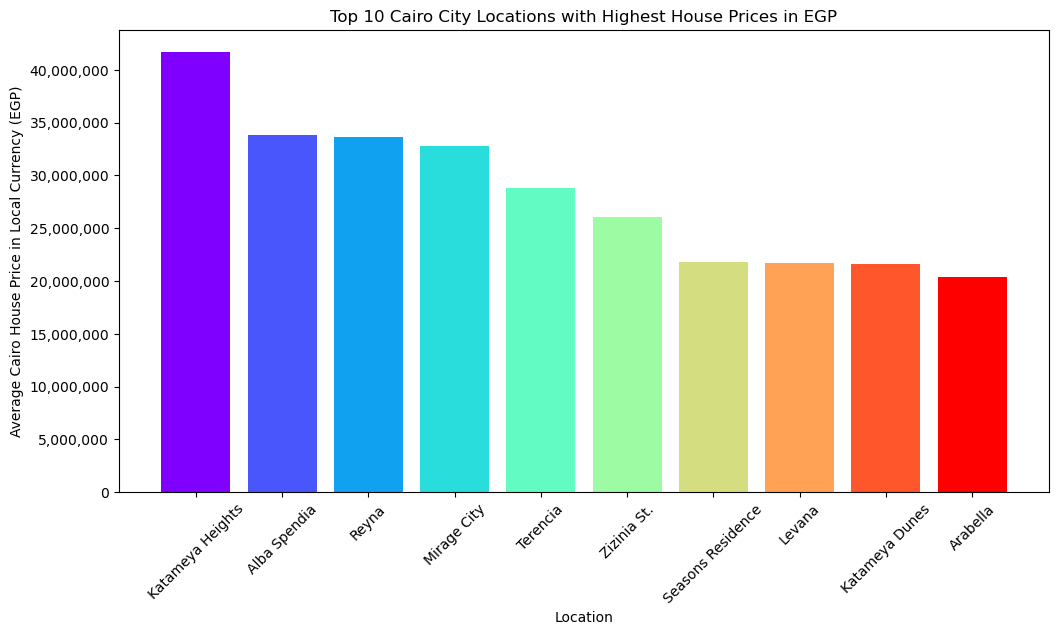

In [130]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstrationlocation_avg_price = cairo_data.groupby('location')['egp_price'].mean().reset_index()
location_avg_price = cairo_data.groupby('location')['egp_price'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='egp_price', ascending=False).head(10)

# Extracting the first part of the location names
top_10_locations['short_location'] = top_10_locations['location'].apply(lambda x: x.split(',')[0])

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['short_location'], top_10_locations['egp_price'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average Cairo House Price in Local Currency (EGP)')
plt.title('Top 10 Cairo City Locations with Highest House Prices in EGP')
plt.xticks(rotation=45)
plt.show()

In [131]:
# Common data cleaning step to identify outliers or unrealistic data points in datasets. After filtering, it returns the first few rows of the resulting DataFrame
cairo_data = cairo_data[~(cairo_data.Area_sqft/cairo_data.bedroom<300)]
cairo_data.shape

(10664, 9)

In [132]:
cairo_data.price_per_sqft.describe()

count     10664.000000
mean       2024.998472
std        2903.705638
min         188.639582
25%        1279.266608
50%        1780.643323
75%        2440.331341
max      277549.902916
Name: price_per_sqft, dtype: float64

In [133]:
 # This function removes outliers from the price_per_sqft column within each location in the cairo_data DataFrame. Outliers are defined as values 
# that are more than one standard deviation away from the mean price_per_sqft for that location. The cleaned DataFrame is then stored back in cairo_data.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

cairo_data = remove_pps_outliers(cairo_data)
cairo_data

type  bedroom  bathroom  Area_sqft  egp_price  \
0     Apartment        3         3  2045.1410    1501000   
1     Apartment        3         3  1776.0435    1287000   
2     Apartment        3         3  1776.0435    1287000   
3     Apartment        3         3  2045.1410    1520000   
4     Apartment        3         2  2475.6970    1840000   
...         ...      ...       ...        ...        ...   
8103  Apartment        3         2  1517.7099    1700000   
8104      villa        5         6  8611.1200   35000000   
8105      villa        5         6  8611.1200   35000000   
8106      Villa        5         6  8611.1200   35000000   
8107      Villa        8         4  9687.5100   23000000   

                                               location  Total_Rooms  \
0       2/2, Al Andalus District, New Cairo City, Cairo            5   
1       2/2, Al Andalus District, New Cairo City, Cairo            5   
2       2/2, Al Andalus District, New Cairo City, Cairo            5   
3       2/2, Al Andalus District, New Cairo City, Cairo            5   
4       2/2, Al Andalus District, New Cairo City, Cairo            5   
...                                                 ...          ...   
8103  Zizinia Al Mostakbal, Mostakbal City Compounds...            5   
8104  Zizinia St., South Investors Area, New Cairo C...            7   
8105  Zizinia St., South Investors Area, New Cairo C...            7   
8106  Zizinia St., South Investors Area, New Cairo C...            7   
8107  Zizinia St., South Investors Area, New Cairo C...           10   

      Price_GBP  price_per_sqft  
0       25517.0      733.934726  
1       21879.0      724.644413  
2       21879.0      724.644413  
3       25840.0      743.225039  
4       31280.0      743.225039  
...         ...             ...  
8103    28900.0     1120.108658  
8104   595000.0     4064.511933  
8105   595000.0     4064.511933  
8106   595000.0     4064.511933  
8107   391000.0     2374.191098  

[8108 rows x 9 columns]

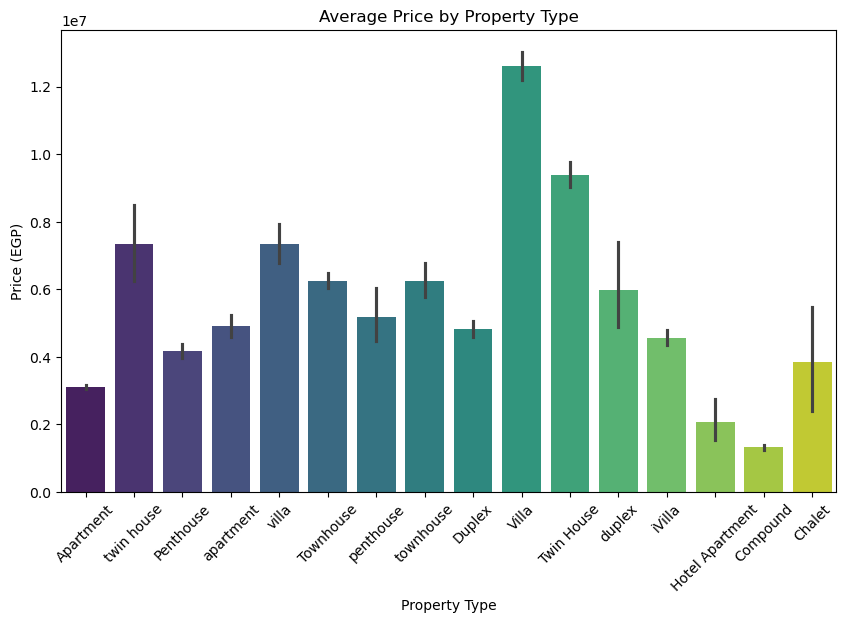

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='egp_price', data=cairo_data, palette='viridis')
plt.xlabel('Property Type')
plt.ylabel('Price (EGP)')
plt.title('Average Price by Property Type')
plt.xticks(rotation=45)
plt.show()

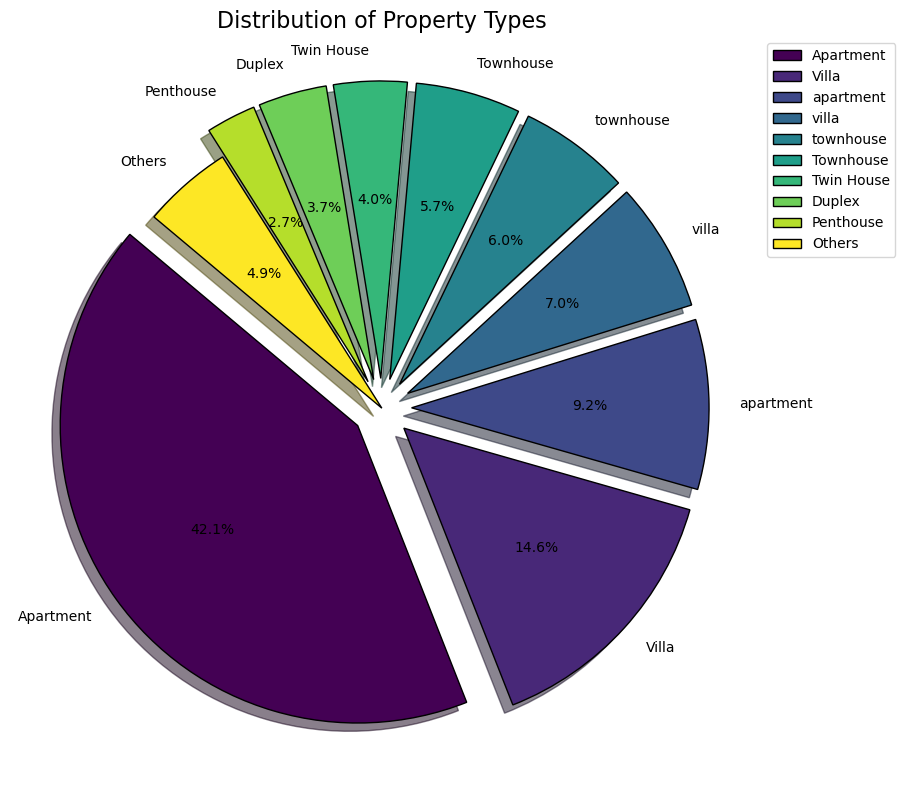

In [135]:
# Data for the pie chart
type_counts = cairo_data['type'].value_counts()

# Calculate percentages
total_count = type_counts.sum()
type_percentages = (type_counts / total_count) * 100

# Group small percentages into 'Others'
threshold = 2  # threshold percentage
small_categories = type_percentages[type_percentages < threshold]
large_categories = type_percentages[type_percentages >= threshold]

# Add 'Others' category
if len(small_categories) > 0:
    large_categories['Others'] = small_categories.sum()

# Define colors for each property type
colors = plt.cm.viridis(np.linspace(0, 1, len(large_categories)))

# Define 'explode' values to separate slices slightly
explode = [0.1 if category != 'Others' else 0 for category in large_categories.index]

# Pie Chart: Distribution of Property Types
plt.figure(figsize=(10, 8))
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', colors=colors, 
        startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

# Title and legend
plt.title('Distribution of Property Types', fontsize=16)
plt.legend(large_categories.index, loc='upper right', bbox_to_anchor=(1.2, 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [136]:
cairo_data.head()

type  bedroom  bathroom  Area_sqft  egp_price  \
0  Apartment        3         3  2045.1410    1501000   
1  Apartment        3         3  1776.0435    1287000   
2  Apartment        3         3  1776.0435    1287000   
3  Apartment        3         3  2045.1410    1520000   
4  Apartment        3         2  2475.6970    1840000   

                                          location  Total_Rooms  Price_GBP  \
0  2/2, Al Andalus District, New Cairo City, Cairo            5    25517.0   
1  2/2, Al Andalus District, New Cairo City, Cairo            5    21879.0   
2  2/2, Al Andalus District, New Cairo City, Cairo            5    21879.0   
3  2/2, Al Andalus District, New Cairo City, Cairo            5    25840.0   
4  2/2, Al Andalus District, New Cairo City, Cairo            5    31280.0   

   price_per_sqft  
0      733.934726  
1      724.644413  
2      724.644413  
3      743.225039  
4      743.225039

In [137]:
# Renaming the columns
cairo_data.rename(columns={
    'location': 'Location',
    'total_sqft': 'Area_sqft',
    'egp_price': 'Local_price',
    'bedroom': 'Bedrooms',
    'bathroom': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping the irrelevant column
cairo_data.drop(columns=['Total_Rooms', 'price_per_sqft','type'], inplace=True)

In [138]:
cairo_data['City'] = 'Cairo'

In [139]:
# Rearranging the columns
cairo_data = cairo_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
cairo_data.head()

City                                         Location  Area_sqft  \
0  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  2045.1410   
1  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  1776.0435   
2  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  1776.0435   
3  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  2045.1410   
4  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  2475.6970   

   Bathrooms  Local_price  Bedrooms  Price_GBP  
0          3      1501000         3    25517.0  
1          3      1287000         3    21879.0  
2          3      1287000         3    21879.0  
3          3      1520000         3    25840.0  
4          2      1840000         3    31280.0

## Importing Bangkok Dataset

In [140]:
# Importing Bangkok dataset
bangkok_data = pd.read_csv("datasets/Bangkok.csv")

In [141]:
# Printing first few rows of dataset
bangkok_data.head()

Property Type   Location  Area (sq. ft.)  Bedrooms  Bathrooms  Price (THB)
0         Condo  Sukhumvit             700         1          1      2000000
1         House    Ladprao            1500         3          2      5000000
2     Apartment       Siam             900         2          1      3500000
3         Condo    Sathorn            1200         2          2      4500000
4         House   Ratchada            1800         4          3      8000000

In [142]:
bangkok_data['Total_Rooms'] = bangkok_data['Bedrooms'] + 2

In [143]:
# Renaming columns
bangkok_data.rename(columns={'Price (THB)': 'Price_THB', 'Property Type':'Property_type'}, inplace=True)

In [144]:
# Checking null values, but the dataset is already cleaned.
bangkok_data.isnull().sum()

Property_type     0
Location          0
Area (sq. ft.)    0
Bedrooms          0
Bathrooms         0
Price_THB         0
Total_Rooms       0
dtype: int64

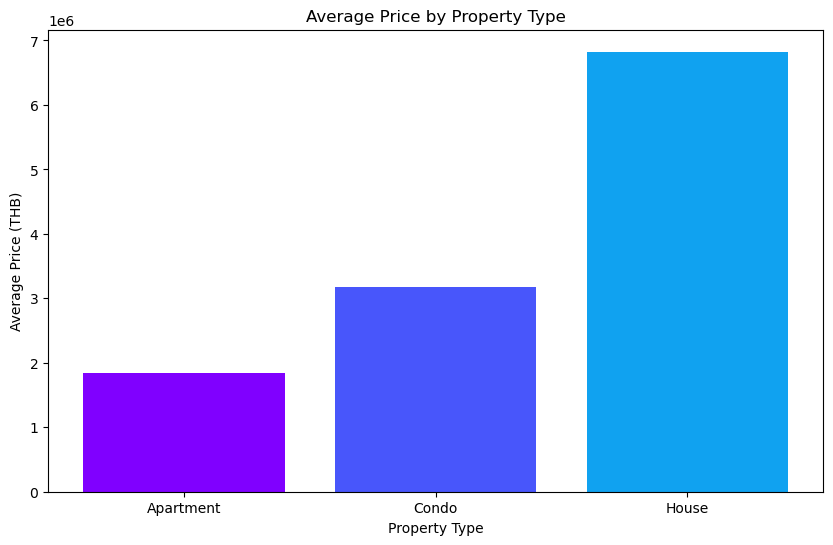

In [145]:
# Grouping by Property Type and calculating average price
avg_price_by_type = bangkok_data.groupby("Property_type")["Price_THB"].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_type["Property_type"], avg_price_by_type["Price_THB"], color=rainbow_colors)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (THB)')
plt.show()

In [146]:
# Adding GBP unit price column
bangkok_data['Price_GBP'] = bangkok_data['Price_THB']*0.021

In [147]:
bangkok_data.head()

Property_type   Location  Area (sq. ft.)  Bedrooms  Bathrooms  Price_THB  \
0         Condo  Sukhumvit             700         1          1    2000000   
1         House    Ladprao            1500         3          2    5000000   
2     Apartment       Siam             900         2          1    3500000   
3         Condo    Sathorn            1200         2          2    4500000   
4         House   Ratchada            1800         4          3    8000000   

   Total_Rooms  Price_GBP  
0            3    42000.0  
1            5   105000.0  
2            4    73500.0  
3            4    94500.0  
4            6   168000.0

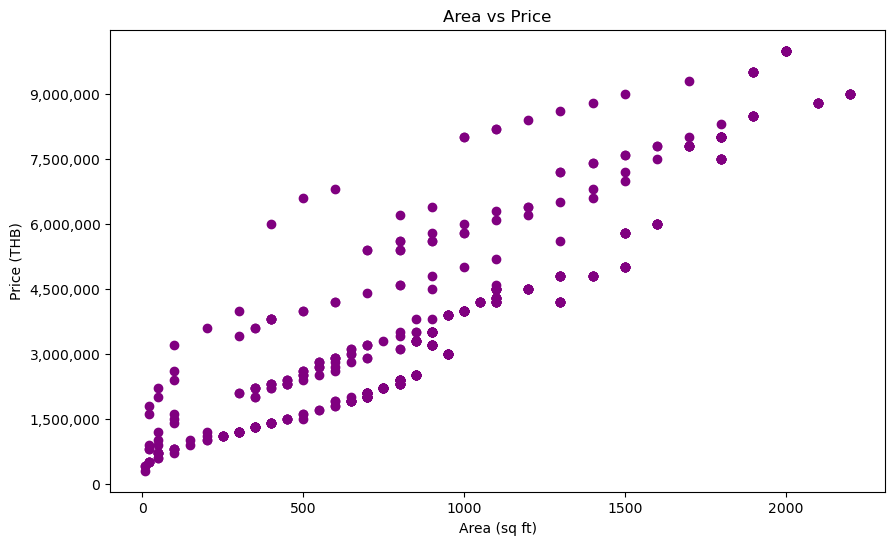

In [148]:
# Function to format y-axis labels as whole numbers
def format_func(value, tick_number):
    return f'{int(value):,}'

# Scatter Plot: Area vs Price
plt.figure(figsize=(10, 6))
plt.scatter(bangkok_data['Area (sq. ft.)'], bangkok_data['Price_THB'], color='purple')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (THB)')
plt.title('Area vs Price')

# Ensure y-axis labels are in whole numbers
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

In [149]:
bangkok_data.head()

Property_type   Location  Area (sq. ft.)  Bedrooms  Bathrooms  Price_THB  \
0         Condo  Sukhumvit             700         1          1    2000000   
1         House    Ladprao            1500         3          2    5000000   
2     Apartment       Siam             900         2          1    3500000   
3         Condo    Sathorn            1200         2          2    4500000   
4         House   Ratchada            1800         4          3    8000000   

   Total_Rooms  Price_GBP  
0            3    42000.0  
1            5   105000.0  
2            4    73500.0  
3            4    94500.0  
4            6   168000.0

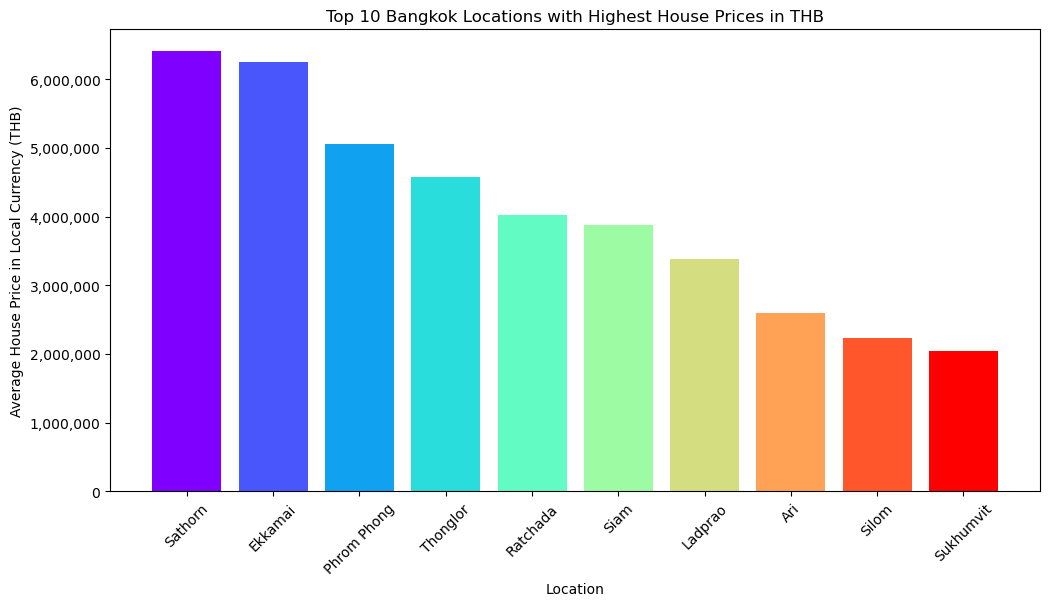

In [150]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = bangkok_data.groupby('Location')['Price_THB'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_THB', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Price_THB'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (THB)')
plt.title('Top 10 Bangkok Locations with Highest House Prices in THB')
plt.xticks(rotation=45)
plt.show()

In [151]:
# Renaming the columns
bangkok_data.rename(columns={
    'Location': 'Location',
    'Area (sq. ft.)': 'Area_sqft',
    'Price_THB': 'Local_price',
    'Bedrooms': 'Bedrooms',
    'Bathrooms': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping irrelevant columns
bangkok_data.drop(columns=['Total_Rooms', 'Property_type'], inplace=True)

In [152]:
bangkok_data['City'] = 'Bangkok'

In [153]:
# Rearranging the columns of the dataset.
bangkok_data = bangkok_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
bangkok_data.head()

City   Location  Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  Bangkok  Sukhumvit        700          1      2000000         1    42000.0
1  Bangkok    Ladprao       1500          2      5000000         3   105000.0
2  Bangkok       Siam        900          1      3500000         2    73500.0
3  Bangkok    Sathorn       1200          2      4500000         2    94500.0
4  Bangkok   Ratchada       1800          3      8000000         4   168000.0

## Importing London Dataset

In [154]:
# Importing london dataset
london_data = pd.read_csv("datasets/London_.csv")

In [155]:
london_data.head()

Unnamed: 0  Property Name    Price        House Type  Area in sq ft  \
0           0    Queens Road  1675000             House           2716   
1           1  Seward Street   650000  Flat / Apartment            814   
2           2    Hotham Road   735000  Flat / Apartment            761   
3           3   Festing Road  1765000             House           1986   
4           4   Spencer Walk   675000  Flat / Apartment            700   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions     Location  \
0                5                 5                  5    Wimbledon   
1                2                 2                  2  Clerkenwell   
2                2                 2                  2       Putney   
3                4                 4                  4       Putney   
4                2                 2                  2       Putney   

  City/County Postal Code  
0      London    SW19 8NY  
1      London    EC1V 3PA  
2      London    SW15 1QL  
3      London    SW15 1LP  
4      London    SW15 1PL

In [156]:
# Keeping only relevant columns
columns_to_keep = ['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'Location']

# Creating a new DataFrame with only the selected columns
london_data = london_data[columns_to_keep]

In [157]:
# Checking for number of rows and columns
london_data.shape

(3480, 5)

In [158]:
# Checking for number of unique locations
len(london_data.Location.unique())

657

In [159]:
# Common data cleaning step to identify outliers or unrealistic data points in datasets. After filtering, it returns the first few rows of the resulting DataFrame
london_data = london_data[~(london_data['Area in sq ft']/london_data['No. of Bedrooms']<300)]
london_data.shape

(3388, 5)

In [160]:
# Renaming price column
london_data.rename(columns={'Price':'Price_GBP'}, inplace=True)

In [161]:
london_data.head()

Price_GBP  Area in sq ft  No. of Bedrooms  No. of Bathrooms     Location
0    1675000           2716                5                 5    Wimbledon
1     650000            814                2                 2  Clerkenwell
2     735000            761                2                 2       Putney
3    1765000           1986                4                 4       Putney
4     675000            700                2                 2       Putney

In [162]:
# Converting all values in the Location column to strings and strip any leading or trailing whitespace
london_data['Location'] = london_data['Location'].astype(str).apply(lambda x: x.strip())

# Grouping by the Location column and count the occurrences of each unique location
location_stats = london_data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats


Location
nan                    934
Putney                 124
Battersea               93
Esher                   88
Wandsworth              87
                      ... 
Egerton Drive            1
Edith Terrace            1
Edgeley Road             1
Ebury Street             1
1 Albert Embankment      1
Name: Location, Length: 555, dtype: int64

In [163]:
# Printing locations having occurences of less than or equal to 6
location_stats_less_than_6 = location_stats[location_stats<=6]
location_stats_less_than_6

Location
Clapham                6
Acton                  6
Limehouse              6
Barnsbury              6
St. James's            6
                      ..
Egerton Drive          1
Edith Terrace          1
Edgeley Road           1
Ebury Street           1
1 Albert Embankment    1
Name: Location, Length: 491, dtype: int64

In [164]:
# And refering such locations as 'other'
london_data.Location = london_data.Location.apply(lambda x: 'other' if x in location_stats_less_than_6 else x)
len(london_data.Location.unique())

65

In [165]:
london_data.tail()

Price_GBP  Area in sq ft  No. of Bedrooms  No. of Bathrooms    Location
3475    3350000           1410                3                 3         nan
3476    5275000           1749                3                 3  St James's
3477    5995000           4435                6                 6       other
3478    6300000           1506                3                 3     Mayfair
3479    8650000           5395                6                 6    Highgate

In [166]:
# Checking null values of London dataset, and dropping them if found any.
london_data.isna().sum()

london_data.dropna(inplace=True)

In [167]:
# Creating new column price per square feet to remove outliers
london_data['price_per_sqft'] = london_data['Price_GBP']/london_data['Area in sq ft']
london_data.head()

Price_GBP  Area in sq ft  No. of Bedrooms  No. of Bathrooms     Location  \
0    1675000           2716                5                 5    Wimbledon   
1     650000            814                2                 2  Clerkenwell   
2     735000            761                2                 2       Putney   
3    1765000           1986                4                 4       Putney   
4     675000            700                2                 2       Putney   

   price_per_sqft  
0      616.715758  
1      798.525799  
2      965.834428  
3      888.721047  
4      964.285714

In [168]:
london_data.price_per_sqft.describe()

count    3388.000000
mean     1070.434427
std       582.993595
min       241.610738
25%       728.692530
50%       906.897463
75%      1213.503186
max      7069.180153
Name: price_per_sqft, dtype: float64

In [169]:
 # This function removes outliers from the price_per_sqft column within each location in the cairo_data DataFrame. Outliers are defined as values 
# that are more than one standard deviation away from the mean price_per_sqft for that location. The cleaned DataFrame is then stored back in cairo_data.

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

london_data = remove_pps_outliers(london_data)
london_data

Price_GBP  Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
0        785000            590                1                 1   
1        740000            579                1                 1   
2        750000            580                1                 1   
3       1160000            861                2                 2   
4        750000            579                1                 1   
...         ...            ...              ...               ...   
2603     800000            619                1                 1   
2604    1385000           1056                3                 3   
2605    2450000           2328                3                 3   
2606    4300000           3660                4                 4   
2607    5995000           4435                6                 6   

           Location  price_per_sqft  
0     101 Wood Lane     1330.508475  
1     101 Wood Lane     1278.065630  
2     101 Wood Lane     1293.103448  
3     101 Wood Lane     1347.270616  
4     101 Wood Lane     1295.336788  
...             ...             ...  
2603          other     1292.407108  
2604          other     1311.553030  
2605          other     1052.405498  
2606          other     1174.863388  
2607          other     1351.747463  

[2608 rows x 6 columns]

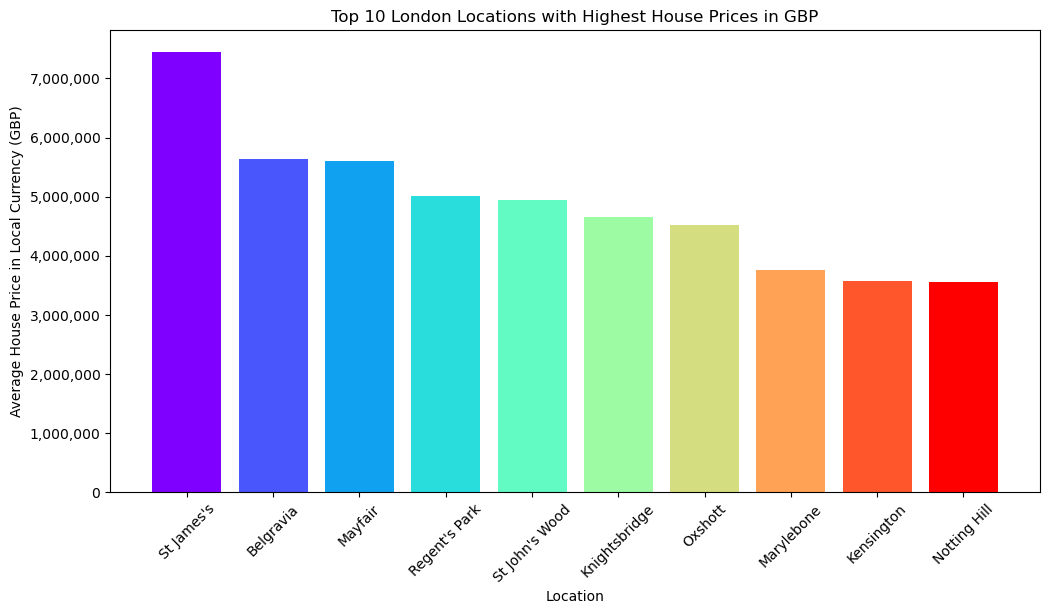

In [170]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = london_data.groupby('Location')['Price_GBP'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_GBP', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Price_GBP'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (GBP)')
plt.title('Top 10 London Locations with Highest House Prices in GBP')
plt.xticks(rotation=45)
plt.show()

In [171]:
# Renaming the columns
london_data.rename(columns={
    'Location': 'Location',
    'Area in sq ft': 'Area_sqft',
    'Price_GBP': 'Price_GBP',
    'No. of Bedrooms': 'Bedrooms',
    'No. of Bathrooms': 'Bathrooms',
}, inplace=True)



In [172]:
london_data['City'] = 'London'

In [173]:
# Rearranging the columns
london_data = london_data[['City','Location', 'Area_sqft', 'Bathrooms','Bedrooms', 'Price_GBP']]
london_data.head()

City       Location  Area_sqft  Bathrooms  Bedrooms  Price_GBP
0  London  101 Wood Lane        590          1         1     785000
1  London  101 Wood Lane        579          1         1     740000
2  London  101 Wood Lane        580          1         1     750000
3  London  101 Wood Lane        861          2         2    1160000
4  London  101 Wood Lane        579          1         1     750000

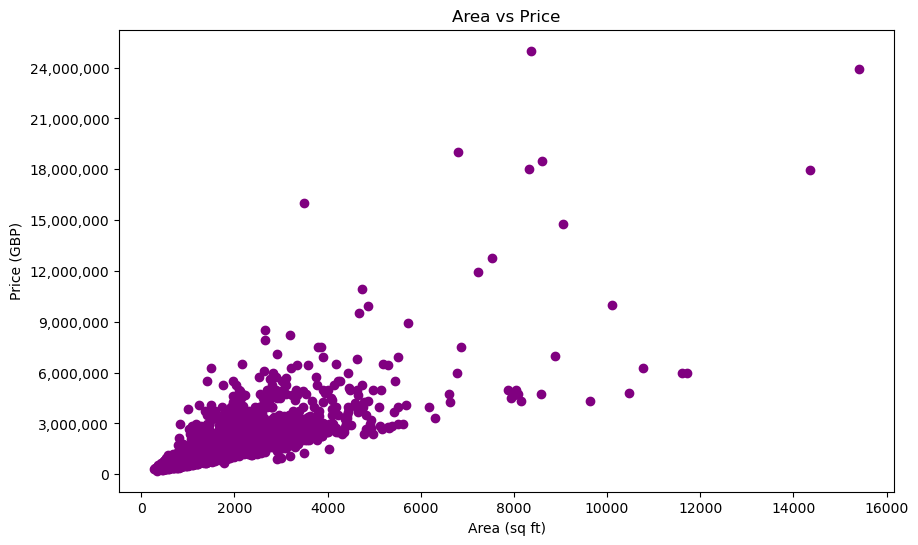

In [174]:
# Function to format y-axis labels as whole numbers
def format_func(value, tick_number):
    return f'{int(value):,}'

# Scatter Plot: Area vs Price
plt.figure(figsize=(10, 6))
plt.scatter(london_data['Area_sqft'], london_data['Price_GBP'], color='purple')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (GBP)')
plt.title('Area vs Price')

# Ensure y-axis labels are in whole numbers
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

## Importing Perth Dataset

In [175]:
# Importing Perth dataset
perth_data = pd.read_csv("datasets/Perth.csv")
perth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [176]:
# Printing first few rows of the dataset
perth_data.head()

ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.115900  115.842450   
1              4900  02-2019\r      6167 -32.193470  115.859554   
2              1900  06-2015\r      6111 -32.120578  115.993579   
3              3600  07-2018\r      6056 -31.900547  116.038009   
4              2000  11-2016\r      6054 -31.885790  115.947780   

                    NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0   LAKELAND SENIOR HIGH SCHOOL          0.828339               NaN  
1                ATWELL COLLEGE          5.524324             129.0  
2  KELMSCOTT SENIOR HIGH SCHOOL          1.649178             113.0  
3  SWAN VIEW SENIOR HIGH SCHOOL          1.571401               NaN  
4                 KIARA COLLEGE          1.514922               NaN

In [177]:
# Keeping only relevant columns
columns_to_keep = ['SUBURB', 'BEDROOMS', 'BATHROOMS','PRICE', 'FLOOR_AREA']

# Create a new DataFrame with only the selected columns
perth_data = perth_data[columns_to_keep]

In [178]:
perth_data.head()

SUBURB  BEDROOMS  BATHROOMS   PRICE  FLOOR_AREA
0  South Lake         4          2  565000         160
1       Wandi         3          2  365000         139
2     Camillo         3          1  287000          86
3    Bellevue         2          1  255000          59
4   Lockridge         4          1  325000         131

In [179]:
# Renaming the columns
perth_data.rename(columns={'PRICE': 'Local_price','FLOOR_AREA':'Area_sqm','SUBURB':'Location','BEDROOMS':'Bedrooms','BATHROOMS':'Bathrooms'}, inplace=True)

In [180]:
# The area of Perth city is in Square meters so it is necessary to convert it into square feet.
# Conversion factor
sqm_to_sqft = 10.7639

# Converting size_sqm to size_sqft
perth_data["Area_sqft"] = perth_data["Area_sqm"] * sqm_to_sqft


In [181]:
# Checking the null values of dataset, but there isn't any
perth_data.isnull().sum()

Location       0
Bedrooms       0
Bathrooms      0
Local_price    0
Area_sqm       0
Area_sqft      0
dtype: int64

In [182]:
# Converting and creating another column of price in GBP (British Pound)
perth_data['Price_GBP'] = perth_data['Local_price']*0.52

In [183]:
perth_data.head()

Location  Bedrooms  Bathrooms  Local_price  Area_sqm  Area_sqft  \
0  South Lake         4          2       565000       160  1722.2240   
1       Wandi         3          2       365000       139  1496.1821   
2     Camillo         3          1       287000        86   925.6954   
3    Bellevue         2          1       255000        59   635.0701   
4   Lockridge         4          1       325000       131  1410.0709   

   Price_GBP  
0   293800.0  
1   189800.0  
2   149240.0  
3   132600.0  
4   169000.0

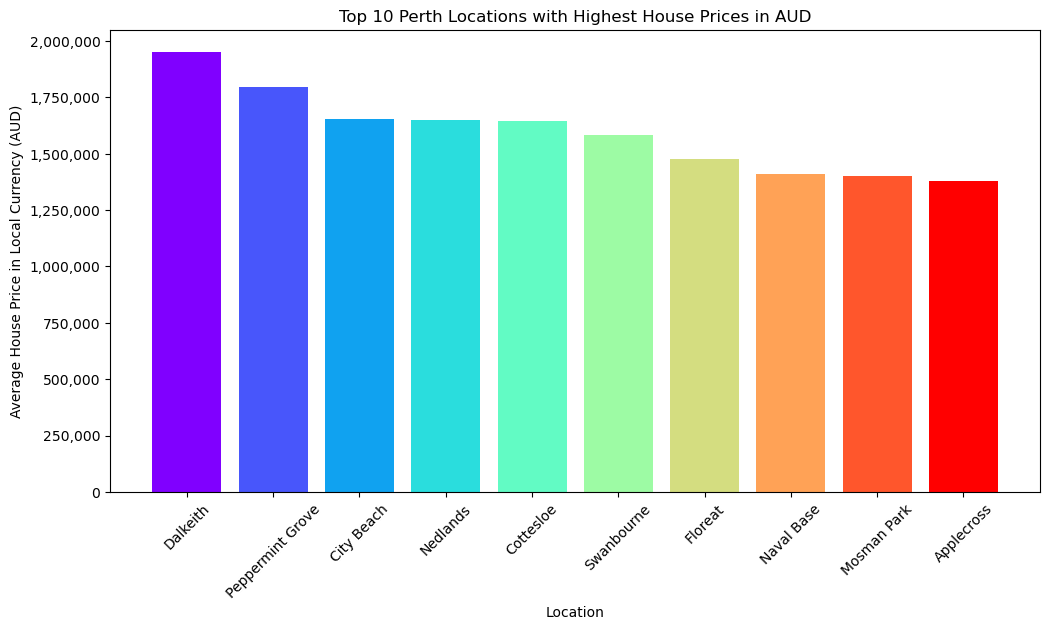

In [184]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = perth_data.groupby('Location')['Local_price'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Local_price', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Local_price'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (AUD)')
plt.title('Top 10 Perth Locations with Highest House Prices in AUD')
plt.xticks(rotation=45)
plt.show()

In [185]:
# Renaming the columns
perth_data.rename(columns={
    'Location': 'Location',
    'Area_sqft': 'Area_sqft',
    'Local_price': 'Local_price',
    'Rooms': 'Bedrooms',
    'Bathroom': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping irrelevant columns
perth_data.drop(columns=['Area_sqm'], inplace=True)

In [186]:
perth_data['City'] = 'Perth'

In [187]:
# Rearranging the columns of dataset
perth_data = perth_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
perth_data.head()

City    Location  Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  Perth  South Lake  1722.2240          2       565000         4   293800.0
1  Perth       Wandi  1496.1821          2       365000         3   189800.0
2  Perth     Camillo   925.6954          1       287000         3   149240.0
3  Perth    Bellevue   635.0701          1       255000         2   132600.0
4  Perth   Lockridge  1410.0709          1       325000         4   169000.0

## Importing Dubai Dataset

In [188]:
# Imporing Dubai Dataset
dubai_data = pd.read_csv("datasets/Dubai.csv")

In [189]:
# Printing first few rows of dataset
dubai_data.head()

beds  baths        area    price                          county
0   2.0    2.0  105.258268  1800000                     The Lagoons
1   2.0    3.0  130.063174  1125000                      Motor City
2   3.0    4.0  360.460795  3600000                    Dubai Marina
3   0.6    1.0   34.838350   405000   Jumeirah Village Circle (JVC)
4   3.0    4.0  145.856559  2100000                    Business Bay

In [190]:
# Renaming the columns of dataset
dubai_data.rename(columns={'price': 'Price_AED','county':'Location','area':'area_sqm'}, inplace=True)

In [191]:
dubai_data.head()

beds  baths    area_sqm  Price_AED                        Location
0   2.0    2.0  105.258268    1800000                     The Lagoons
1   2.0    3.0  130.063174    1125000                      Motor City
2   3.0    4.0  360.460795    3600000                    Dubai Marina
3   0.6    1.0   34.838350     405000   Jumeirah Village Circle (JVC)
4   3.0    4.0  145.856559    2100000                    Business Bay

In [192]:
dubai_data['Total_Rooms'] = dubai_data['beds'] + 2

In [193]:
# The 'beds' column is in float with some entries like 2.3,3.5 like that, so it is important to round it up
import math

# Apply the ceiling function to 'beds' column
dubai_data['beds'] = dubai_data['beds'].apply(math.ceil)

In [194]:
# Converting the Area which is in square meters into square feet
# Conversion factor
sqm_to_sqft = 10.7639

# Convert size_sqm to size_sqft
dubai_data["Area_sqft"] = dubai_data["area_sqm"] * sqm_to_sqft


In [195]:
dubai_data.head()

beds  baths    area_sqm  Price_AED                        Location  \
0     2    2.0  105.258268    1800000                     The Lagoons   
1     2    3.0  130.063174    1125000                      Motor City   
2     3    4.0  360.460795    3600000                    Dubai Marina   
3     1    1.0   34.838350     405000   Jumeirah Village Circle (JVC)   
4     3    4.0  145.856559    2100000                    Business Bay   

   Total_Rooms    Area_sqft  
0          4.0  1132.989474  
1          4.0  1399.986994  
2          5.0  3879.963954  
3          2.6   374.996516  
4          5.0  1569.985414

In [196]:
# Checking the null values
dubai_data.isnull().sum()

beds           0
baths          0
area_sqm       0
Price_AED      0
Location       0
Total_Rooms    0
Area_sqft      0
dtype: int64

In [197]:
# Creating another column of price in GBP
dubai_data['Price_GBP'] = dubai_data['Price_AED']*0.21

In [198]:
# Creating a column price per square feet, so that outliers can be removed in future
dubai_data = dubai_data.copy()
dubai_data['price_per_sqft'] = dubai_data['Price_AED']/dubai_data['Area_sqft']
dubai_data.head()

beds  baths    area_sqm  Price_AED                        Location  \
0     2    2.0  105.258268    1800000                     The Lagoons   
1     2    3.0  130.063174    1125000                      Motor City   
2     3    4.0  360.460795    3600000                    Dubai Marina   
3     1    1.0   34.838350     405000   Jumeirah Village Circle (JVC)   
4     3    4.0  145.856559    2100000                    Business Bay   

   Total_Rooms    Area_sqft  Price_GBP  price_per_sqft  
0          4.0  1132.989474   378000.0     1588.717319  
1          4.0  1399.986994   236250.0      803.578894  
2          5.0  3879.963954   756000.0      927.843671  
3          2.6   374.996516    85050.0     1080.010034  
4          5.0  1569.985414   441000.0     1337.592044

In [199]:
# Finding the count of locations occurences and printing highest to lowest
dubai_data.Location = dubai_data.Location.apply(lambda x: x.strip())
location_stats = dubai_data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Jumeirah Village Circle (JVC)    1397
Dubai Marina                      810
Business Bay                      733
Jumeirah Lake Towers (JLT)        610
Palm Jumeirah                     581
                                 ... 
Wasl Gate                          18
Jumeirah Heights                   13
Dragon City                        12
Dubai Industrial Park              10
Jebel Ali                           2
Name: Location, Length: 76, dtype: int64

In [200]:
# Printing number of locations that have occurence of 5 or less than 5, and storing it in one variable in cell below.
len(location_stats[location_stats<=5])

1

In [201]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

Location
Jebel Ali    2
Name: Location, dtype: int64

In [202]:
# Printing length of unique locations
len(dubai_data.Location.unique())

76

In [203]:
# Referring the location that occured less than or equal to 5 as 'Other'
dubai_data.Location = dubai_data.Location.apply(lambda x: 'Other' if x in location_stats_less_than_5 else x)
len(dubai_data.Location.unique())

76

In [204]:
# Common data cleaning step to identify outliers or unrealistic data points in datasets. After filtering, it returns the first few rows of the resulting DataFrame
dubai_data = dubai_data[~(dubai_data.Area_sqft/dubai_data.beds<300)]
dubai_data.shape

(11740, 9)

In [205]:
# This function removes outliers from the price_per_sqft column within each location in the cairo_data DataFrame. Outliers are defined as values 
# that are more than one standard deviation away from the mean price_per_sqft for that location. The cleaned DataFrame is then stored back in cairo_data.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m=np.mean(subdf.Area_sqft)
        st=np.std(subdf.Area_sqft)
        reduced_df = subdf[(subdf.Area_sqft>(m-st))& (subdf.Area_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

dubai_data = remove_pps_outliers(dubai_data)
dubai_data

beds  baths    area_sqm  Price_AED            Location  Total_Rooms  \
0        3    3.0  159.884801    1000000        Akoya Oxygen          5.0   
1        3    3.0  158.212560     999999        Akoya Oxygen          5.0   
2        3    4.0  158.212560    1112000        Akoya Oxygen          5.0   
3        3    4.0  174.749164    1582127        Akoya Oxygen          5.0   
4        5    5.0  227.889260    1350000        Akoya Oxygen          7.0   
...    ...    ...         ...        ...                 ...          ...   
9828     3    5.0  229.004088    3500000  World Trade Centre          5.0   
9829     2    3.0  178.000743    1800000  World Trade Centre          4.0   
9830     3    4.0  273.318469    3200000  World Trade Centre          5.0   
9831     3    4.0  272.668153    3550000  World Trade Centre          5.0   
9832     3    4.0  268.023040    2800000  World Trade Centre          5.0   

        Area_sqft  Price_GBP  price_per_sqft  
0     1720.984012  210000.00      581.062923  
1     1702.984179  209999.79      587.203929  
2     1702.984179  233520.00      652.971422  
3     1880.982525  332246.67      841.117330  
4     2452.977211  283500.00      550.351627  
...           ...        ...             ...  
9828  2464.977100  735000.00     1419.891487  
9829  1915.982200  378000.00      939.465930  
9830  2941.972668  672000.00     1087.705550  
9831  2934.972733  745500.00     1209.551271  
9832  2884.973198  588000.00      970.546278  

[9833 rows x 9 columns]

In [206]:
# The purpose of this function is to remove outliers in the Area_sqft (area in square feet) column for each number of beds within each location.
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('beds'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.Area_sqft),
                'std':np.std(bhk_df.Area_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('beds'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Area_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')    

dubai_data = remove_beds_outliers(dubai_data)
dubai_data.shape

(9550, 9)

In [207]:
dubai_data.head()

beds  baths    area_sqm  Price_AED      Location  Total_Rooms    Area_sqft  \
0     3    3.0  159.884801    1000000  Akoya Oxygen          5.0  1720.984012   
1     3    3.0  158.212560     999999  Akoya Oxygen          5.0  1702.984179   
2     3    4.0  158.212560    1112000  Akoya Oxygen          5.0  1702.984179   
3     3    4.0  174.749164    1582127  Akoya Oxygen          5.0  1880.982525   
4     5    5.0  227.889260    1350000  Akoya Oxygen          7.0  2452.977211   

   Price_GBP  price_per_sqft  
0  210000.00      581.062923  
1  209999.79      587.203929  
2  233520.00      652.971422  
3  332246.67      841.117330  
4  283500.00      550.351627

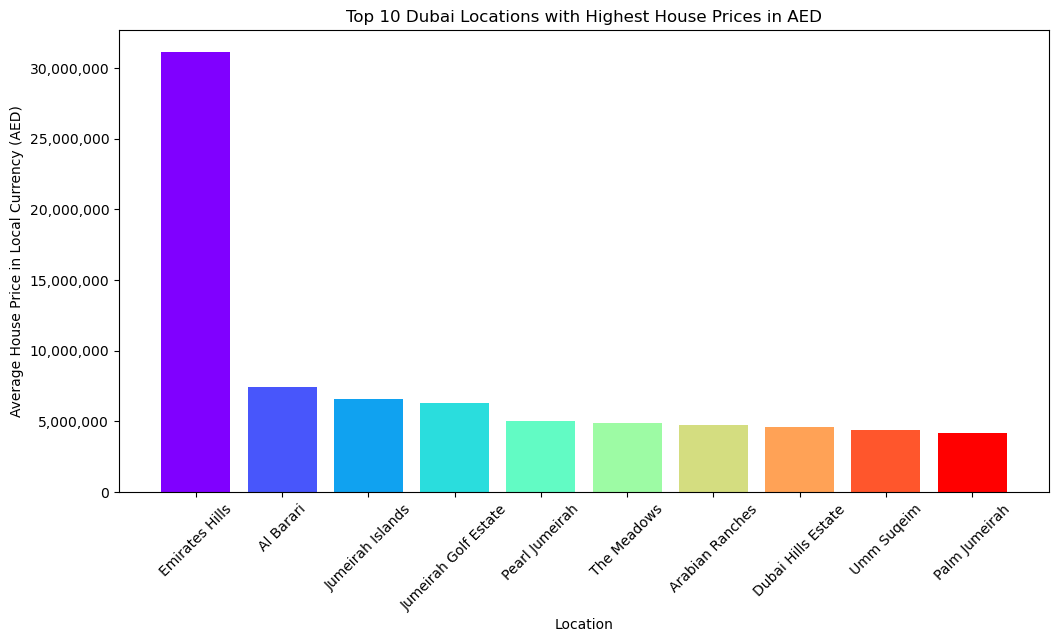

In [208]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = dubai_data.groupby('Location')['Price_AED'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_AED', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Price_AED'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (AED)')
plt.title('Top 10 Dubai Locations with Highest House Prices in AED')
plt.xticks(rotation=45)
plt.show()

In [209]:
# Increase figure size
plt.figure(figsize=(14, 10))

# Plot with seaborn
sns.barplot(x="Location", y="Price_AED", data=dubai_data)
plt.title("Property Prices in Dubai")
plt.xlabel("Location")
plt.ylabel("Price (AED)")

# Rotate x labels and adjust alignment
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [210]:
dubai_data.head()

beds  baths    area_sqm  Price_AED      Location  Total_Rooms    Area_sqft  \
0     3    3.0  159.884801    1000000  Akoya Oxygen          5.0  1720.984012   
1     3    3.0  158.212560     999999  Akoya Oxygen          5.0  1702.984179   
2     3    4.0  158.212560    1112000  Akoya Oxygen          5.0  1702.984179   
3     3    4.0  174.749164    1582127  Akoya Oxygen          5.0  1880.982525   
4     5    5.0  227.889260    1350000  Akoya Oxygen          7.0  2452.977211   

   Price_GBP  price_per_sqft  
0  210000.00      581.062923  
1  209999.79      587.203929  
2  233520.00      652.971422  
3  332246.67      841.117330  
4  283500.00      550.351627

In [211]:
# Renaming the columns
dubai_data.rename(columns={
    'Location': 'Location',
    'Area_sqft': 'Area_sqft',
    'Price_AED': 'Local_price',
    'beds': 'Bedrooms',
    'baths': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping irrelevant columns
dubai_data.drop(columns=['Total_Rooms', 'price_per_sqft','area_sqm'], inplace=True)

In [212]:
dubai_data['City'] = 'Dubai'

In [213]:
# Rearranging the columns of dataset
dubai_data = dubai_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
dubai_data.head()

City      Location    Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Dubai  Akoya Oxygen  1720.984012        3.0      1000000         3   
1  Dubai  Akoya Oxygen  1702.984179        3.0       999999         3   
2  Dubai  Akoya Oxygen  1702.984179        4.0      1112000         3   
3  Dubai  Akoya Oxygen  1880.982525        4.0      1582127         3   
4  Dubai  Akoya Oxygen  2452.977211        5.0      1350000         5   

   Price_GBP  
0  210000.00  
1  209999.79  
2  233520.00  
3  332246.67  
4  283500.00

## Importing Kuala Lumpur Dataset

In [214]:
# Importing Kuala Lumpur Dataset
kuala_lumpur_data = pd.read_csv('datasets/Kuala_Lumpur.csv')

In [215]:
# Printing first few rows of dataset
kuala_lumpur_data.head()

Title       Price    Area  \
0  M City Serviced Residence Jalan Ampang 886sf, ...  RM 690 000  AMPANG   
1  Cheapest fully furnished suria jelatek residen...  RM 420 000  AMPANG   
2  3bed 2bath Suria Jelatek Condo 5 min to LRT an...  RM 420 000  AMPANG   
3  [30% Below,1037sf] Direct Subsale not Auction!...  RM 568 444  AMPANG   
4  HOT area | Tiara Ampang | Near Ampang Point | ...  RM 618 000  AMPANG   

     Category         Size    Bedrooms    Bathrooms  
0  Apartments   886 sq.ft.  2 Bedrooms  2 Bathrooms  
1  Apartments   858 sq.ft.  3 Bedrooms  2 Bathrooms  
2  Apartments   860 sq.ft.  3 Bedrooms  2 Bathrooms  
3  Apartments  1037 sq.ft.  3 Bedrooms  2 Bathrooms  
4  Apartments  1650 sq.ft.  4 Bedrooms  2 Bathrooms

In [216]:
# Cleaning 'Size' column by splitting numbers and string
kuala_lumpur_data['Size'] = kuala_lumpur_data['Size'].apply(lambda x:int(x.split(' ')[0])).astype(int)

In [217]:
# Cleaning 'Bedrooms' column by splitting numbers and string
kuala_lumpur_data['Bedrooms'] = kuala_lumpur_data['Bedrooms'].apply(lambda x:int(x.split(' ')[0])).astype(int)

In [218]:
# Cleaning 'Bathrooms' column by splitting numbers and string
kuala_lumpur_data['Bathrooms'] = kuala_lumpur_data['Bathrooms'].apply(lambda x:int(x.split(' ')[0])).astype(int)

In [219]:
# Removing 'RM' prefix and any spaces, then convert to integer
kuala_lumpur_data['Price'] = kuala_lumpur_data['Price'].str.replace('RM ', '').str.replace(' ', '').astype(int)


In [220]:
# Keeping only relevant columns
columns_to_keep = ['Price', 'Area', 'Size','Bedrooms','Bathrooms']

# Create a new DataFrame with only the selected columns
kuala_lumpur_data = kuala_lumpur_data[columns_to_keep]

In [221]:
# Renaming the columns
kuala_lumpur_data.rename(columns={'Size': 'Area_sqm','Price':'Price_RM','Area':'Location'}, inplace=True)

In [222]:
# Converting the square feet into square meters
# Conversion factor
sqm_to_sqft = 10.7639

# Convert size_sqm to size_sqft
kuala_lumpur_data["Area_sqft"] = kuala_lumpur_data["Area_sqm"] * sqm_to_sqft

In [223]:
kuala_lumpur_data.head()

Price_RM Location  Area_sqm  Bedrooms  Bathrooms   Area_sqft
0    690000   AMPANG       886         2          2   9536.8154
1    420000   AMPANG       858         3          2   9235.4262
2    420000   AMPANG       860         3          2   9256.9540
3    568444   AMPANG      1037         3          2  11162.1643
4    618000   AMPANG      1650         4          2  17760.4350

In [224]:
# Checking the null values of dataset
kuala_lumpur_data.isnull().sum()

Price_RM     0
Location     0
Area_sqm     0
Bedrooms     0
Bathrooms    0
Area_sqft    0
dtype: int64

In [225]:
# Convert the price into GBP
kuala_lumpur_data['Price_GBP'] = kuala_lumpur_data['Price_RM']*0.16

In [226]:
kuala_lumpur_data.head()

Price_RM Location  Area_sqm  Bedrooms  Bathrooms   Area_sqft  Price_GBP
0    690000   AMPANG       886         2          2   9536.8154  110400.00
1    420000   AMPANG       858         3          2   9235.4262   67200.00
2    420000   AMPANG       860         3          2   9256.9540   67200.00
3    568444   AMPANG      1037         3          2  11162.1643   90951.04
4    618000   AMPANG      1650         4          2  17760.4350   98880.00

In [227]:
# Printing the number of rows and columns
kuala_lumpur_data.shape

(7790, 7)

In [228]:
# Printing length of unique locations
len(kuala_lumpur_data.Location.unique())

14

In [229]:
# Common data cleaning step to identify outliers or unrealistic data points in datasets. After filtering, it returns the first few rows of the resulting DataFrame
kuala_lumpur_data = kuala_lumpur_data[~(kuala_lumpur_data.Area_sqm/kuala_lumpur_data.Bedrooms<300)]
kuala_lumpur_data.shape

(5191, 7)

In [230]:
# Creating new column for price per square feet
kuala_lumpur_data['price_per_sqft'] = kuala_lumpur_data['Price_RM']/kuala_lumpur_data['Area_sqm']
kuala_lumpur_data.head()

Price_RM Location  Area_sqm  Bedrooms  Bathrooms   Area_sqft  Price_GBP  \
0    690000   AMPANG       886         2          2   9536.8154  110400.00   
3    568444   AMPANG      1037         3          2  11162.1643   90951.04   
4    618000   AMPANG      1650         4          2  17760.4350   98880.00   
5    428000   AMPANG      1250         4          2  13454.8750   68480.00   
6    450000   AMPANG       705         1          1   7588.5495   72000.00   

   price_per_sqft  
0      778.781038  
3      548.162006  
4      374.545455  
5      342.400000  
6      638.297872

In [231]:
kuala_lumpur_data.price_per_sqft.describe()

count    5191.000000
mean      445.192725
std       220.817999
min         1.000000
25%       338.222025
50%       410.557185
75%       493.107105
max      5263.157895
Name: price_per_sqft, dtype: float64

In [232]:
# This function removes outliers from the price_per_sqft column within each location in the cairo_data DataFrame. Outliers are defined as values 
# that are more than one standard deviation away from the mean price_per_sqft for that location. The cleaned DataFrame is then stored back in cairo_data.

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out  

kuala_lumpur_data = remove_pps_outliers(kuala_lumpur_data)
kuala_lumpur_data

Price_RM        Location  Area_sqm  Bedrooms  Bathrooms   Area_sqft  \
0       690000          AMPANG       886         2          2   9536.8154   
1       568444          AMPANG      1037         3          2  11162.1643   
2       618000          AMPANG      1650         4          2  17760.4350   
3       428000          AMPANG      1250         4          2  13454.8750   
4       450000          AMPANG       705         1          1   7588.5495   
...        ...             ...       ...       ...        ...         ...   
4168    460000  TAMAN MELAWATI      1200         3          2  12916.6800   
4169    450000  TAMAN MELAWATI      1007         3          2  10839.2473   
4170    580000  TAMAN MELAWATI      1209         3          2  13013.5551   
4171    630000  TAMAN MELAWATI      1098         3          2  11818.7622   
4172    390000  TAMAN MELAWATI       669         2          1   7201.0491   

      Price_GBP  price_per_sqft  
0     110400.00      778.781038  
1      90951.04      548.162006  
2      98880.00      374.545455  
3      68480.00      342.400000  
4      72000.00      638.297872  
...         ...             ...  
4168   73600.00      383.333333  
4169   72000.00      446.871897  
4170   92800.00      479.735318  
4171  100800.00      573.770492  
4172   62400.00      582.959641  

[4173 rows x 8 columns]

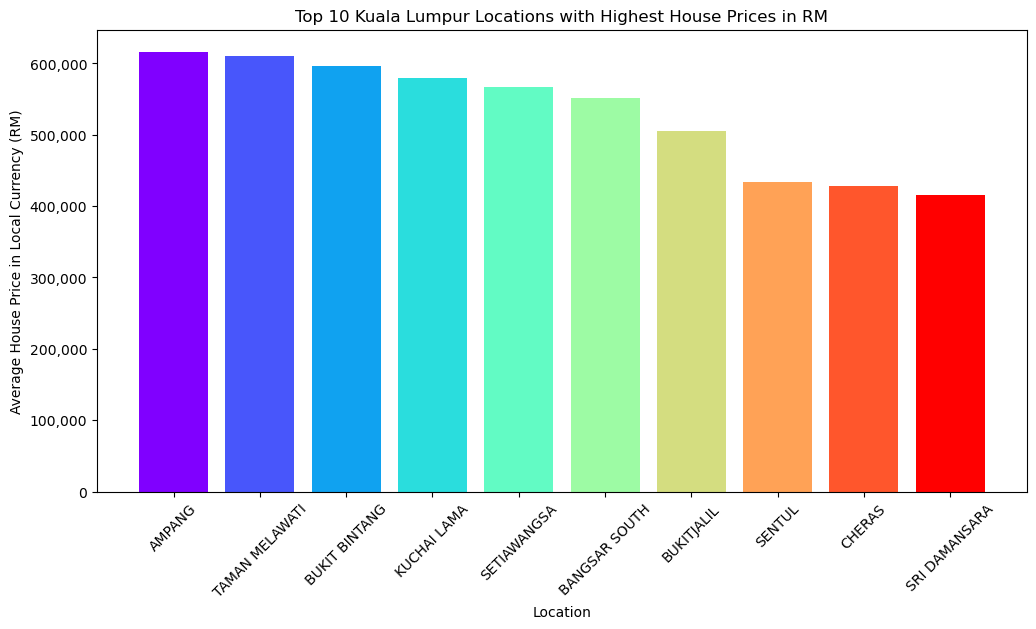

In [233]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = kuala_lumpur_data.groupby('Location')['Price_RM'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_RM', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Price_RM'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (RM)')
plt.title('Top 10 Kuala Lumpur Locations with Highest House Prices in RM')
plt.xticks(rotation=45)
plt.show()

In [234]:
kuala_lumpur_data.head()

Price_RM Location  Area_sqm  Bedrooms  Bathrooms   Area_sqft  Price_GBP  \
0    690000   AMPANG       886         2          2   9536.8154  110400.00   
1    568444   AMPANG      1037         3          2  11162.1643   90951.04   
2    618000   AMPANG      1650         4          2  17760.4350   98880.00   
3    428000   AMPANG      1250         4          2  13454.8750   68480.00   
4    450000   AMPANG       705         1          1   7588.5495   72000.00   

   price_per_sqft  
0      778.781038  
1      548.162006  
2      374.545455  
3      342.400000  
4      638.297872

In [235]:
# Renaming the columns
kuala_lumpur_data.rename(columns={
    'Location': 'Location',
    'Area_sqft': 'Area_sqft',
    'Price_RM': 'Local_price',
    'Bedrooms': 'Bedrooms',
    'Bathrooms': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping irrelevant column
kuala_lumpur_data.drop(columns=['price_per_sqft','Area_sqm'], inplace=True)

In [236]:
kuala_lumpur_data['City'] = 'Kuala Lumpur'

In [237]:
# Rearranging the columns of dataset
kuala_lumpur_data = kuala_lumpur_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
kuala_lumpur_data.head()

City Location   Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Kuala Lumpur   AMPANG   9536.8154          2       690000         2   
1  Kuala Lumpur   AMPANG  11162.1643          2       568444         3   
2  Kuala Lumpur   AMPANG  17760.4350          2       618000         4   
3  Kuala Lumpur   AMPANG  13454.8750          2       428000         4   
4  Kuala Lumpur   AMPANG   7588.5495          1       450000         1   

   Price_GBP  
0  110400.00  
1   90951.04  
2   98880.00  
3   68480.00  
4   72000.00

## Importing Lisbon Dataset

In [238]:
# Importing the Lisbon dataset
lisbon_data = pd.read_csv('datasets/Lisbon.csv')

In [239]:
lisbon_data.head()

Id Condition PropertyType PropertySubType  Bedrooms  Bathrooms  AreaNet  \
0  101      Used        Homes       Apartment         3          1       76   
1  102      Used        Homes          Duplex         5          3      190   
2  103      Used        Homes       Apartment         1          1       26   
3  104      Used        Homes       Apartment         5          4      185   
4  105      Used        Homes       Apartment         7          1      150   

   AreaGross  Parking  Latitude  Longitude   Country District Municipality  \
0        152        0   38.7792    -9.1186  Portugal   Lisboa       Lisboa   
1        380        0   38.7056    -9.1784  Portugal   Lisboa       Lisboa   
2         52        0   38.7058    -9.1639  Portugal   Lisboa       Lisboa   
3        370        0   38.7466    -9.1640  Portugal   Lisboa       Lisboa   
4        300        0   38.7323    -9.1287  Portugal   Lisboa       Lisboa   

                    Parish  Price M2    Price  
0                  Olivais      2463   198000  
1                Alcantara      3125  1270000  
2                  Estrela      4005   140000  
3  Sao Domingos de Benfica      3412   995000  
4                  Arroios      3277   570000

In [240]:
# Keeping only necessary columns
columns_to_keep = ['PropertySubType', 'Bedrooms', 'Bathrooms','AreaNet','District','Parish','Price']

# Createa new DataFrame with only the selected columns
lisbon_data = lisbon_data[columns_to_keep]

In [241]:
# Renaming the column
lisbon_data.rename(columns={'AreaNet': 'Area_sqm','Parish':'Location','Price':'Price_Euro'}, inplace=True)

In [242]:
lisbon_data['Total_Rooms'] = lisbon_data['Bedrooms'] + 2

In [243]:
# Printing first few rows of the dataset
lisbon_data.head()

PropertySubType  Bedrooms  Bathrooms  Area_sqm District  \
0       Apartment         3          1        76   Lisboa   
1          Duplex         5          3       190   Lisboa   
2       Apartment         1          1        26   Lisboa   
3       Apartment         5          4       185   Lisboa   
4       Apartment         7          1       150   Lisboa   

                  Location  Price_Euro  Total_Rooms  
0                  Olivais      198000            5  
1                Alcantara     1270000            7  
2                  Estrela      140000            3  
3  Sao Domingos de Benfica      995000            7  
4                  Arroios      570000            9

In [244]:
# Converting Area which is in square meters into Square Feet.

# Conversion factor
sqm_to_sqft = 10.7639

# Convert size_sqm to size_sqft
lisbon_data["Area_sqft"] = lisbon_data["Area_sqm"] * sqm_to_sqft


In [245]:
# Converting local price into GBP and storing into new column
lisbon_data['Price_GBP'] = lisbon_data['Price_Euro']*0.85

In [246]:
lisbon_data.head()

PropertySubType  Bedrooms  Bathrooms  Area_sqm District  \
0       Apartment         3          1        76   Lisboa   
1          Duplex         5          3       190   Lisboa   
2       Apartment         1          1        26   Lisboa   
3       Apartment         5          4       185   Lisboa   
4       Apartment         7          1       150   Lisboa   

                  Location  Price_Euro  Total_Rooms  Area_sqft  Price_GBP  
0                  Olivais      198000            5   818.0564   168300.0  
1                Alcantara     1270000            7  2045.1410  1079500.0  
2                  Estrela      140000            3   279.8614   119000.0  
3  Sao Domingos de Benfica      995000            7  1991.3215   845750.0  
4                  Arroios      570000            9  1614.5850   484500.0

In [247]:
# Checking null values of the dataset
lisbon_data.isnull().sum()

PropertySubType    0
Bedrooms           0
Bathrooms          0
Area_sqm           0
District           0
Location           0
Price_Euro         0
Total_Rooms        0
Area_sqft          0
Price_GBP          0
dtype: int64

In [248]:
# Grouping by Property Type and calculating average price
avg_price_by_type = lisbon_data.groupby("PropertySubType")["Price_Euro"].mean().reset_index()

rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(top_10_locations)))
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_type["PropertySubType"], avg_price_by_type["Price_Euro"], color=rainbow_colors)
plt.title('Average Price by Property Type')
plt.xlabel('PropertySubType')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45) 
plt.show()

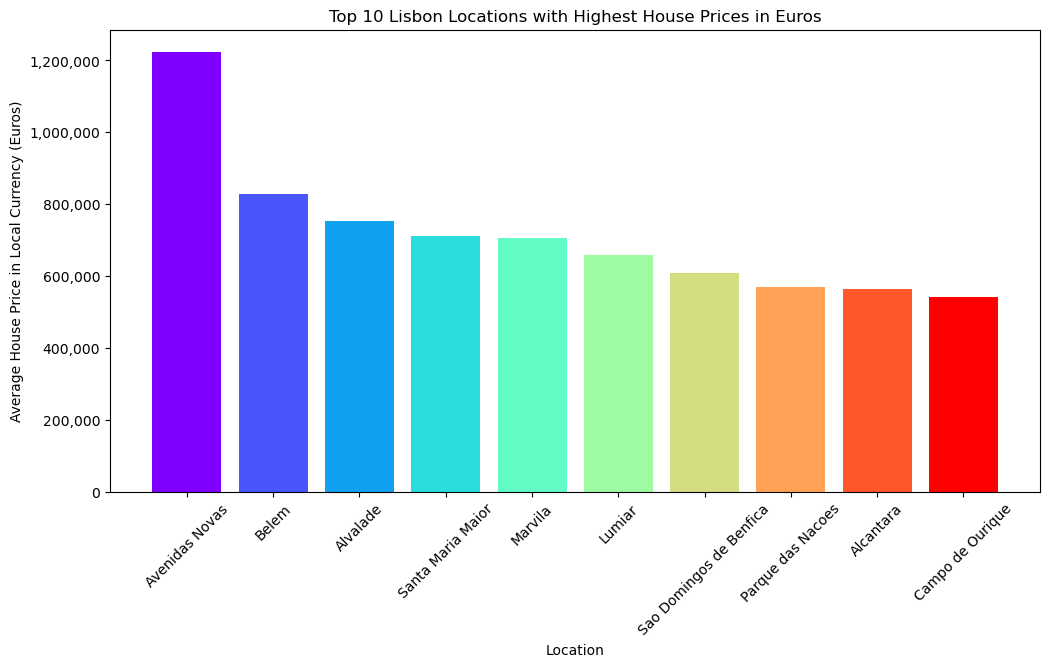

In [249]:
# Plotting the graph for top 10 site location with highest to lowest house prices
# Calculate average prices for demonstration
location_avg_price = lisbon_data.groupby('Location')['Price_Euro'].mean().reset_index()
top_10_locations = location_avg_price.sort_values(by='Price_Euro', ascending=False).head(10)

# Define rainbow colors
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_locations['Location'], top_10_locations['Price_Euro'], color=rainbow_colors)

# Adding integer y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Location')
plt.ylabel('Average House Price in Local Currency (Euros)')
plt.title('Top 10 Lisbon Locations with Highest House Prices in Euros')
plt.xticks(rotation=45)
plt.show()

In [250]:
lisbon_data.head()

PropertySubType  Bedrooms  Bathrooms  Area_sqm District  \
0       Apartment         3          1        76   Lisboa   
1          Duplex         5          3       190   Lisboa   
2       Apartment         1          1        26   Lisboa   
3       Apartment         5          4       185   Lisboa   
4       Apartment         7          1       150   Lisboa   

                  Location  Price_Euro  Total_Rooms  Area_sqft  Price_GBP  
0                  Olivais      198000            5   818.0564   168300.0  
1                Alcantara     1270000            7  2045.1410  1079500.0  
2                  Estrela      140000            3   279.8614   119000.0  
3  Sao Domingos de Benfica      995000            7  1991.3215   845750.0  
4                  Arroios      570000            9  1614.5850   484500.0

In [251]:
# Renaming the columns
lisbon_data.rename(columns={
    'Location': 'Location',
    'Area_sqft': 'Area_sqft',
    'Price_Euro': 'Local_price',
    'Bedrooms': 'Bedrooms',
    'Bathrooms': 'Bathrooms',
    'Price_GBP': 'Price_GBP'
}, inplace=True)

# Dropping irrelevant columns
lisbon_data.drop(columns=['Total_Rooms','Area_sqm','PropertySubType','District'], inplace=True)

In [252]:
lisbon_data['City'] = 'Lisbon'

In [253]:
# Rearranging the columns of dataset
lisbon_data = lisbon_data[['City','Location', 'Area_sqft', 'Bathrooms', 'Local_price', 'Bedrooms', 'Price_GBP']]
lisbon_data.head()

City                 Location  Area_sqft  Bathrooms  Local_price  \
0  Lisbon                  Olivais   818.0564          1       198000   
1  Lisbon                Alcantara  2045.1410          3      1270000   
2  Lisbon                  Estrela   279.8614          1       140000   
3  Lisbon  Sao Domingos de Benfica  1991.3215          4       995000   
4  Lisbon                  Arroios  1614.5850          1       570000   

   Bedrooms  Price_GBP  
0         3   168300.0  
1         5  1079500.0  
2         1   119000.0  
3         5   845750.0  
4         7   484500.0

----------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------

In [254]:
mean_prices = {
    'Bengaluru': bengaluru_data['Price_GBP'].mean(),
    'Pune': pune_data['Price_GBP'].mean(),
    'Cairo': cairo_data['Price_GBP'].mean(),
    'Bangkok': bangkok_data['Price_GBP'].mean(),
    'London': london_data['Price_GBP'].mean(),
#     'New York': newyork_data['Price_GBP'].mean(),
    'Perth': perth_data['Price_GBP'].mean(),
    'Dubai': dubai_data['Price_GBP'].mean(),
    'Kuala Lumpur': kuala_lumpur_data['Price_GBP'].mean(),
    'Lisbon': lisbon_data['Price_GBP'].mean()
}

all_cities_house_prices = pd.DataFrame(list(mean_prices.items()), columns=['City', 'Mean_Price_GBP'])


In [255]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='City', y='Mean_Price_GBP', data=all_cities_house_prices, palette='viridis')

# Add value annotations on the bars
for p in ax.patches:
    ax.annotate(f'£{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Customize the plot
plt.title('Average House Prices in Various Cities (GBP)')
plt.xlabel('City')
plt.ylabel('Mean Price in GBP')
plt.xticks(rotation=45)

# Format y-axis labels as real prices with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'£{int(x):,}'))

plt.ylim(0, all_cities_house_prices['Mean_Price_GBP'].max() + 100000)
plt.tight_layout()
plt.show()

## Model Prediction for Bengaluru

In [256]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Bangalore's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(bengaluru_data.Location)
dummies.head(3)

dummies2 = pd.get_dummies(bengaluru_data.City)
dummies2.head(3)

Bengaluru
0       True
1       True
2       True

In [257]:
# # Concatenating the original bengaluru_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'

bengaluru_data = pd.concat([bengaluru_data,dummies,dummies2],axis='columns')
bengaluru_data.head(3)

City            Location  Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Bengaluru  1st Phase JP Nagar     2825.0        4.0   25000000.0         4   
1  Bengaluru  1st Phase JP Nagar     1875.0        3.0   16700000.0         3   
2  Bengaluru  1st Phase JP Nagar     1500.0        5.0    8500000.0         5   

   Price_GBP  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0   235000.0                True                      False   
1   156980.0                True                      False   
2    79900.0                True                      False   

   5th Phase JP Nagar  ...  Vijayanagar  Vittasandra  Whitefield  \
0               False  ...        False        False       False   
1               False  ...        False        False       False   
2               False  ...        False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  \
0           False      False               False        False         False   
1           False      False               False        False         False   
2           False      False               False        False         False   

   other  Bengaluru  
0  False       True  
1  False       True  
2  False       True  

[3 rows x 232 columns]

In [258]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
bengaluru_data = bengaluru_data.drop(['Location','City'],axis='columns')
bengaluru_data.head(2)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  1st Phase JP Nagar  \
0     2825.0        4.0   25000000.0         4   235000.0                True   
1     1875.0        3.0   16700000.0         3   156980.0                True   

   2nd Phase Judicial Layout  5th Phase JP Nagar  6th Phase JP Nagar  \
0                      False               False               False   
1                      False               False               False   

   7th Phase JP Nagar  ...  Vijayanagar  Vittasandra  Whitefield  \
0               False  ...        False        False       False   
1               False  ...        False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  \
0           False      False               False        False         False   
1           False      False               False        False         False   

   other  Bengaluru  
0  False       True  
1  False       True  

[2 rows x 230 columns]

In [259]:
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
from sklearn.model_selection import train_test_split
X = bengaluru_data.drop(['Local_price','Price_GBP'],axis='columns')
X.isna().sum()

Area_sqft                    0
Bathrooms                    0
Bedrooms                     0
1st Phase JP Nagar           0
2nd Phase Judicial Layout    0
                            ..
Yelahanka New Town           0
Yelenahalli                  0
Yeshwanthpur                 0
other                        0
Bengaluru                    0
Length: 228, dtype: int64

In [260]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = bengaluru_data.Price_GBP
y.head()

0    235000.0
1    156980.0
2     79900.0
3    197400.0
4    147580.0
Name: Price_GBP, dtype: float64

In [261]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_bangalore = X
y_bangalore = y

In [262]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [263]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 81% for Bangalore Dataset.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.816381703697692

In [262]:
# Creating ShuffleSplit cross-validator with 5 splits and 20% test size
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# Performing cross-validation for LinearRegression model, this returns an array of scores of the estimator for each run of the cross-validation.
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.79099369, 0.78112961, 0.75085768, 0.79082711, 0.81778535])

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Performing hyperparameter grids for different algorithms
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'n_jobs': [None, -1]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1],
            'selection': ['random']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'absolute_error'],
            'splitter': ['best']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50],
            'criterion': ['squared_error', 'absolute_error']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.1]
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear'],
            'C': [1]
        }
    }
}

def find_best_model_using_gridsearchcv(X, y, algos):
    scores = []
    # Creating ShuffleSplit cross-validator
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0) 
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [264]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X, y, algos)


In [265]:
# Printing the DF it has the accuracies of algorithms used. Highest accuracy is of Lasso
result_df

model  best_score  \
0  linear_regression    0.774327   
1              lasso    0.774355   
2      decision_tree    0.669311   
3      random_forest    0.761570   
4  gradient_boosting    0.760150   
5                svr    0.647923   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  
3  {'criterion': 'absolute_error', 'n_estimators'...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

In [266]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)



Lasso(alpha=1, selection='random')

In [267]:
# Using pickle to export the model
import pickle
with open('../server/artifacts/bangalore/model.pickle', 'wb') as f:
        pickle.dump(best_model, f)

In [ ]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/bangalore/columns.json","w") as f:
    f.write(json.dumps(columns))

In [268]:
""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""

evaluation_results = [] 
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.813386920713533
Testing score : 0.816381703697692


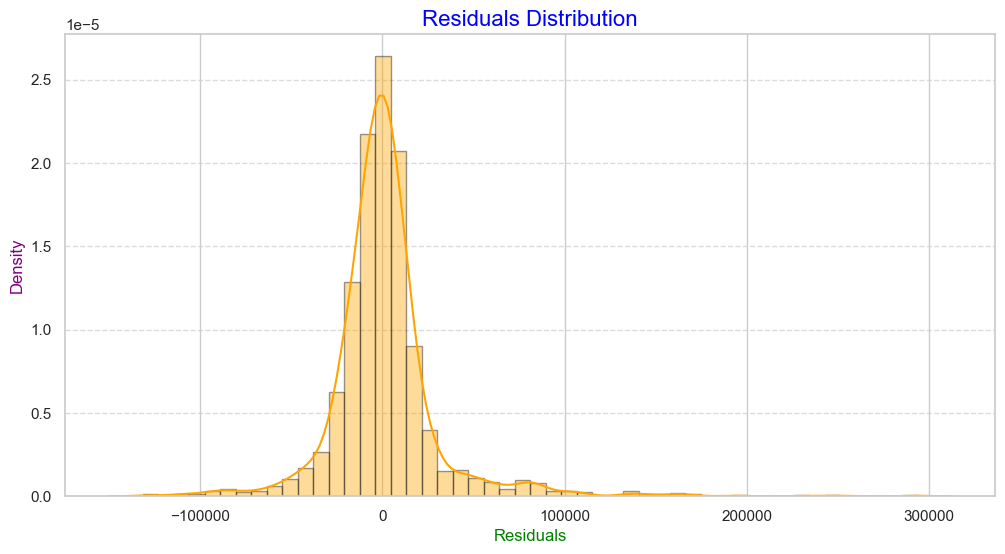

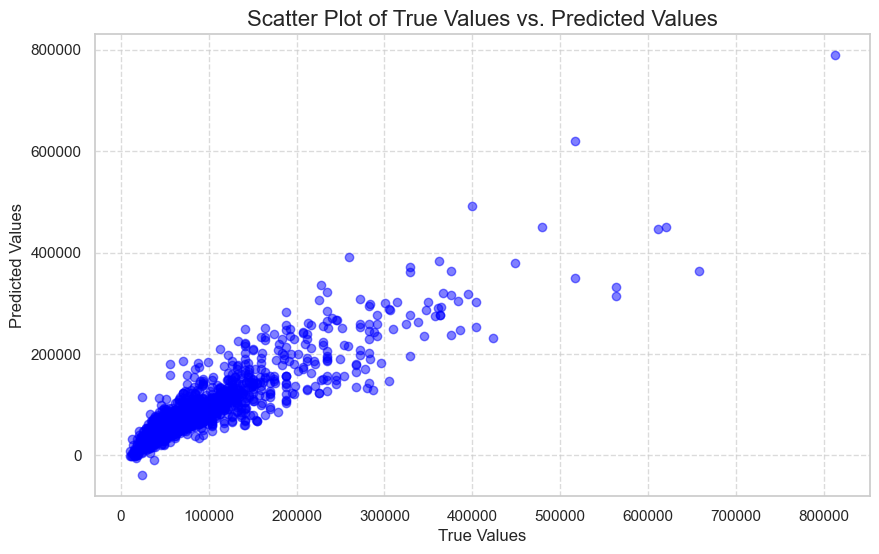

In [269]:
# Evaluating a Linear Regression model on the training and test data

evaluate_model(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.8126975834877374
Testing score : 0.8164966641053419


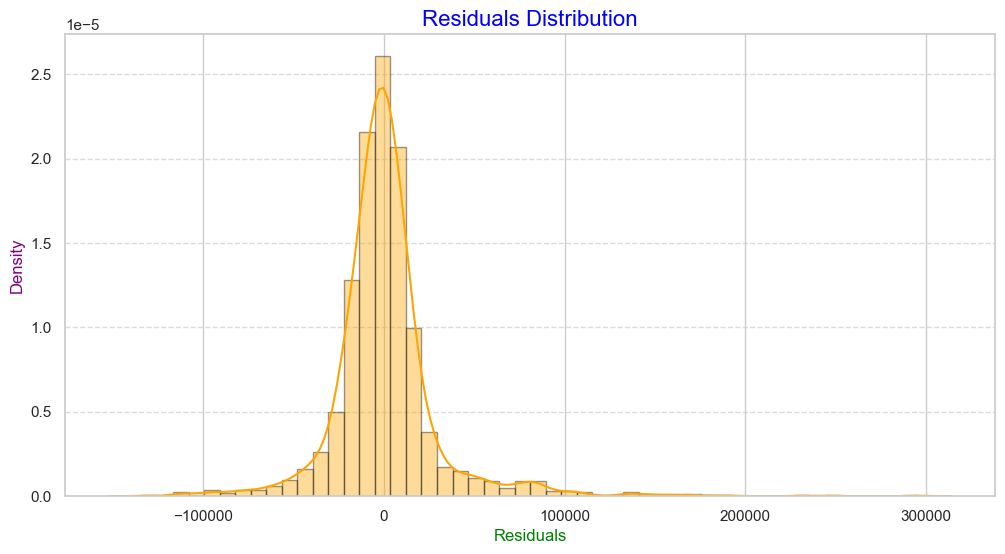

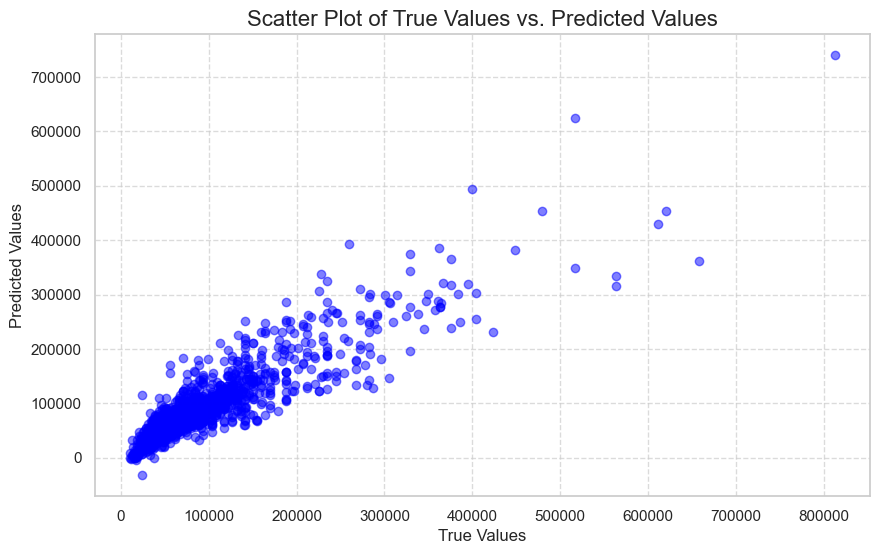

In [270]:
# Evaluating a Ridge model on the training and test data
from sklearn.linear_model import Ridge
evaluate_model(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.813367816308962
Testing score : 0.8164070736583349


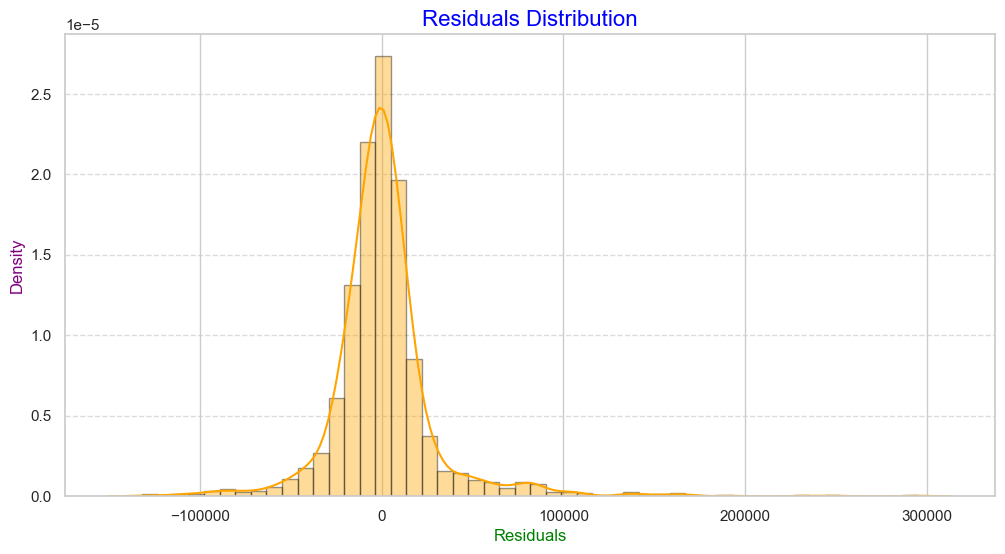

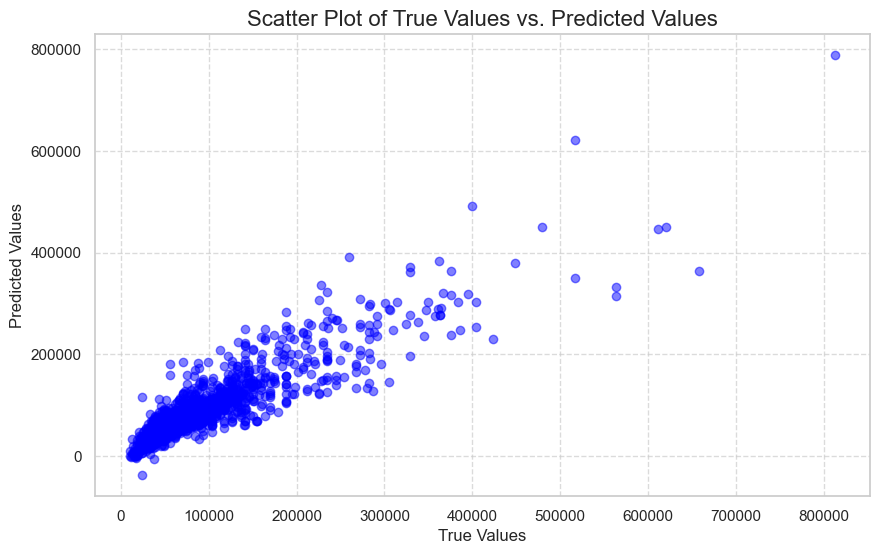

In [271]:
# Evaluating a Lasso model on the training and test data
from sklearn.linear_model import Lasso
evaluate_model(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9799709935071205
Testing score : 0.7438834751530354


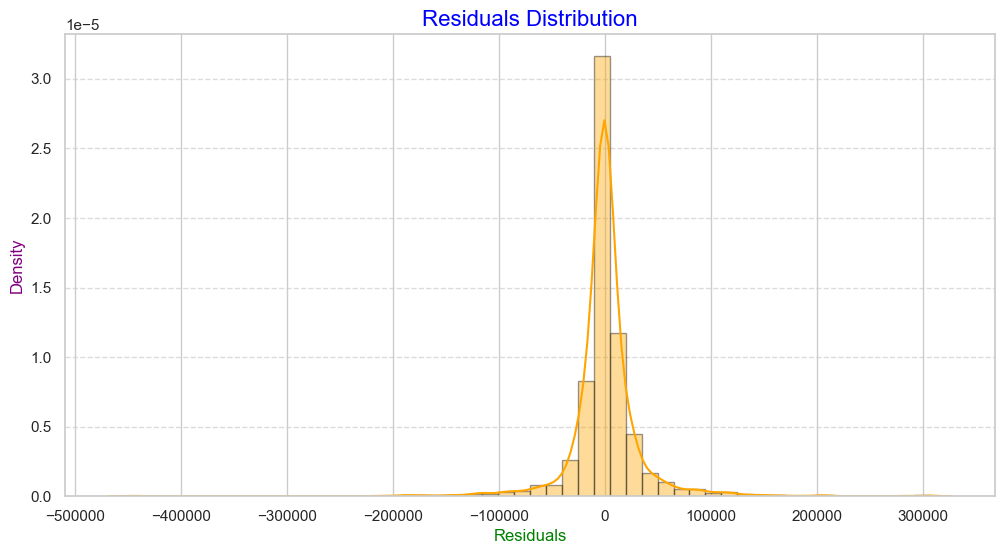

In [272]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [273]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

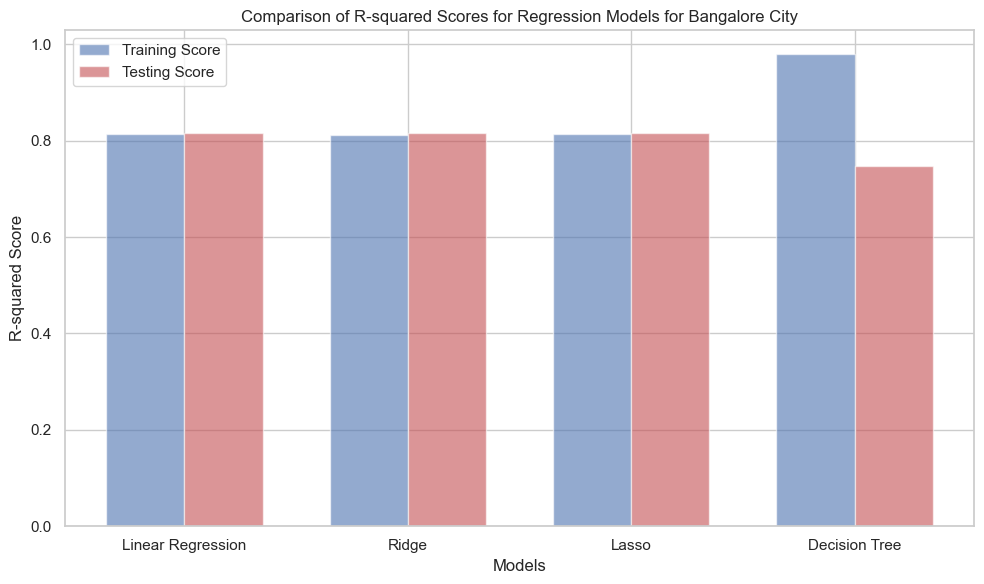

In [274]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Bangalore City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

## Model Prediction for Pune

In [264]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Pune's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(pune_data.Location)
# dummies['other'] = 'Any'
dummies2 = pd.get_dummies(pune_data.City)
dummies.head(3)

Alandi Road  Ambegaon Budruk  Anandnagar  Aundh  Aundh Road  Balaji Nagar  \
0         True            False       False  False       False         False   
1         True            False       False  False       False         False   
2         True            False       False  False       False         False   

   Baner  Baner road  Bhandarkar Road  Bhavani Peth  ...  Uruli Devachi  \
0  False       False            False         False  ...          False   
1  False       False            False         False  ...          False   
2  False       False            False         False  ...          False   

   Vadgaon Budruk  Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  \
0           False        False          False          False    False   
1           False        False          False          False    False   
2           False        False          False          False    False   

   Wakadewadi  Wanowrie  Warje  Yerawada  
0       False     False  False     False  
1       False     False  False     False  
2       False     False  False     False  

[3 rows x 96 columns]

In [265]:
# Concatenating the original pune_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'

pune_data = pd.concat([pune_data,dummies,dummies2],axis='columns')
pune_data

City     Location  Area_sqft  Bathrooms  Local_price  Bedrooms  \
0      Pune  Alandi Road     1056.0        2.0    3907000.0         2   
1      Pune  Alandi Road     2894.0        4.0   24500000.0         4   
2      Pune  Alandi Road     1084.0        2.0    5000000.0         2   
3      Pune  Alandi Road     1230.0        2.0    8000000.0         2   
4      Pune  Alandi Road     1750.0        3.0   13000000.0         3   
...     ...          ...        ...        ...          ...       ...   
10868  Pune     Yerawada     1355.0        2.0    7500000.0         3   
10870  Pune     Yerawada     1165.0        2.0    6700000.0         2   
10875  Pune     Yerawada     3500.0        6.0   11500000.0         6   
10878  Pune     Yerawada     1050.0        2.0    5400000.0         2   
10882  Pune     Yerawada     1132.0        2.0    7000000.0         2   

       Price_GBP  Alandi Road  Ambegaon Budruk  Anandnagar  ...  \
0        36725.8         True            False       False  ...   
1       230300.0         True            False       False  ...   
2        47000.0         True            False       False  ...   
3        75200.0         True            False       False  ...   
4       122200.0         True            False       False  ...   
...          ...          ...              ...         ...  ...   
10868    70500.0        False            False       False  ...   
10870    62980.0        False            False       False  ...   
10875   108100.0        False            False       False  ...   
10878    50760.0        False            False       False  ...   
10882    65800.0        False            False       False  ...   

       Vadgaon Budruk  Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  \
0               False        False          False          False    False   
1               False        False          False          False    False   
2               False        False          False          False    False   
3               False        False          False          False    False   
4               False        False          False          False    False   
...               ...          ...            ...            ...      ...   
10868           False        False          False          False    False   
10870           False        False          False          False    False   
10875           False        False          False          False    False   
10878           False        False          False          False    False   
10882           False        False          False          False    False   

       Wakadewadi  Wanowrie  Warje  Yerawada  Pune  
0           False     False  False     False  True  
1           False     False  False     False  True  
2           False     False  False     False  True  
3           False     False  False     False  True  
4           False     False  False     False  True  
...           ...       ...    ...       ...   ...  
10868       False     False  False      True  True  
10870       False     False  False      True  True  
10875       False     False  False      True  True  
10878       False     False  False      True  True  
10882       False     False  False      True  True  

[7479 rows x 104 columns]

In [266]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
pune_data = pune_data.drop(['Location','City'],axis='columns')
pune_data.head(2)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  Alandi Road  \
0     1056.0        2.0    3907000.0         2    36725.8         True   
1     2894.0        4.0   24500000.0         4   230300.0         True   

   Ambegaon Budruk  Anandnagar  Aundh  Aundh Road  ...  Vadgaon Budruk  \
0            False       False  False       False  ...           False   
1            False       False  False       False  ...           False   

   Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  Wakadewadi  Wanowrie  \
0        False          False          False    False       False     False   
1        False          False          False    False       False     False   

   Warje  Yerawada  Pune  
0  False     False  True  
1  False     False  True  

[2 rows x 102 columns]

In [267]:
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = pune_data.drop(['Local_price','Price_GBP'],axis='columns')
X.head()

Area_sqft  Bathrooms  Bedrooms  Alandi Road  Ambegaon Budruk  Anandnagar  \
0     1056.0        2.0         2         True            False       False   
1     2894.0        4.0         4         True            False       False   
2     1084.0        2.0         2         True            False       False   
3     1230.0        2.0         2         True            False       False   
4     1750.0        3.0         3         True            False       False   

   Aundh  Aundh Road  Balaji Nagar  Baner  ...  Vadgaon Budruk  Viman Nagar  \
0  False       False         False  False  ...           False        False   
1  False       False         False  False  ...           False        False   
2  False       False         False  False  ...           False        False   
3  False       False         False  False  ...           False        False   
4  False       False         False  False  ...           False        False   

   Vishrant Wadi  Wadgaon Sheri  Wagholi  Wakadewadi  Wanowrie  Warje  \
0          False          False    False       False     False  False   
1          False          False    False       False     False  False   
2          False          False    False       False     False  False   
3          False          False    False       False     False  False   
4          False          False    False       False     False  False   

   Yerawada  Pune  
0     False  True  
1     False  True  
2     False  True  
3     False  True  
4     False  True  

[5 rows x 100 columns]

In [268]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = pune_data.Price_GBP
y.head()

0     36725.8
1    230300.0
2     47000.0
3     75200.0
4    122200.0
Name: Price_GBP, dtype: float64

In [269]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_pune = X
y_pune = y

In [268]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [273]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 82.3% for Pune Dataset.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8234795051546784

In [274]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# Creating ShuffleSplit cross-validator with 5 splits and 20% test size
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# Performing cross-validation for LinearRegression model, this returns an array of scores of the estimator for each run of the cross-validation.
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87729173, 0.85732921, 0.82698825, 0.89763338, 0.81080298])

In [275]:
# Performing hyperparameter grids for different algorithms

algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'n_jobs': [None, -1]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1],
            'selection': ['random']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'absolute_error'],
            'splitter': ['best']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50],
            'criterion': ['squared_error', 'absolute_error']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.1]
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear'],
            'C': [1]
        }
    }
}

def find_best_model_using_gridsearchcv(X, y, algos):
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [276]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.853870   
1              lasso    0.859097   
2      decision_tree    0.739154   
3      random_forest    0.789790   
4  gradient_boosting    0.816341   
5                svr    0.855359   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  
3  {'criterion': 'squared_error', 'n_estimators':...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

In [277]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

Lasso(alpha=1, selection='random')

In [278]:
# Using pickle to export the model
with open('../server/artifacts/pune/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/pune/columns.json","w") as f:
    f.write(json.dumps(columns))

In [292]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""

evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.8577826435917323
Testing score : 0.8234795051546784


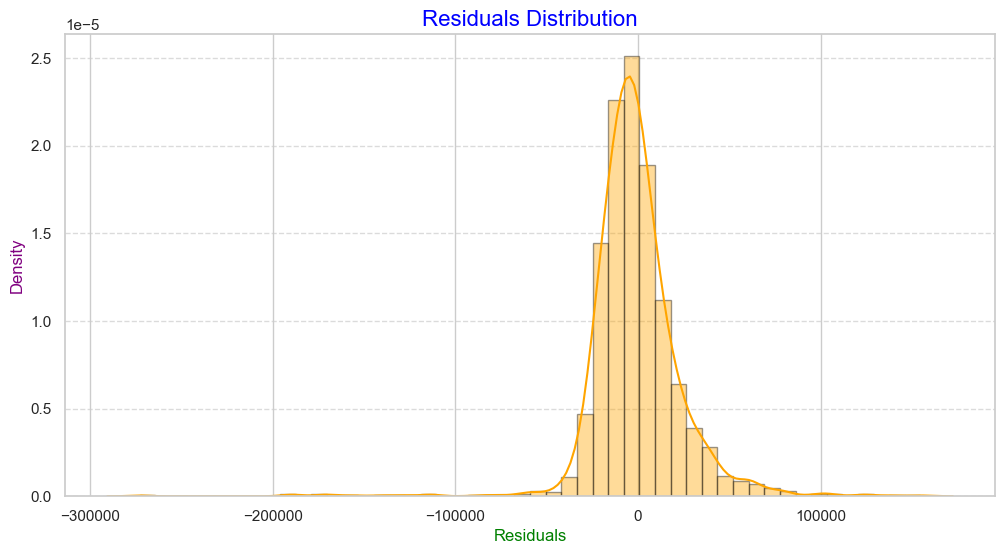

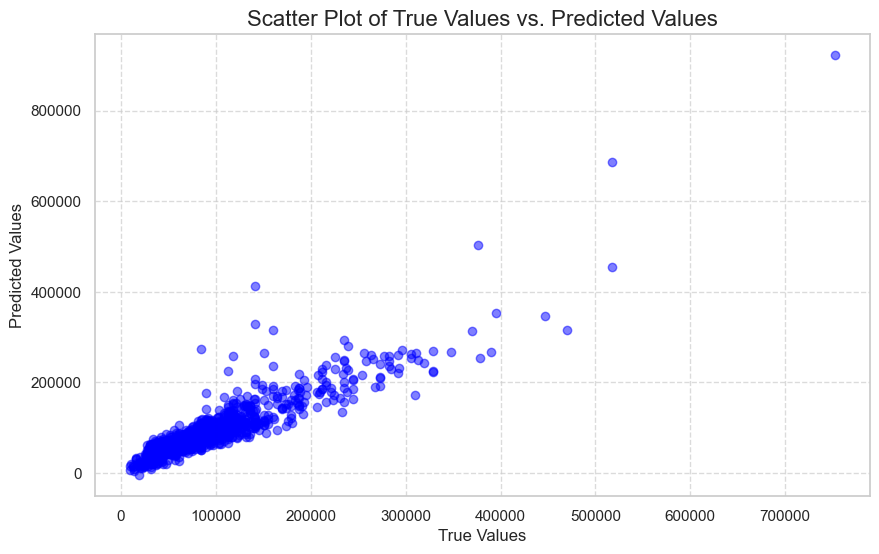

In [293]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.8577815854153429
Testing score : 0.8235747444812362


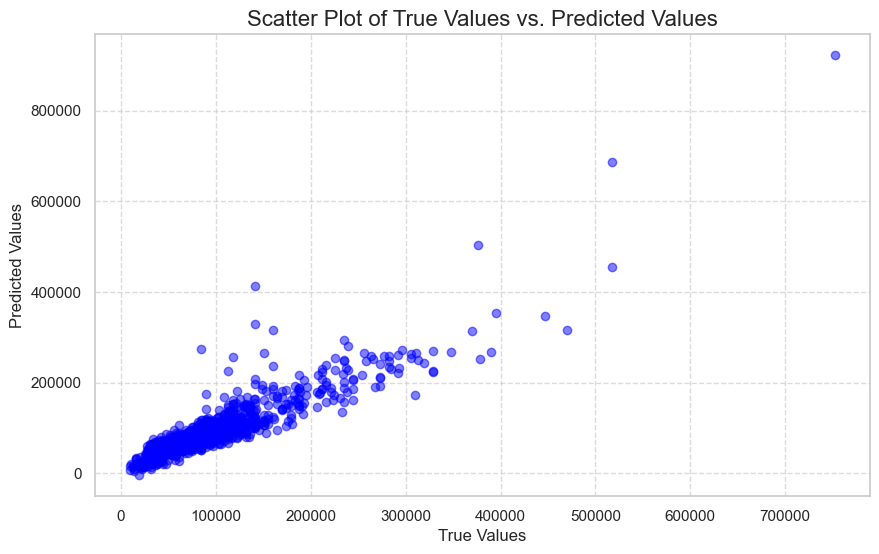

In [294]:
# Evaluating a Ridge model on the training and test data
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.8577816363402471
Testing score : 0.8235484293873025


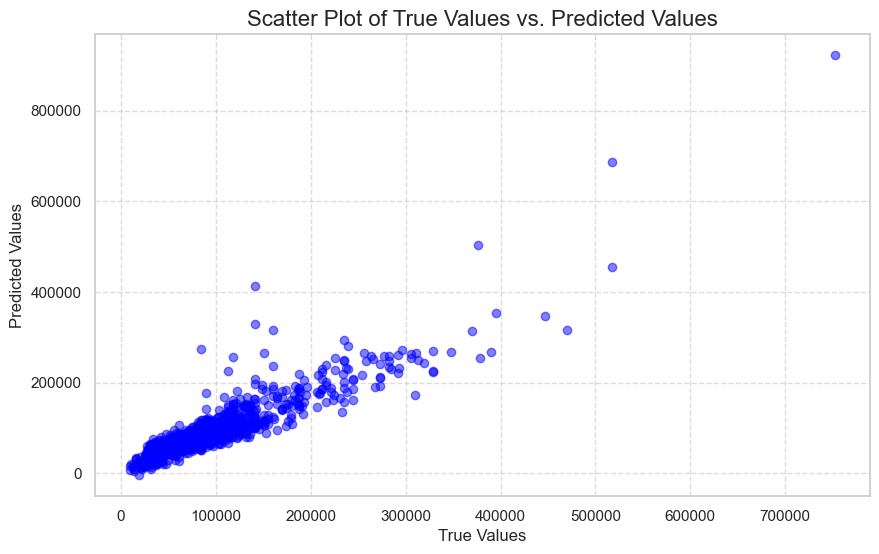

In [295]:
# Evaluating a Lasso model on the training and test data
from sklearn.linear_model import Lasso
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9970354306712794
Testing score : 0.7624548765722416


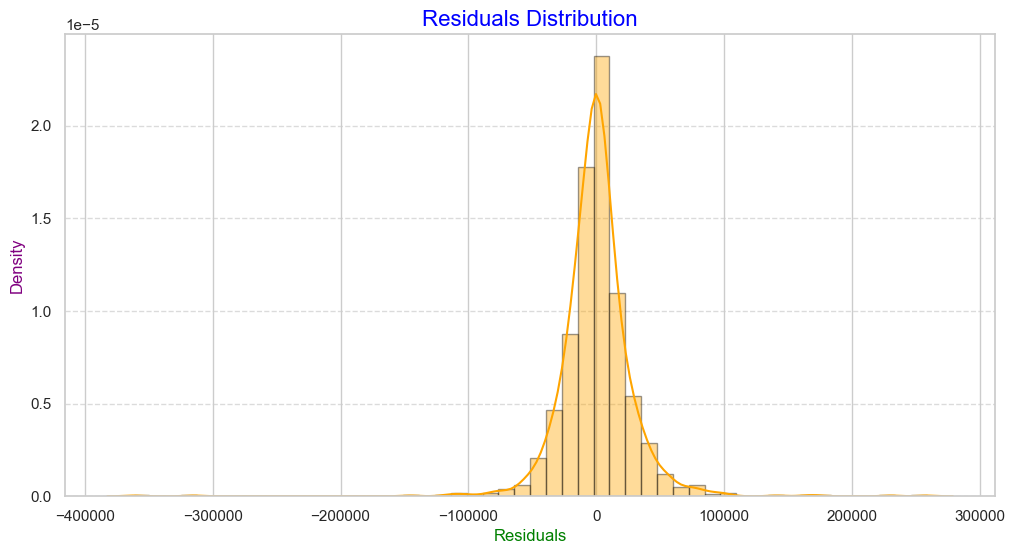

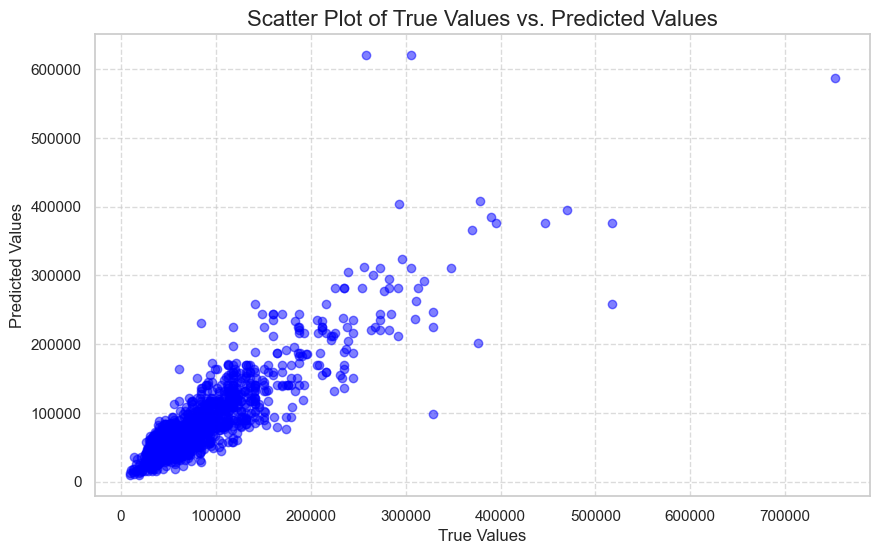

In [296]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [297]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

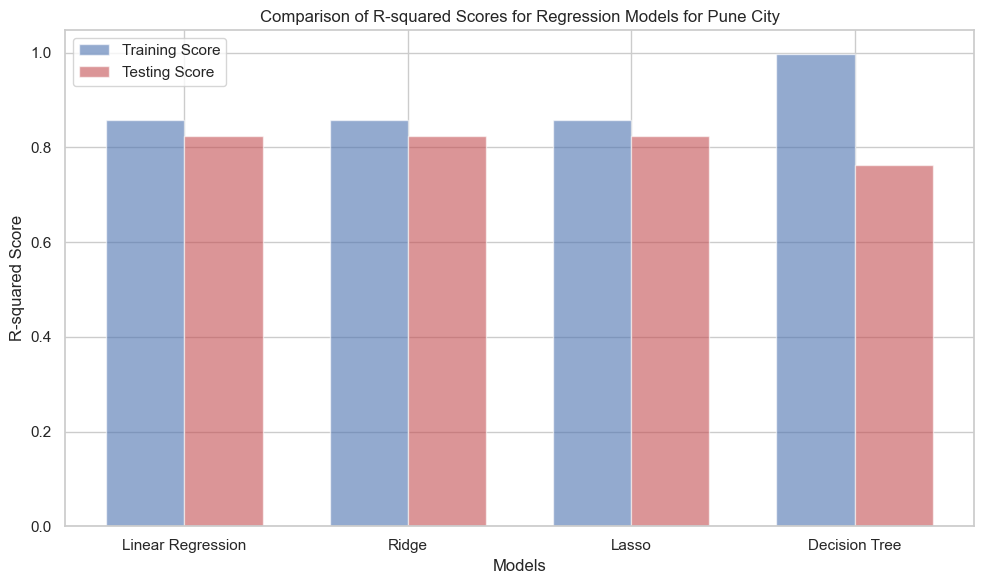

In [298]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Pune City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

## Model for Cairo

In [269]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Cairo's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(cairo_data.Location)
dummies.head(3)

2/2, Al Andalus District, New Cairo City, Cairo  \
0                                             True   
1                                             True   
2                                             True   

   2nd Neighborhood, 8th Area, Shorouk City, Cairo  \
0                                            False   
1                                            False   
2                                            False   

   2nd Sector, Zahraa El Maadi, Hay El Maadi, Cairo  \
0                                             False   
1                                             False   
2                                             False   

   6th Area East, Shorouk City, Cairo  \
0                               False   
1                               False   
2                               False   

   7th Sector, Zahraa El Maadi, Hay El Maadi, Cairo  \
0                                             False   
1                                             False   
2                                             False   

   90 Avenue, South Investors Area, New Cairo City, Cairo  \
0                                              False        
1                                              False        
2                                              False        

   Abbas Al Akkad St., 1st Zone, Nasr City, Cairo  \
0                                           False   
1                                           False   
2                                           False   

   Abd Al Aziz Aal Seoud St., El Manial, Hay El Manial, Cairo  \
0                                              False            
1                                              False            
2                                              False            

   Abou Al Feda St., Zamalek, Cairo  \
0                             False   
1                             False   
2                             False   

   Abou Dawoud Al Zahery St., 6th Zone, Nasr City, Cairo  ...  \
0                                              False      ...   
1                                              False      ...   
2                                              False      ...   

   Villette, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                               
1                                              False                               
2                                              False                               

   Vinci, New Capital Compounds, New Capital City, Cairo  \
0                                              False       
1                                              False       
2                                              False       

   West Arabella, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                                    
1                                              False                                    
2                                              False                                    

   West Golf Extension, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                                
1                                              False                                
2                                              False                                

   West Golf, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                      
1                                              False                      
2                                              False                      

   Yaru new capital Compound, New Capital Compounds, New Capital City, Cairo  \
0                                              False                           
1                                              False                           
2       

In [270]:
dummies2 = pd.get_dummies(cairo_data.City)
dummies2.head(3)

Cairo
0   True
1   True
2   True

In [271]:
# Concatenating the original cairo_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'
cairo_data = pd.concat([cairo_data,dummies,dummies2],axis='columns')
cairo_data.head(3)

City                                         Location  Area_sqft  \
0  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  2045.1410   
1  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  1776.0435   
2  Cairo  2/2, Al Andalus District, New Cairo City, Cairo  1776.0435   

   Bathrooms  Local_price  Bedrooms  Price_GBP  \
0          3      1501000         3    25517.0   
1          3      1287000         3    21879.0   
2          3      1287000         3    21879.0   

   2/2, Al Andalus District, New Cairo City, Cairo  \
0                                             True   
1                                             True   
2                                             True   

   2nd Neighborhood, 8th Area, Shorouk City, Cairo  \
0                                            False   
1                                            False   
2                                            False   

   2nd Sector, Zahraa El Maadi, Hay El Maadi, Cairo  ...  \
0                                             False  ...   
1                                             False  ...   
2                                             False  ...   

   Vinci, New Capital Compounds, New Capital City, Cairo  \
0                                              False       
1                                              False       
2                                              False       

   West Arabella, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                                    
1                                              False                                    
2                                              False                                    

   West Golf Extension, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                                
1                                              False                                
2                                              False                                

   West Golf, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                      
1                                              False                      
2                                              False                      

   Yaru new capital Compound, New Capital Compounds, New Capital City, Cairo  \
0                                              False                           
1                                              False                           
2                                              False                           

   Zahraa El Maadi, Hay El Maadi, Cairo  \
0                                 False   
1                                 False   
2                                 False   

   Zed East, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                               
1                                              False                               
2                                              False                               

   Zizinia Al Mostakbal, Mostakbal City Compounds, Mostakbal City - Future City, Cairo  \
0                                              False                                     
1                                              False                                     
2                                              False                                     

   Zizinia St., South Investors Area, New Cairo City, Cairo  Cairo  
0                                              False          True  
1                                              False          True  
2                                              False          True  

[3 rows x 292 columns]

In [272]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
cairo_data = cairo_data.drop(['Location','City'],axis='columns')

cairo_data.head(2)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  \
0  2045.1410          3      1501000         3    25517.0   
1  1776.0435          3      1287000         3    21879.0   

   2/2, Al Andalus District, New Cairo City, Cairo  \
0                                             True   
1                                             True   

   2nd Neighborhood, 8th Area, Shorouk City, Cairo  \
0                                            False   
1                                            False   

   2nd Sector, Zahraa El Maadi, Hay El Maadi, Cairo  \
0                                             False   
1                                             False   

   6th Area East, Shorouk City, Cairo  \
0                               False   
1                               False   

   7th Sector, Zahraa El Maadi, Hay El Maadi, Cairo  ...  \
0                                             False  ...   
1                                             False  ...   

   Vinci, New Capital Compounds, New Capital City, Cairo  \
0                                              False       
1                                              False       

   West Arabella, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                                    
1                                              False                                    

   West Golf Extension, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                                
1                                              False                                

   West Golf, El Katameya Compounds, El Katameya, New Cairo City, Cairo  \
0                                              False                      
1                                              False                      

   Yaru new capital Compound, New Capital Compounds, New Capital City, Cairo  \
0                                              False                           
1                                              False                           

   Zahraa El Maadi, Hay El Maadi, Cairo  \
0                                 False   
1                                 False   

   Zed East, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo  \
0                                              False                               
1                                              False                               

   Zizinia Al Mostakbal, Mostakbal City Compounds, Mostakbal City - Future City, Cairo  \
0                                              False                                     
1                                              False                                     

   Zizinia St., South Investors Area, New Cairo City, Cairo  Cairo  
0                                              False          True  
1                                              False          True  

[2 rows x 290 columns]

In [273]:
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
from sklearn.model_selection import train_test_split
X = cairo_data.drop(['Local_price','Price_GBP'],axis='columns')
X.isna().sum()

Area_sqft                                                                              0
Bathrooms                                                                              0
Bedrooms                                                                               0
2/2, Al Andalus District, New Cairo City, Cairo                                        0
2nd Neighborhood, 8th Area, Shorouk City, Cairo                                        0
                                                                                      ..
Zahraa El Maadi, Hay El Maadi, Cairo                                                   0
Zed East, 5th Settlement Compounds, The 5th Settlement, New Cairo City, Cairo          0
Zizinia Al Mostakbal, Mostakbal City Compounds, Mostakbal City - Future City, Cairo    0
Zizinia St., South Investors Area, New Cairo City, Cairo                               0
Cairo                                                                                  0
Length: 288, dtype: i

In [274]:
# To predict the price in GBP, using Price_GBP as a Target variable.

y = cairo_data.Price_GBP
y.head()

0    25517.0
1    21879.0
2    21879.0
3    25840.0
4    31280.0
Name: Price_GBP, dtype: float64

In [275]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_cairo = X
y_cairo = y

In [259]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [260]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 88.5% for Cairo Dataset.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.885527021367339

In [271]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""


evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [272]:
# Evaluating a Linear Regression on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.8946559919295164
Testing score : 0.885527021367339


Training score : 0.8918816161280256
Testing score : 0.8874581116426435


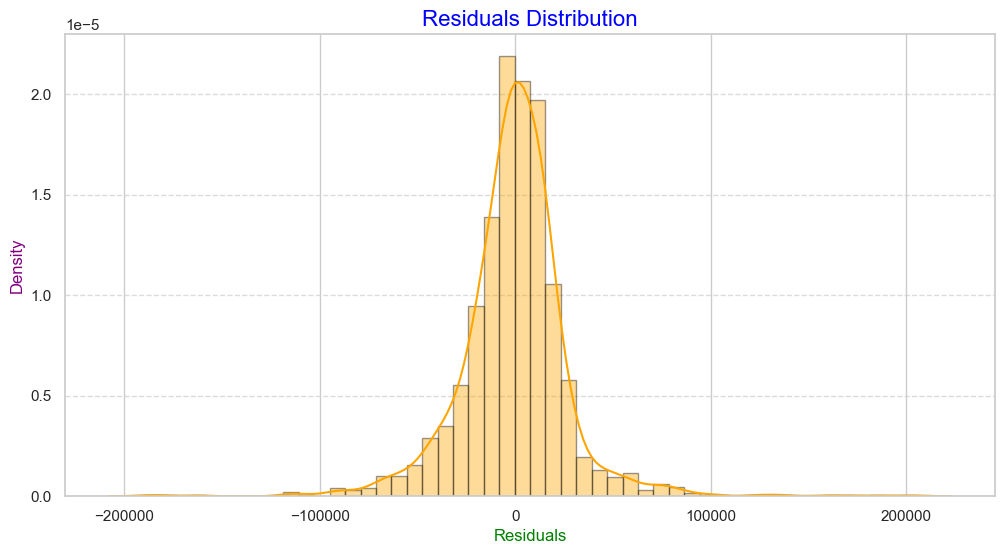

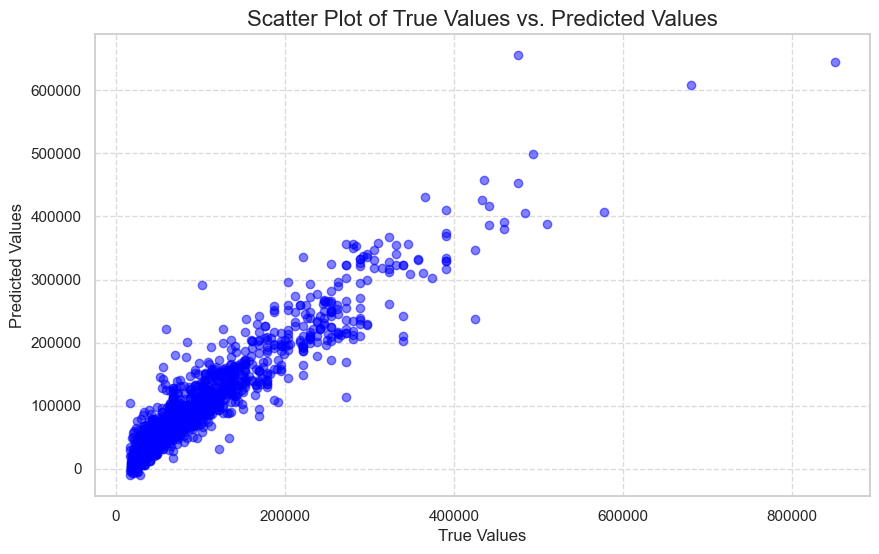

In [273]:
from sklearn.linear_model import Ridge
# Evaluating a Ridge model on the training and test data
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.8946095754555491
Testing score : 0.8859420400107376


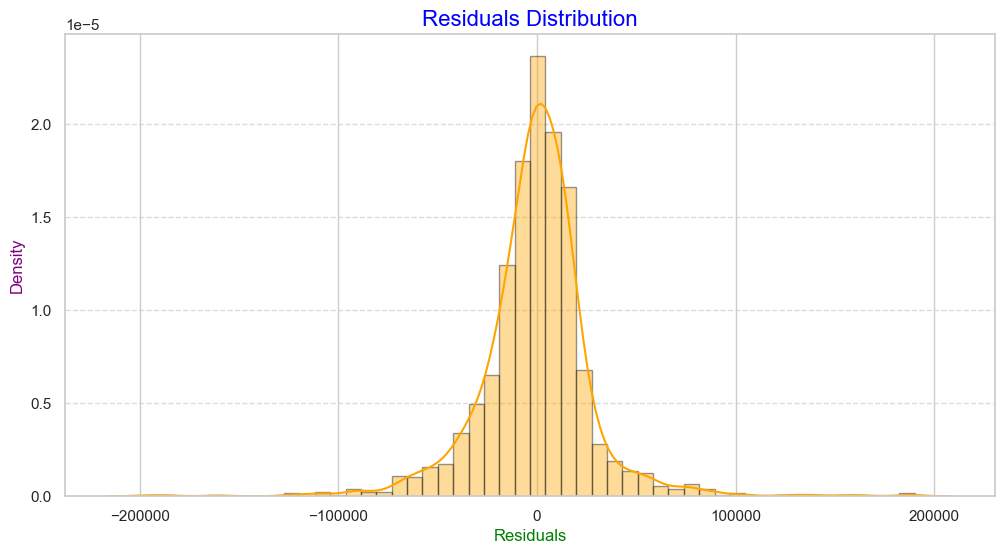

In [274]:
from sklearn.linear_model import Lasso
# Evaluating a Lasso model on the training and test data
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9913347841572603
Testing score : 0.8535644193783701


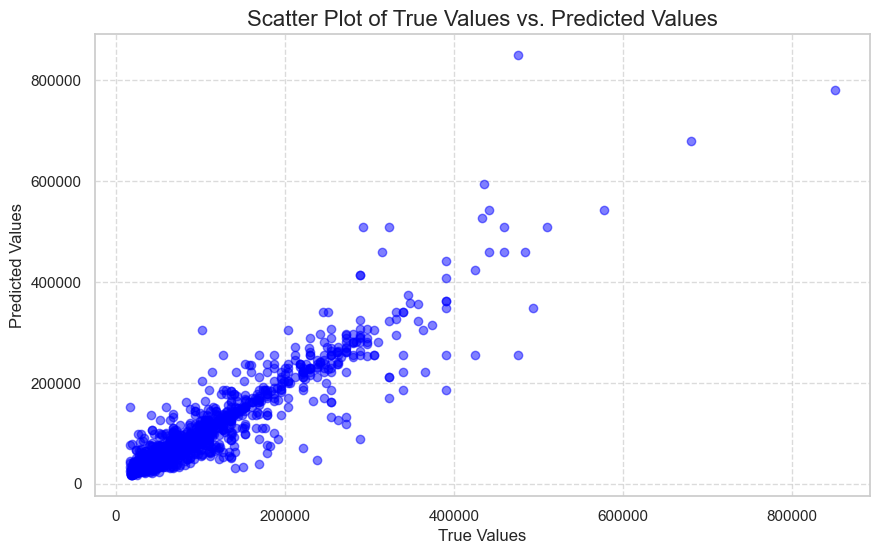

In [275]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [550]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

In [562]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)
gboost_train_score, gboost_test_score = evaluate_model_regression(GradientBoostingRegressor(), 'Gradient Boosting', X_train, y_train, X_test, y_test)
rf_train_score, rf_test_score = evaluate_model_regression(RandomForestRegressor(), 'Random Forest', X_train, y_train, X_test, y_test)
svr_train_score, svr_test_score = evaluate_model_regression(SVR(), 'SVR', X_train, y_train, X_test, y_test)

# Assuming evaluation_results is a list of dictionaries containing model names and their scores
evaluation_results = [
    {"Model": "Linear Regression", "Testing Score": linear_test_score},
    {"Model": "Ridge", "Testing Score": ridge_test_score},
    {"Model": "Lasso", "Testing Score": lasso_test_score},
    {"Model": "Decision Tree", "Testing Score": tree_test_score},
    {"Model": "Gradient Boosting", "Testing Score": gboost_test_score},
    {"Model": "Random Forest", "Testing Score": rf_test_score},
    {"Model": "SVR", "Testing Score": svr_test_score}
]

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(12, 6))
bar_width = 0.6
index = range(len(models))

plt.bar(index, testing_scores, bar_width, label='Testing Score', color='skyblue', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Cairo City')
plt.xticks(index, models)
plt.legend()

plt.tight_layout()
plt.show()


In [560]:
evaluation_results

[{'Model': 'Linear Regression', 'Testing Score': 0.885527021367339},
 {'Model': 'Ridge', 'Testing Score': 0.8874581116426435},
 {'Model': 'Lasso', 'Testing Score': 0.8859420400107376},
 {'Model': 'Decision Tree', 'Testing Score': 0.8543974111282142},
 {'Model': 'Gradient Boosting', 'Testing Score': 0.8688795178286924},
 {'Model': 'Random Forest', 'Testing Score': 0.9109649549573855},
 {'Model': 'SVR', 'Testing Score': -0.10403926187908552}]

In [264]:
# From the above output it is clear that Random Forest is giving highest accuracy, So it is the best model for Cairo Dataset.
# So due to this reason I have created a pickle file for Random Forest Regressor for Cairo Dataset.
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [263]:
# Save the best model as a pickle file
with open('../server/artifacts/cairo/model.pickle', 'wb') as f:
    pickle.dump(rf, f)


In [324]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("../server/artifacts/cairo/columns.json","w") as f:
#     f.write(json.dumps(columns))

## Model for Bangkok

In [276]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Bangkok's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(bangkok_data.Location)
dummies.head(3)

Ari  Ekkamai  Ladprao  Phrom Phong  Ratchada  Sathorn   Siam  Silom  \
0  False    False    False        False     False    False  False  False   
1  False    False     True        False     False    False  False  False   
2  False    False    False        False     False    False   True  False   

   Sukhumvit  Thonglor  
0       True     False  
1      False     False  
2      False     False

In [277]:
dummies2 = pd.get_dummies(bangkok_data.City)
dummies2.head(3)

Bangkok
0     True
1     True
2     True

In [278]:
# Concatenating the original bangkok_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'

bangkok_data = pd.concat([bangkok_data,dummies,dummies2],axis='columns')
bangkok_data.head(3)

City   Location  Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  \
0  Bangkok  Sukhumvit        700          1      2000000         1    42000.0   
1  Bangkok    Ladprao       1500          2      5000000         3   105000.0   
2  Bangkok       Siam        900          1      3500000         2    73500.0   

     Ari  Ekkamai  Ladprao  Phrom Phong  Ratchada  Sathorn   Siam  Silom  \
0  False    False    False        False     False    False  False  False   
1  False    False     True        False     False    False  False  False   
2  False    False    False        False     False    False   True  False   

   Sukhumvit  Thonglor  Bangkok  
0       True     False     True  
1      False     False     True  
2      False     False     True

In [279]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).

bangkok_data = bangkok_data.drop(['Location','City'],axis='columns')
bangkok_data.head(2)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP    Ari  Ekkamai  \
0        700          1      2000000         1    42000.0  False    False   
1       1500          2      5000000         3   105000.0  False    False   

   Ladprao  Phrom Phong  Ratchada  Sathorn   Siam  Silom  Sukhumvit  Thonglor  \
0    False        False     False    False  False  False       True     False   
1     True        False     False    False  False  False      False     False   

   Bangkok  
0     True  
1     True

In [280]:
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
# And checking null values as well.
X = bangkok_data.drop(['Local_price','Price_GBP'],axis='columns')
X.isna().sum()

Area_sqft      0
Bathrooms      0
Bedrooms       0
Ari            0
Ekkamai        0
Ladprao        0
Phrom Phong    0
Ratchada       0
Sathorn        0
Siam           0
Silom          0
Sukhumvit      0
Thonglor       0
Bangkok        0
dtype: int64

In [281]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = bangkok_data.Price_GBP
y.head()

0     42000.0
1    105000.0
2     73500.0
3     94500.0
4    168000.0
Name: Price_GBP, dtype: float64

In [282]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_bangkok = X
y_bangkok = y

In [292]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [293]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 98.5% for Bangkok Dataset.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9854485893655703

In [333]:
# Calling the function 'find_best_model_using_gridsearchcv' using X,y and algos as a 
# parameter and storing the resultant dataframe in result_df variable

result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.987885   
1              lasso    0.987888   
2      decision_tree    0.996913   
3      random_forest    0.995817   
4  gradient_boosting    0.995664   
5                svr    0.815554   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  
3  {'criterion': 'absolute_error', 'n_estimators'...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

In [334]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

DecisionTreeRegressor()

In [335]:
# Using pickle to export the best model, Decision Tree in this case.

with open('../server/artifacts/bangkok/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [336]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""

evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.9886933102567398
Testing score : 0.9854485893655703


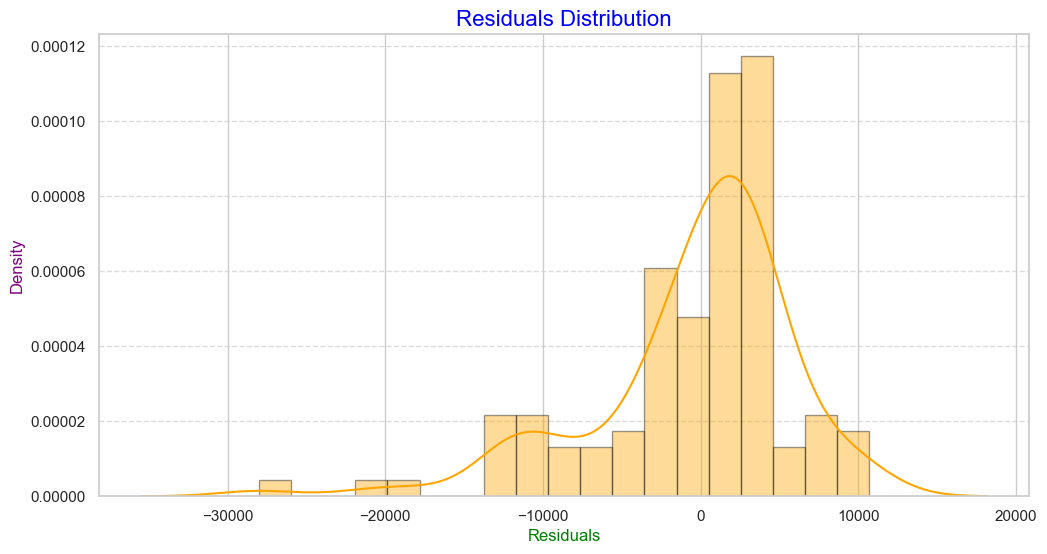

In [337]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.9886839430735932
Testing score : 0.9854378346991625


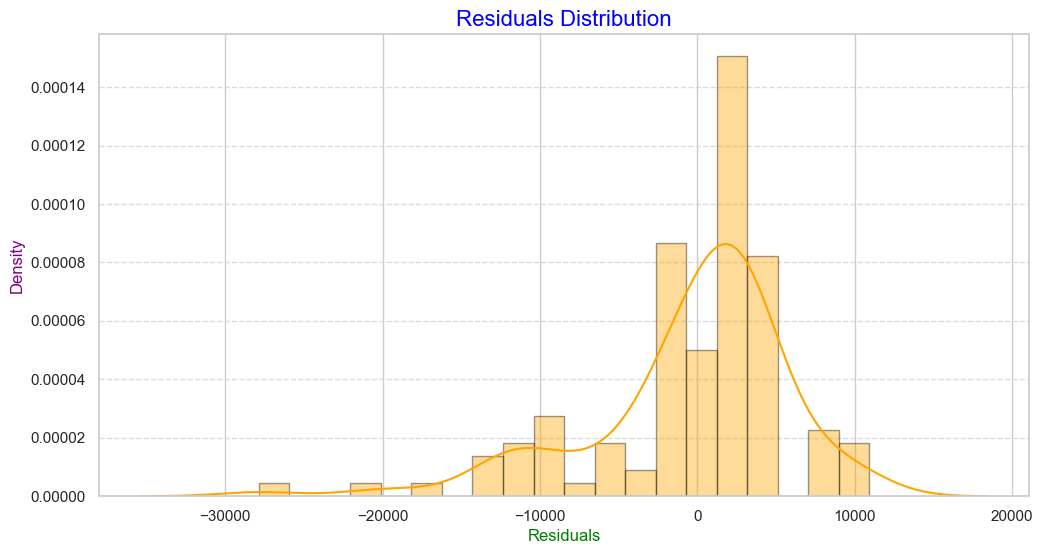

In [338]:
from sklearn.linear_model import Ridge
# Evaluating a Ridge model on the training and test data
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.9886932664743114
Testing score : 0.9854493966950797


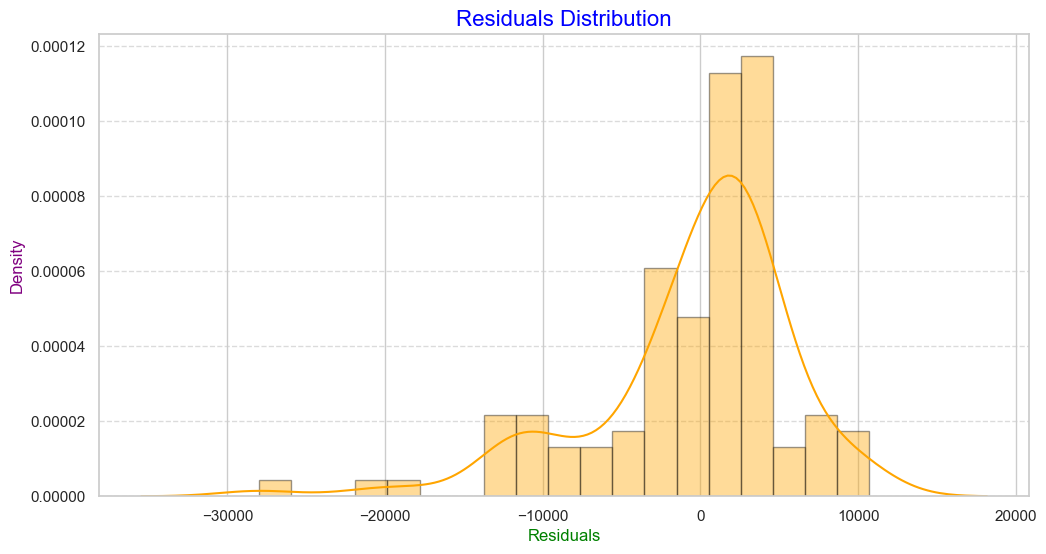

In [339]:
from sklearn.linear_model import Lasso
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.99996968132913
Testing score : 0.9907950268275556


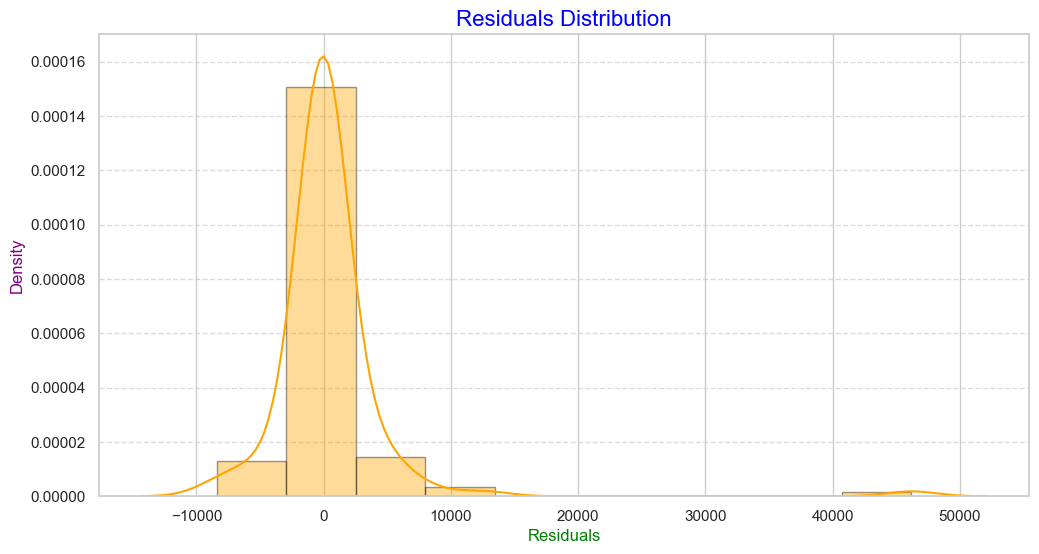

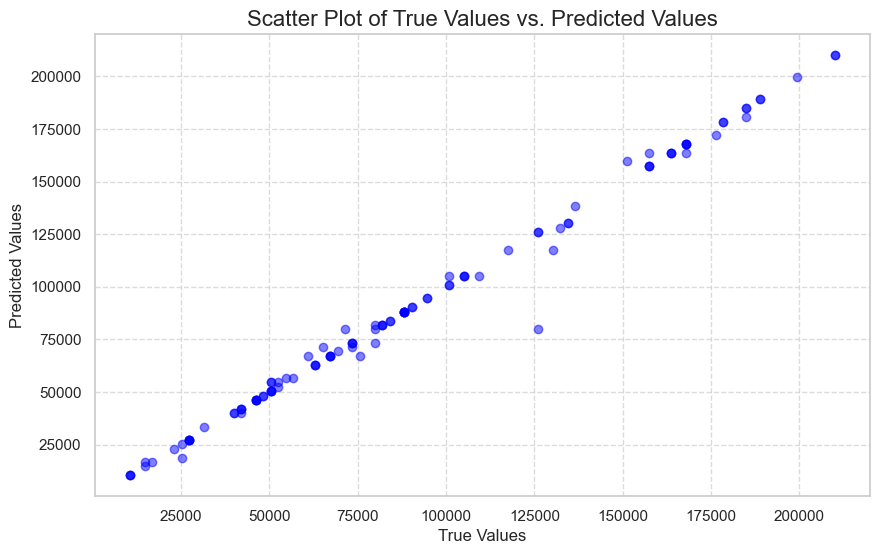

In [340]:
# Evaluating a Decision Tree Regressor model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [341]:
evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

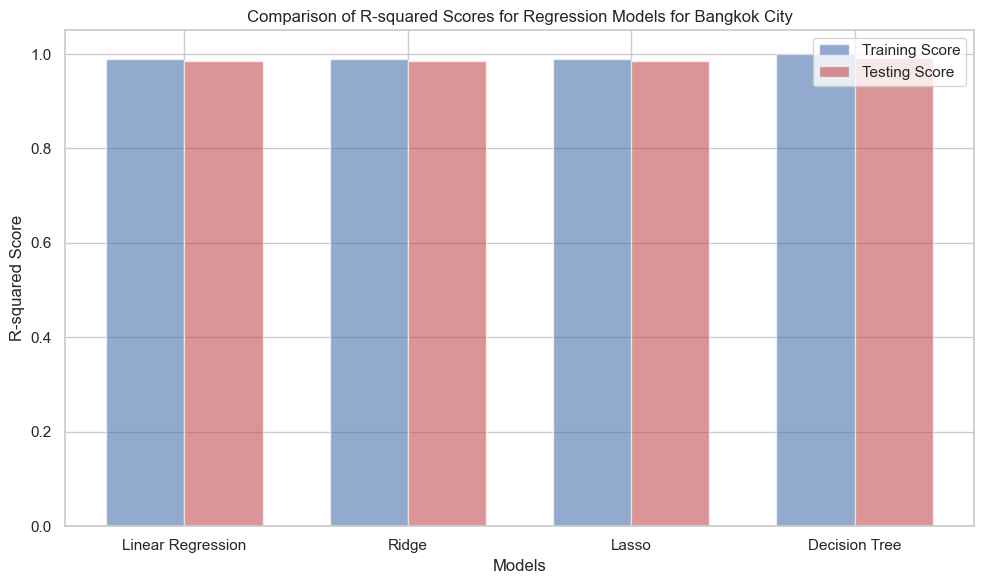

In [342]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Bangkok City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [346]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/bangkok/columns.json","w") as f:
    f.write(json.dumps(columns))

## Model for London

In [283]:
# Encoding the categoric variable Location to be used for regression
dummies = pd.get_dummies(london_data.Location)

In [284]:
# Encoding the categoric variable City to be used for regression
dummies2 = pd.get_dummies(london_data.City)

In [285]:
# Joining the encoded 'Location' and 'City' column to the original dataframe
london_data = pd.concat([london_data,dummies,dummies2],axis = 'columns')
london_data.head()

City       Location  Area_sqft  Bathrooms  Bedrooms  Price_GBP  \
0  London  101 Wood Lane        590          1         1     785000   
1  London  101 Wood Lane        579          1         1     740000   
2  London  101 Wood Lane        580          1         1     750000   
3  London  101 Wood Lane        861          2         2    1160000   
4  London  101 Wood Lane        579          1         1     750000   

   101 Wood Lane  63 Mortlake High Street  82-88 Fulham High Street  Barnes  \
0           True                    False                     False   False   
1           True                    False                     False   False   
2           True                    False                     False   False   
3           True                    False                     False   False   
4           True                    False                     False   False   

   ...  Thames Ditton  Walton-on-Thames  Wandsworth  Water Lane  Westminster  \
0  ...          False             False       False       False        False   
1  ...          False             False       False       False        False   
2  ...          False             False       False       False        False   
3  ...          False             False       False       False        False   
4  ...          False             False       False       False        False   

   Wimbledon  Woodford Green    nan  other  London  
0      False           False  False  False    True  
1      False           False  False  False    True  
2      False           False  False  False    True  
3      False           False  False  False    True  
4      False           False  False  False    True  

[5 rows x 72 columns]

In [286]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).

london_data = london_data.drop(['Location','City'], axis ='columns')
london_data.head()

Area_sqft  Bathrooms  Bedrooms  Price_GBP  101 Wood Lane  \
0        590          1         1     785000           True   
1        579          1         1     740000           True   
2        580          1         1     750000           True   
3        861          2         2    1160000           True   
4        579          1         1     750000           True   

   63 Mortlake High Street  82-88 Fulham High Street  Barnes  Battersea  \
0                    False                     False   False      False   
1                    False                     False   False      False   
2                    False                     False   False      False   
3                    False                     False   False      False   
4                    False                     False   False      False   

   Belgravia  ...  Thames Ditton  Walton-on-Thames  Wandsworth  Water Lane  \
0      False  ...          False             False       False       False   
1      False  ...          False             False       False       False   
2      False  ...          False             False       False       False   
3      False  ...          False             False       False       False   
4      False  ...          False             False       False       False   

   Westminster  Wimbledon  Woodford Green    nan  other  London  
0        False      False           False  False  False    True  
1        False      False           False  False  False    True  
2        False      False           False  False  False    True  
3        False      False           False  False  False    True  
4        False      False           False  False  False    True  

[5 rows x 70 columns]

In [287]:
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = london_data.drop(['Price_GBP'], axis='columns')
X.head()

Area_sqft  Bathrooms  Bedrooms  101 Wood Lane  63 Mortlake High Street  \
0        590          1         1           True                    False   
1        579          1         1           True                    False   
2        580          1         1           True                    False   
3        861          2         2           True                    False   
4        579          1         1           True                    False   

   82-88 Fulham High Street  Barnes  Battersea  Belgravia  Belsize Park  ...  \
0                     False   False      False      False         False  ...   
1                     False   False      False      False         False  ...   
2                     False   False      False      False         False  ...   
3                     False   False      False      False         False  ...   
4                     False   False      False      False         False  ...   

   Thames Ditton  Walton-on-Thames  Wandsworth  Water Lane  Westminster  \
0          False             False       False       False        False   
1          False             False       False       False        False   
2          False             False       False       False        False   
3          False             False       False       False        False   
4          False             False       False       False        False   

   Wimbledon  Woodford Green    nan  other  London  
0      False           False  False  False    True  
1      False           False  False  False    True  
2      False           False  False  False    True  
3      False           False  False  False    True  
4      False           False  False  False    True  

[5 rows x 69 columns]

In [288]:
# Creating y data made up of the property prices needed to be predicted
y = london_data.Price_GBP
y.head()

0     785000
1     740000
2     750000
3    1160000
4     750000
Name: Price_GBP, dtype: int64

In [289]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_london = X
y_london= y

In [572]:
# Creating a testing and training datatset for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [573]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 75.7% for London Dataset.

# Testing the models accuracy 
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7576782416486558

In [355]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable

result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.766395   
1              lasso    0.766395   
2      decision_tree    0.553138   
3      random_forest    0.729776   
4  gradient_boosting    0.787324   
5                svr    0.553295   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'absolute_error', 'splitter': 'b...  
3  {'criterion': 'squared_error', 'n_estimators':...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

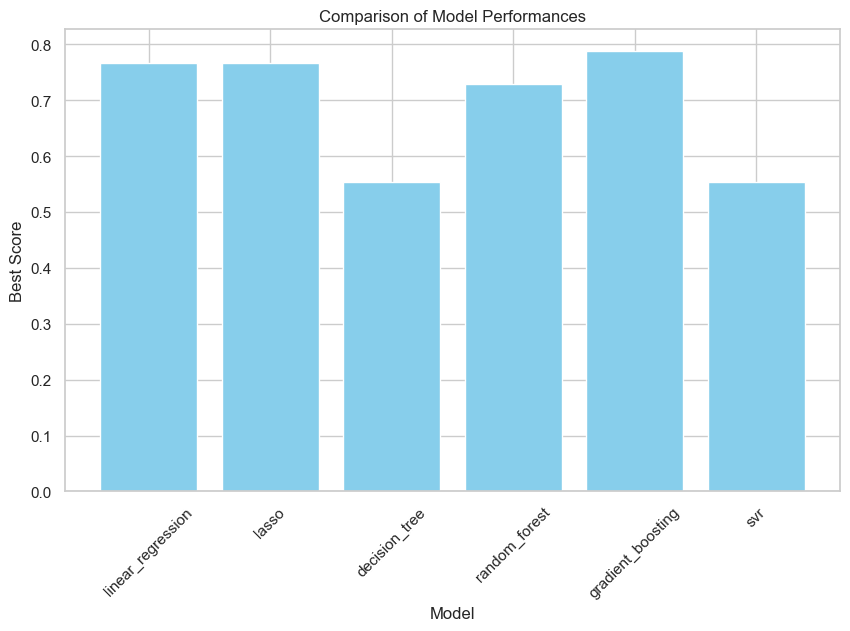

GradientBoostingRegressor()

In [356]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

In [357]:
# Using pickle to export the best model

with open('../server/artifacts/london/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [358]:
# Carrying out cross validation to measure the accuracy of the model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

# Negative values can be ignored and positive values lie between 69.5% and 80.9% acccuracy

array([0.68808722, 0.77108292, 0.84001492, 0.82158118, 0.87183351])

In [574]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""

evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Training score : 0.829157643933053
Testing score : 0.7576782416486558


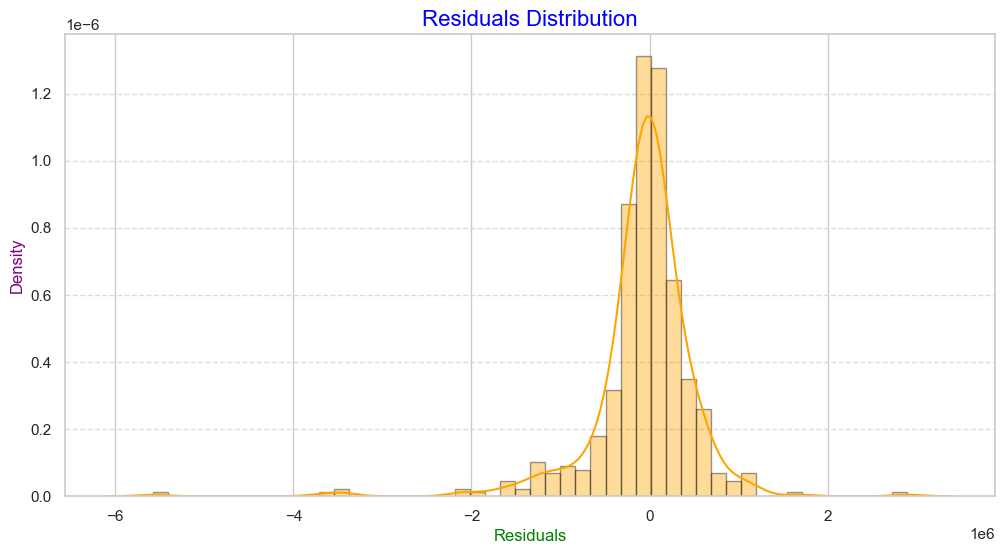

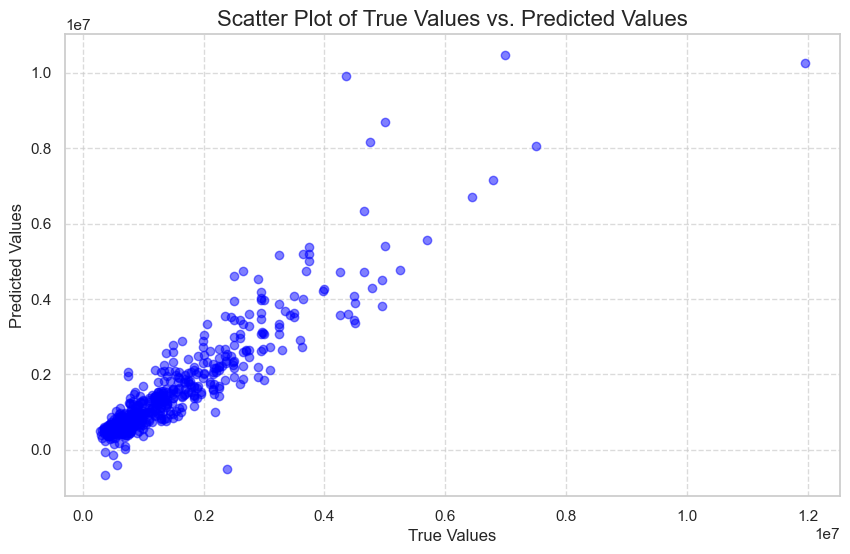

In [575]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)


Training score : 0.8270149060729451
Testing score : 0.7718233514206344


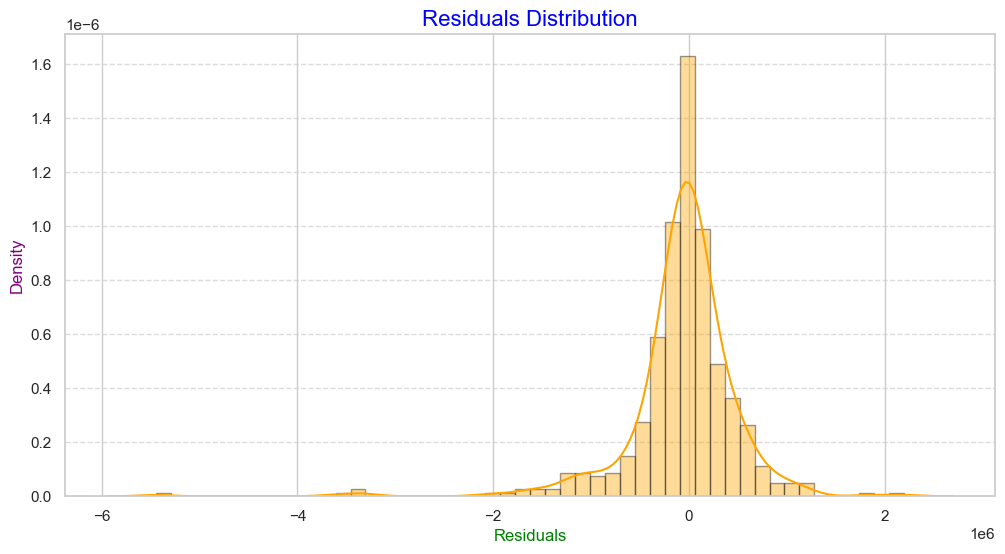

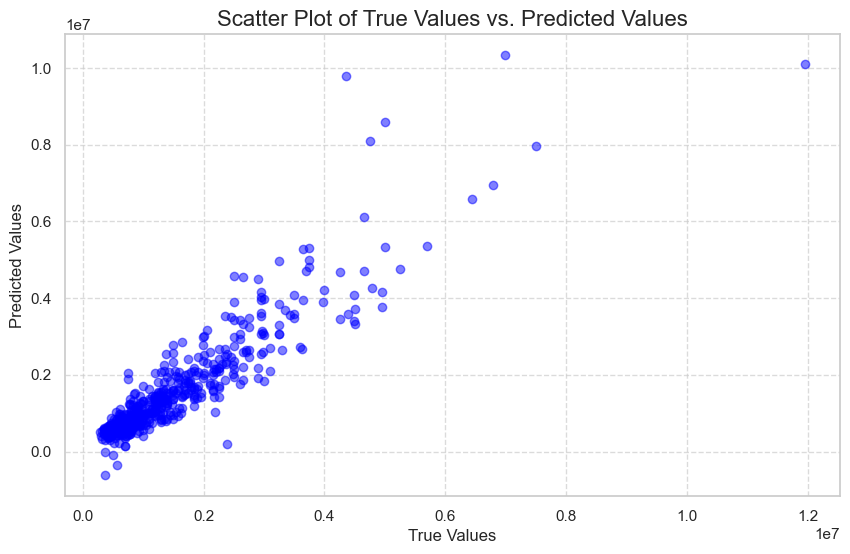

In [576]:
from sklearn.linear_model import Ridge
# Evaluating a Ridge model on the training and test data
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.8291576384833229
Testing score : 0.7576820333307702


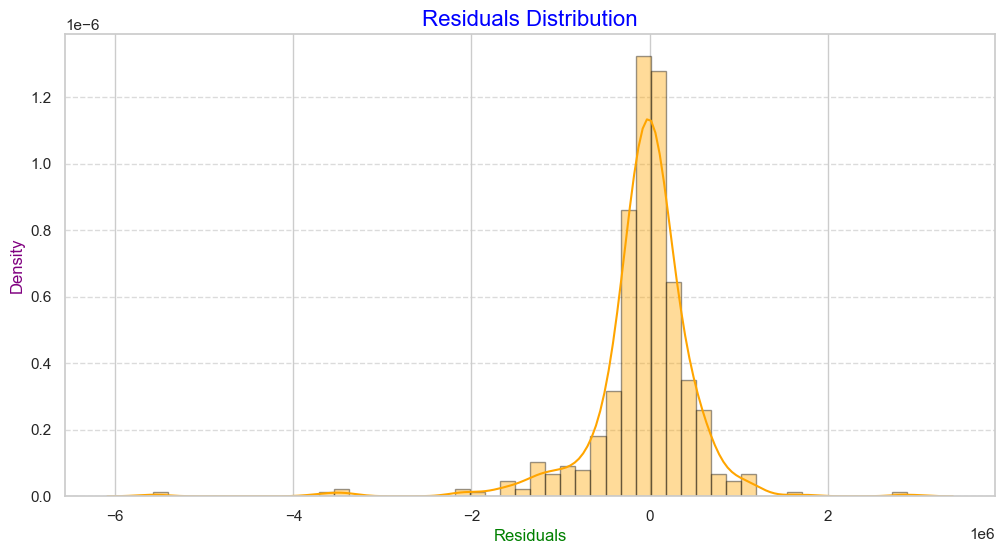

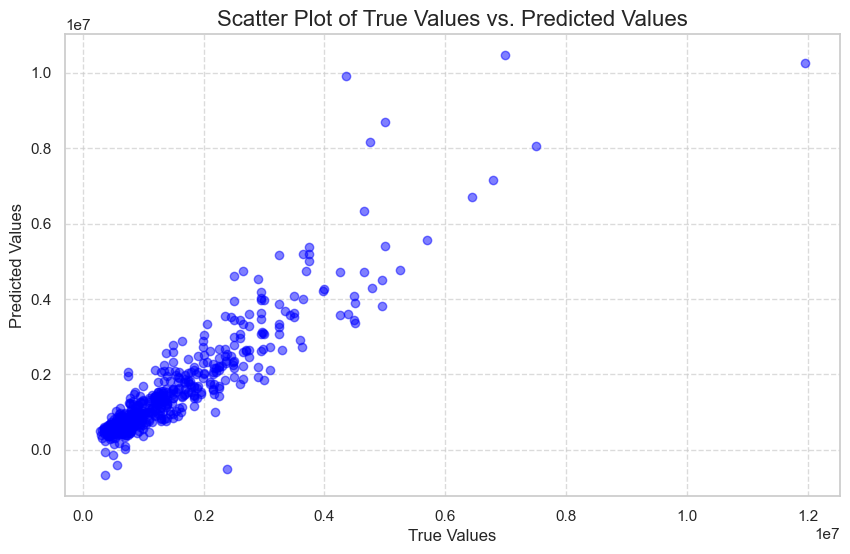

In [577]:
from sklearn.linear_model import Lasso
# Evaluating a Lasso model on the training and test data
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9988625644870075
Testing score : -0.29553247051563636


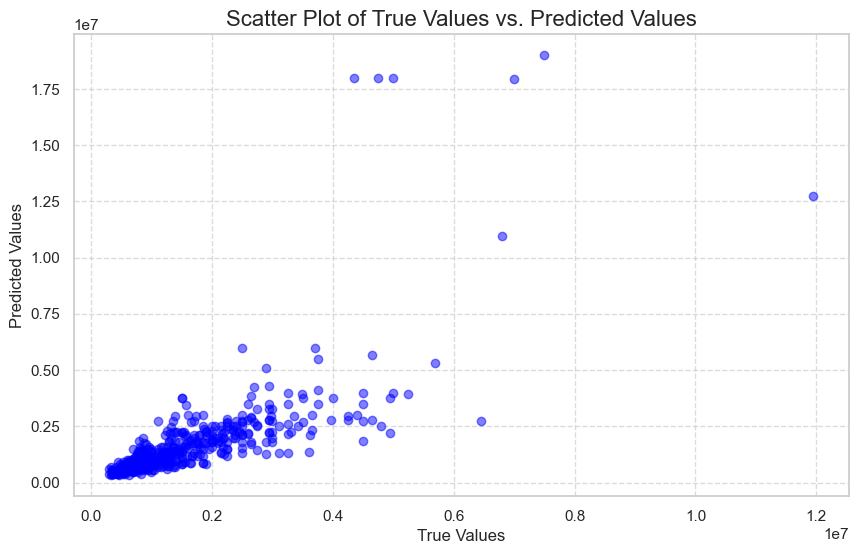

In [578]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [361]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

In [362]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for London City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [365]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/london/columns.json","w") as f:
    f.write(json.dumps(columns))

## Model for Perth 

In [290]:
perth_data.head()

City    Location  Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  Perth  South Lake  1722.2240          2       565000         4   293800.0
1  Perth       Wandi  1496.1821          2       365000         3   189800.0
2  Perth     Camillo   925.6954          1       287000         3   149240.0
3  Perth    Bellevue   635.0701          1       255000         2   132600.0
4  Perth   Lockridge  1410.0709          1       325000         4   169000.0

In [291]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Perth's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(perth_data.Location)
dummies.head(3)

Alexander Heights  Alfred Cove  Alkimos  Anketell  Applecross  Ardross  \
0              False        False    False     False       False    False   
1              False        False    False     False       False    False   
2              False        False    False     False       False    False   

   Armadale  Ascot  Ashby  Ashfield  ...  Wilson  Winthrop  Woodbridge  \
0     False  False  False     False  ...   False     False       False   
1     False  False  False     False  ...   False     False       False   
2     False  False  False     False  ...   False     False       False   

   Woodlands  Woodvale  Wooroloo  Wungong  Yanchep  Yangebup  Yokine  
0      False     False     False    False    False     False   False  
1      False     False     False    False    False     False   False  
2      False     False     False    False    False     False   False  

[3 rows x 321 columns]

In [292]:
dummies2 = pd.get_dummies(perth_data.City)
dummies2.head(3)

Perth
0   True
1   True
2   True

In [293]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
perth_data = perth_data.drop(['Location','City'], axis ='columns')
perth_data.head()

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  1722.2240          2       565000         4   293800.0
1  1496.1821          2       365000         3   189800.0
2   925.6954          1       287000         3   149240.0
3   635.0701          1       255000         2   132600.0
4  1410.0709          1       325000         4   169000.0

In [294]:
# Concatenating the original perth_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'
perth_data = pd.concat([perth_data,dummies,dummies2],axis='columns')
perth_data.head(3)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  Alexander Heights  \
0  1722.2240          2       565000         4   293800.0              False   
1  1496.1821          2       365000         3   189800.0              False   
2   925.6954          1       287000         3   149240.0              False   

   Alfred Cove  Alkimos  Anketell  Applecross  ...  Winthrop  Woodbridge  \
0        False    False     False       False  ...     False       False   
1        False    False     False       False  ...     False       False   
2        False    False     False       False  ...     False       False   

   Woodlands  Woodvale  Wooroloo  Wungong  Yanchep  Yangebup  Yokine  Perth  
0      False     False     False    False    False     False   False   True  
1      False     False     False    False    False     False   False   True  
2      False     False     False    False    False     False   False   True  

[3 rows x 327 columns]

In [295]:
from sklearn.model_selection import train_test_split
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = perth_data.drop(['Local_price','Price_GBP'],axis='columns')
# Checking null values
X.isna().sum()

Area_sqft            0
Bathrooms            0
Bedrooms             0
Alexander Heights    0
Alfred Cove          0
                    ..
Wungong              0
Yanchep              0
Yangebup             0
Yokine               0
Perth                0
Length: 325, dtype: int64

In [296]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = perth_data.Price_GBP
y.head()

0    293800.0
1    189800.0
2    149240.0
3    132600.0
4    169000.0
Name: Price_GBP, dtype: float64

In [297]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_perth = X
y_perth = y

In [298]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [557]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 75.8% for Perth Dataset.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7589700768890423

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define algos globally
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'n_jobs': [None, -1]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1],
            'selection': ['random']
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear'],
            'C': [1]
        }
    }
    }

def find_best_model_using_gridsearchcv(X, y, algos):
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score                          best_params
0  linear_regression    0.741312                     {'n_jobs': None}
1              lasso    0.741366  {'alpha': 1, 'selection': 'random'}
2                svr    0.249942         {'C': 1, 'kernel': 'linear'}

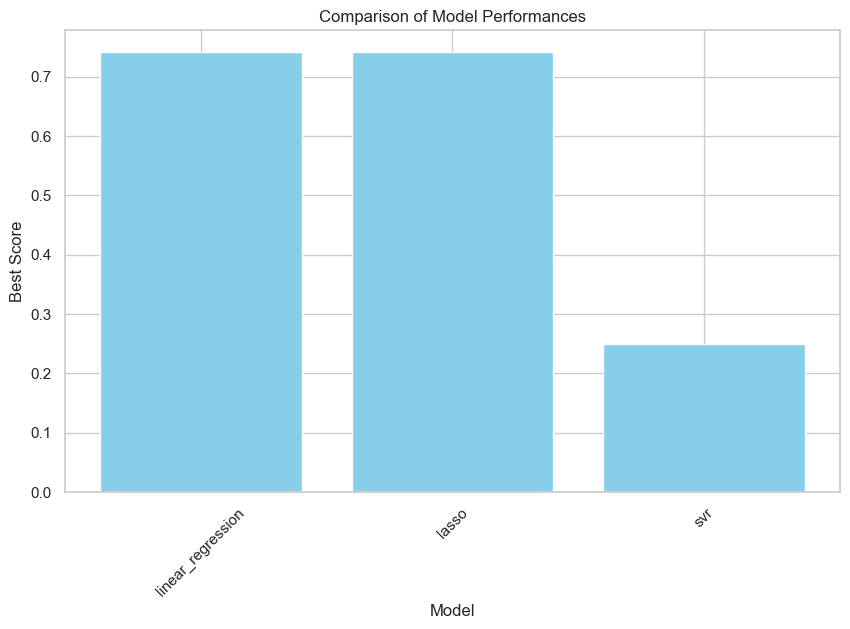

Lasso(alpha=1, selection='random')

In [289]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

In [290]:
import pickle
# Using pickle to export the save model
with open('../server/artifacts/perth/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [558]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.75654616, 0.73178568, 0.7356054 , 0.73350949, 0.7614957 ])

In [559]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""

evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.7523944273748863
Testing score : 0.7589700768890423


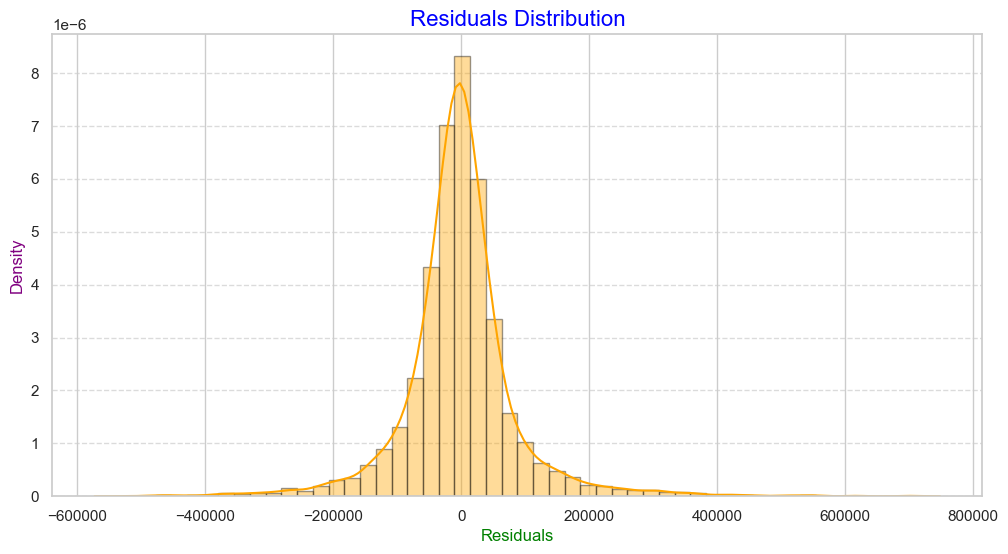

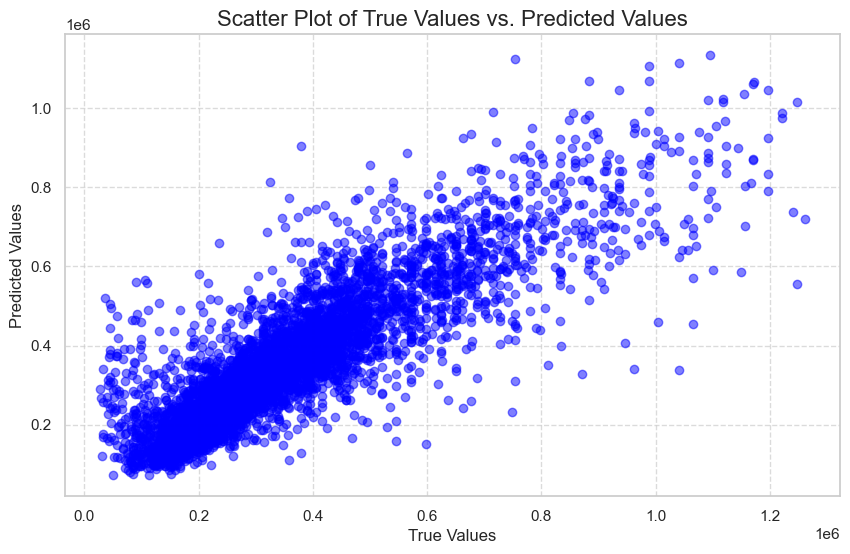

In [560]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.7522779045209304
Testing score : 0.7590720950788575


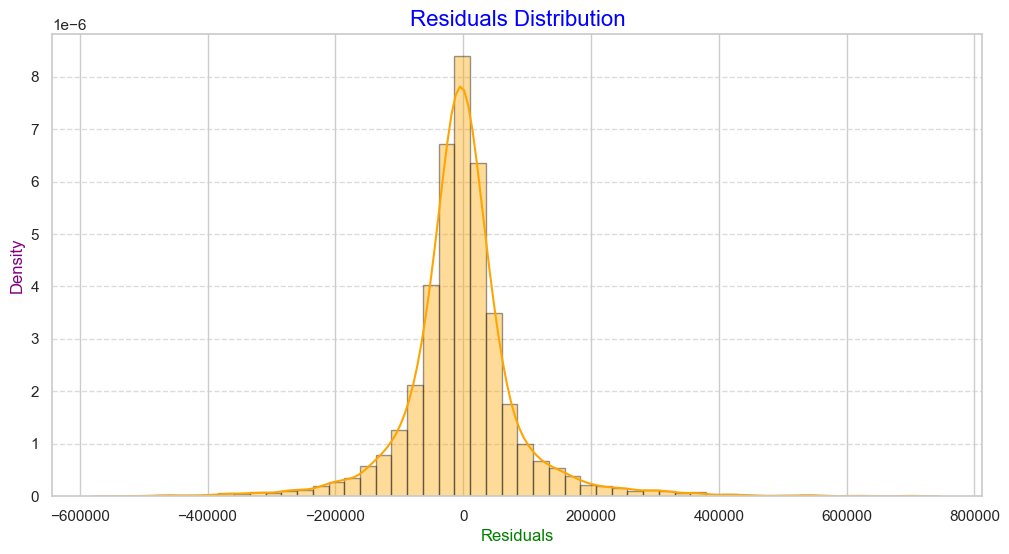

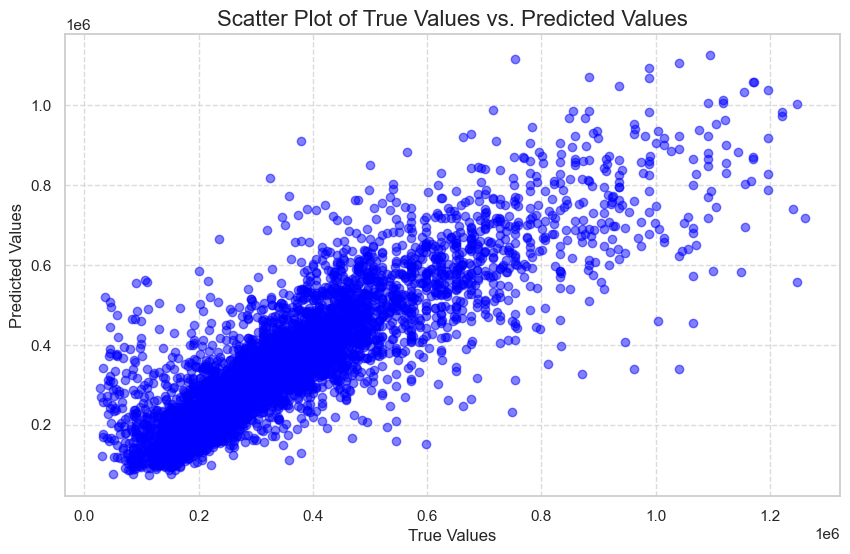

In [561]:
from sklearn.linear_model import Ridge
# Evaluating a Ridge model on the training and test data
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.7523865210130113
Testing score : 0.7590528800255262


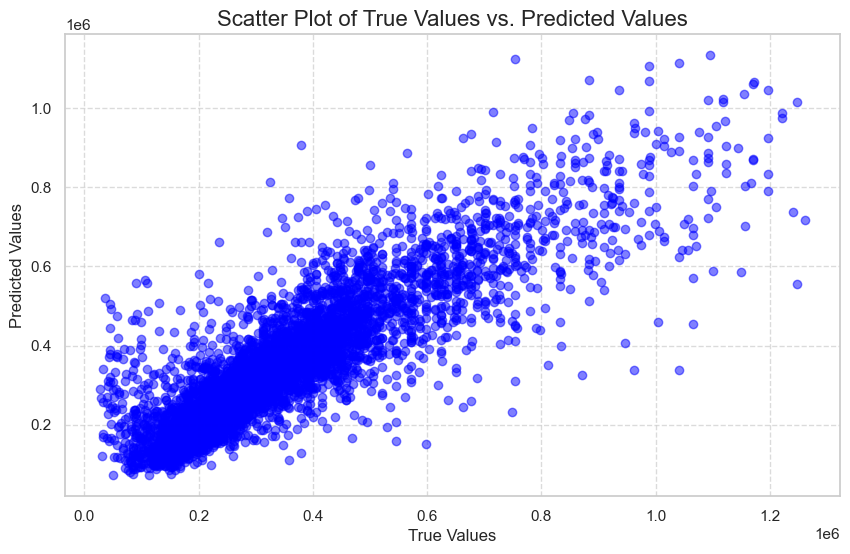

In [562]:
from sklearn.linear_model import Lasso
# Evaluating a Lasso model on the training and test data
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9883687532762432
Testing score : 0.581032138449042


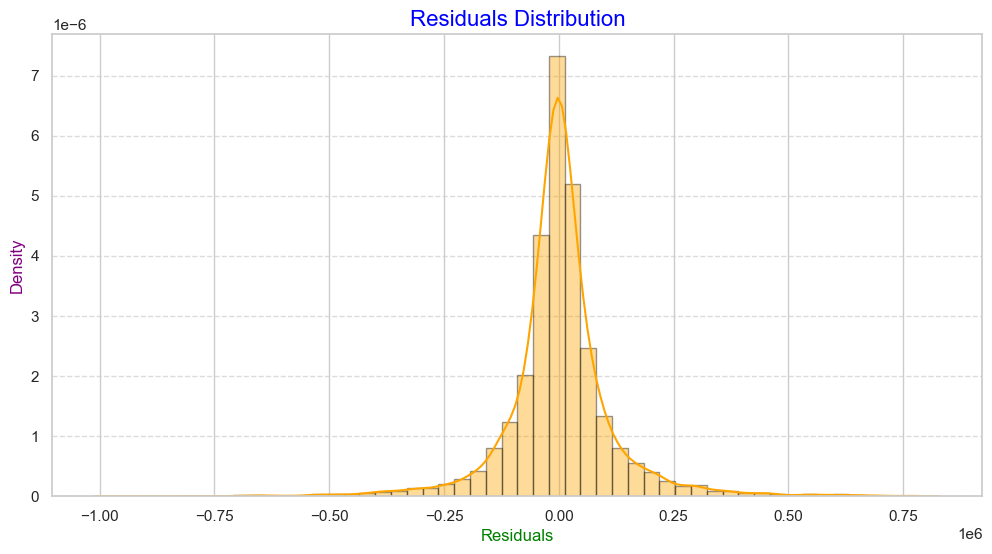

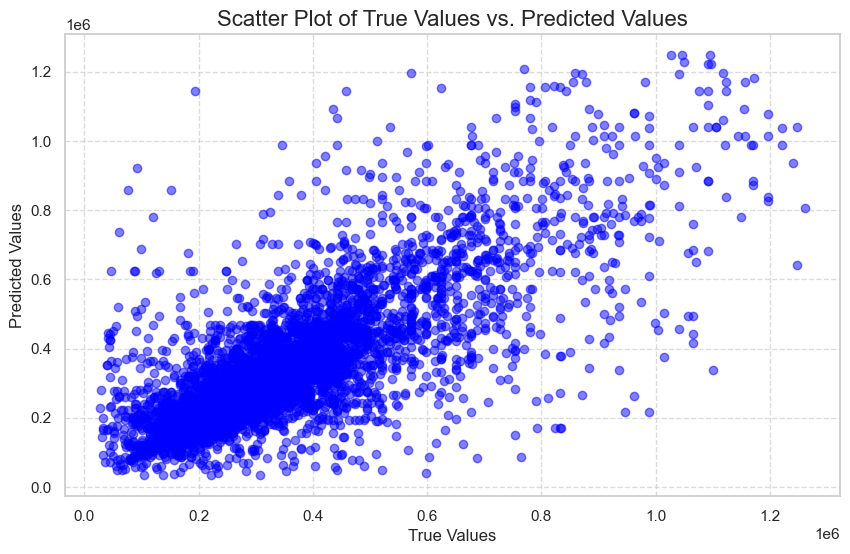

In [563]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

Training score : 0.7523944273748863
Testing score : 0.7589700768890423


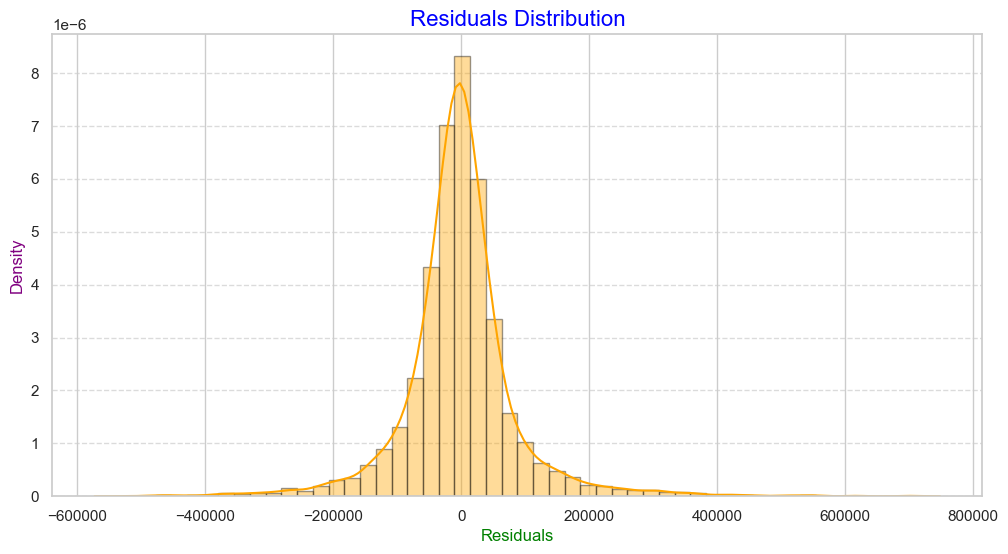

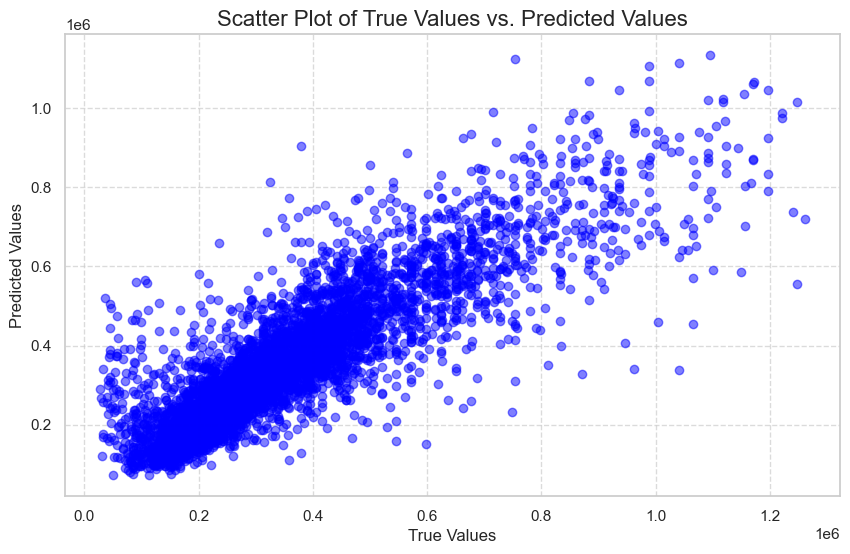

TypeError: cannot unpack non-iterable NoneType object

In [564]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Perth City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/perth/columns.json","w") as f:
    f.write(json.dumps(columns))

## Model for Dubai 

In [299]:
dubai_data.head()

City      Location    Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Dubai  Akoya Oxygen  1720.984012        3.0      1000000         3   
1  Dubai  Akoya Oxygen  1702.984179        3.0       999999         3   
2  Dubai  Akoya Oxygen  1702.984179        4.0      1112000         3   
3  Dubai  Akoya Oxygen  1880.982525        4.0      1582127         3   
4  Dubai  Akoya Oxygen  2452.977211        5.0      1350000         5   

   Price_GBP  
0  210000.00  
1  209999.79  
2  233520.00  
3  332246.67  
4  283500.00

In [300]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Dubai's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(dubai_data.Location)
dummies.head(3)

Akoya Oxygen  Al Barari  Al Barsha  Al Furjan  Al Quoz  Al Sufouh  \
0          True      False      False      False    False      False   
1          True      False      False      False    False      False   
2          True      False      False      False    False      False   

   Al Warsan  Arabian Ranches  Arabian Ranches 2  Arabian Ranches 3  ...  \
0      False            False              False              False  ...   
1      False            False              False              False  ...   
2      False            False              False              False  ...   

   The Lakes  The Meadows  The Springs  The Views  The Villa  \
0      False        False        False      False      False   
1      False        False        False      False      False   
2      False        False        False      False      False   

   The World Islands  Town Square  Umm Suqeim  Wasl Gate  World Trade Centre  
0              False        False       False      False               False  
1              False        False       False      False               False  
2              False        False       False      False               False  

[3 rows x 76 columns]

In [301]:
dummies2 = pd.get_dummies(dubai_data.City)
dummies2.head(3)

Dubai
0   True
1   True
2   True

In [302]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
dubai_data = dubai_data.drop(['Location','City'], axis ='columns')
dubai_data.head()

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  1720.984012        3.0      1000000         3  210000.00
1  1702.984179        3.0       999999         3  209999.79
2  1702.984179        4.0      1112000         3  233520.00
3  1880.982525        4.0      1582127         3  332246.67
4  2452.977211        5.0      1350000         5  283500.00

In [303]:
# Concatenating the original dubai_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'
dubai_data = pd.concat([dubai_data,dummies,dummies2],axis='columns')
dubai_data.head(3)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  Akoya Oxygen  \
0  1720.984012        3.0      1000000         3  210000.00          True   
1  1702.984179        3.0       999999         3  209999.79          True   
2  1702.984179        4.0      1112000         3  233520.00          True   

   Al Barari  Al Barsha  Al Furjan  Al Quoz  ...  The Meadows  The Springs  \
0      False      False      False    False  ...        False        False   
1      False      False      False    False  ...        False        False   
2      False      False      False    False  ...        False        False   

   The Views  The Villa  The World Islands  Town Square  Umm Suqeim  \
0      False      False              False        False       False   
1      False      False              False        False       False   
2      False      False              False        False       False   

   Wasl Gate  World Trade Centre  Dubai  
0      False               False   True  
1      False               False   True  
2      False               False   True  

[3 rows x 82 columns]

In [304]:
from sklearn.model_selection import train_test_split
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = dubai_data.drop(['Local_price','Price_GBP'],axis='columns')
X.isna().sum()

Area_sqft             0
Bathrooms             0
Bedrooms              0
Akoya Oxygen          0
Al Barari             0
                     ..
Town Square           0
Umm Suqeim            0
Wasl Gate             0
World Trade Centre    0
Dubai                 0
Length: 80, dtype: int64

In [305]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = dubai_data.Price_GBP
y.head()

0    210000.00
1    209999.79
2    233520.00
3    332246.67
4    283500.00
Name: Price_GBP, dtype: float64

In [306]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_dubai = X
y_dubai = y

In [260]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [261]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 78.12% for Dubai Dataset.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7812556297443711

In [269]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.781193   
1              lasso    0.781205   
2      decision_tree    0.841862   
3      random_forest    0.875662   
4  gradient_boosting    0.841105   
5                svr    0.698032   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  
3  {'criterion': 'absolute_error', 'n_estimators'...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

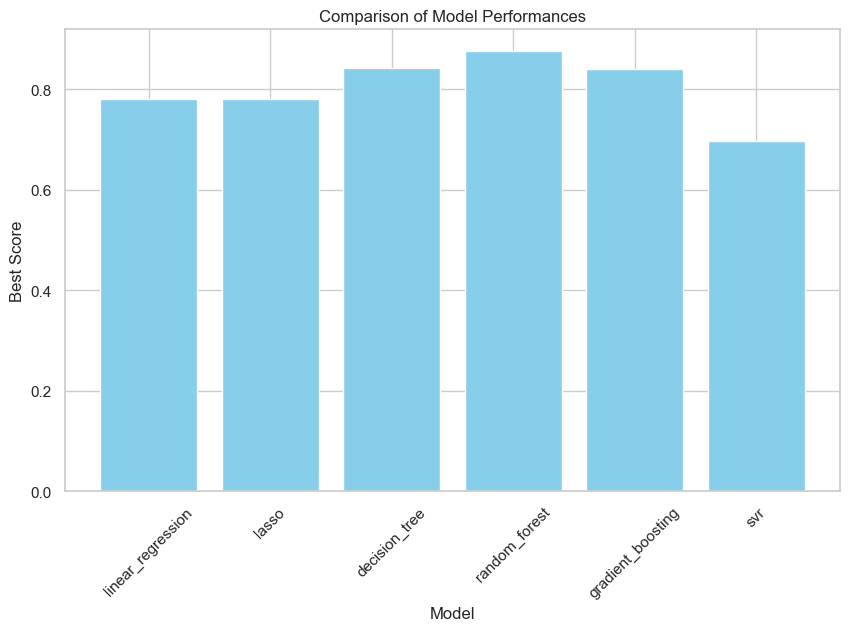

RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [270]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

In [273]:
# Using pickle to export the best model
import pickle
with open('../server/artifacts/dubai/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [275]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.7489218 , 0.75703056, 0.83762692, 0.82892368, 0.85582877])

In [276]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""
evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.8228663106634104
Testing score : 0.7812556297443711


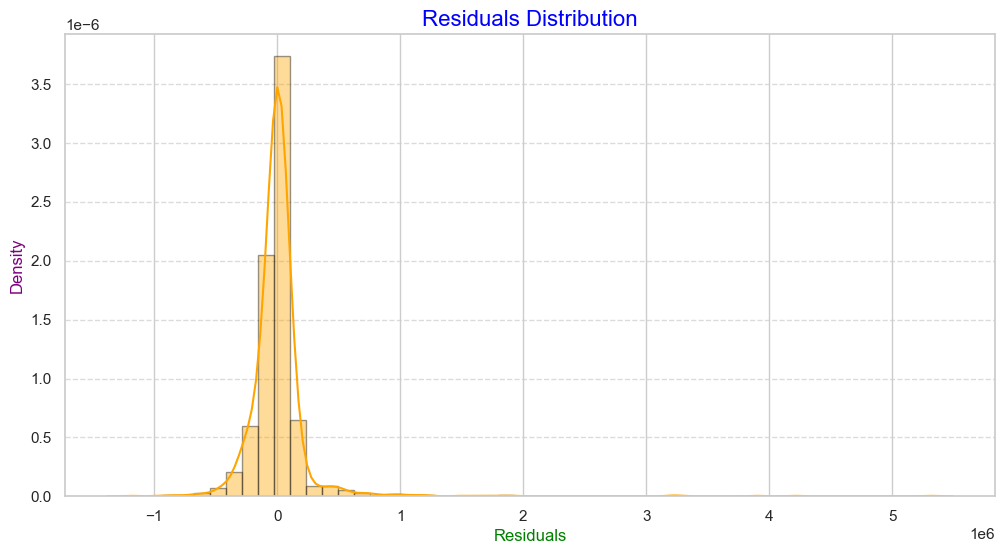

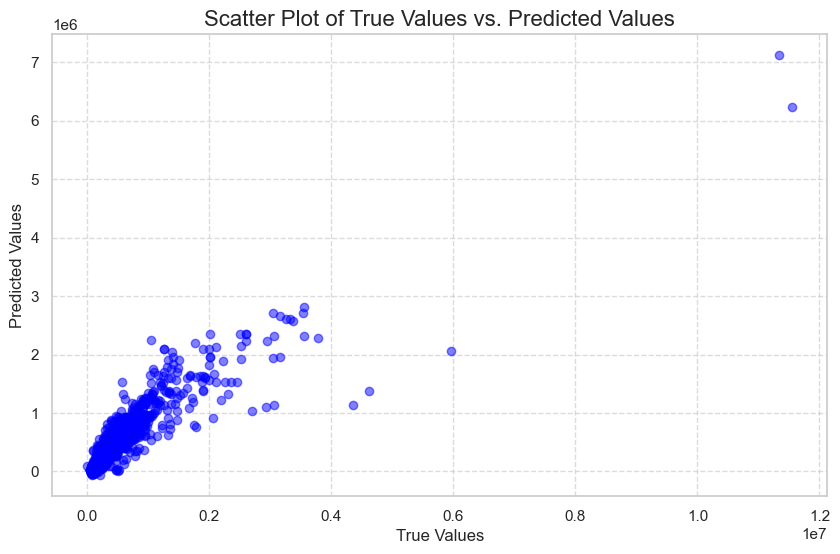

In [277]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.8228002305850465
Testing score : 0.7802517832891839


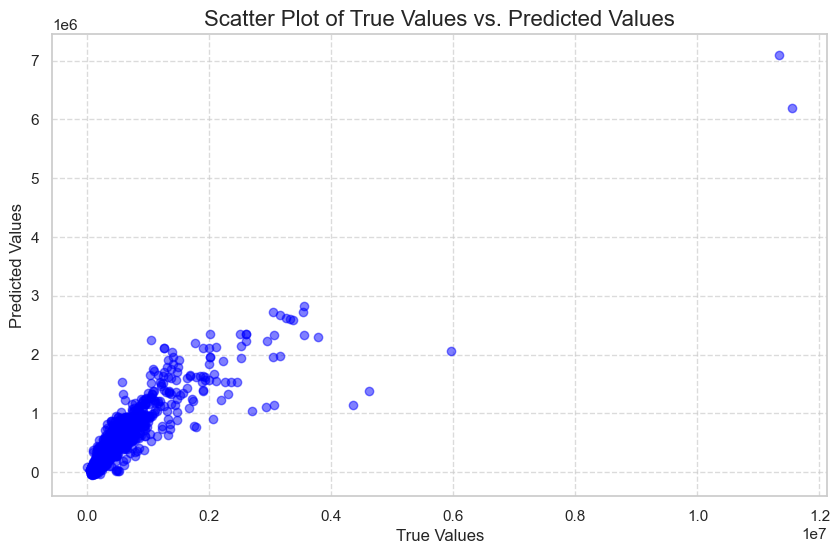

In [278]:
# Evaluating a Ridge model on the training and test data
from sklearn.linear_model import Ridge
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.8228662249191899
Testing score : 0.781253061024237


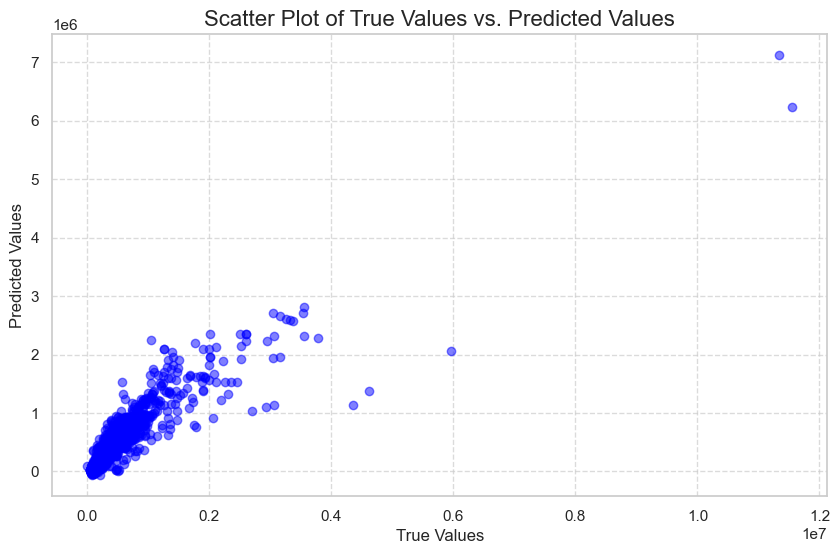

In [279]:
# Evaluating a Lasso model on the training and test data
from sklearn.linear_model import Lasso
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9949652838768481
Testing score : 0.7945390760514812


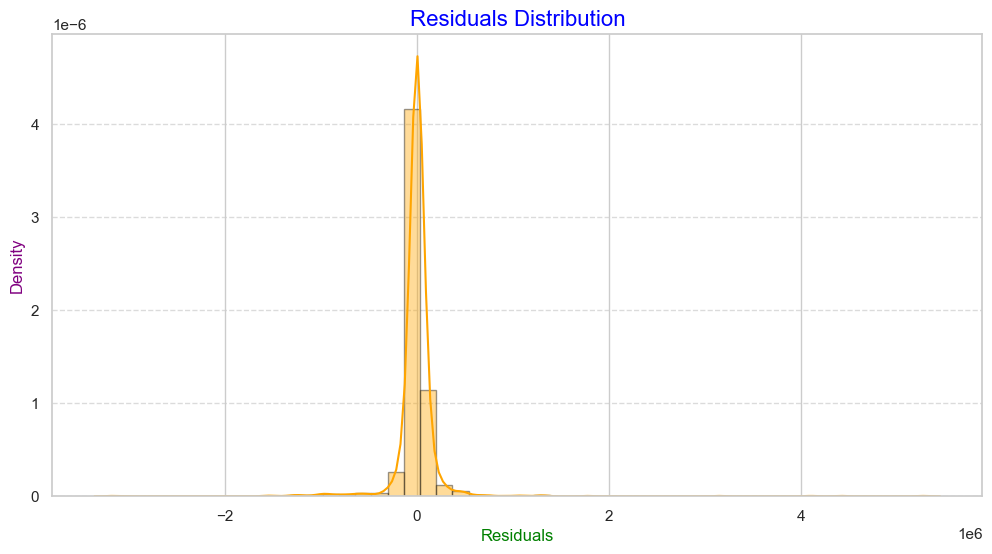

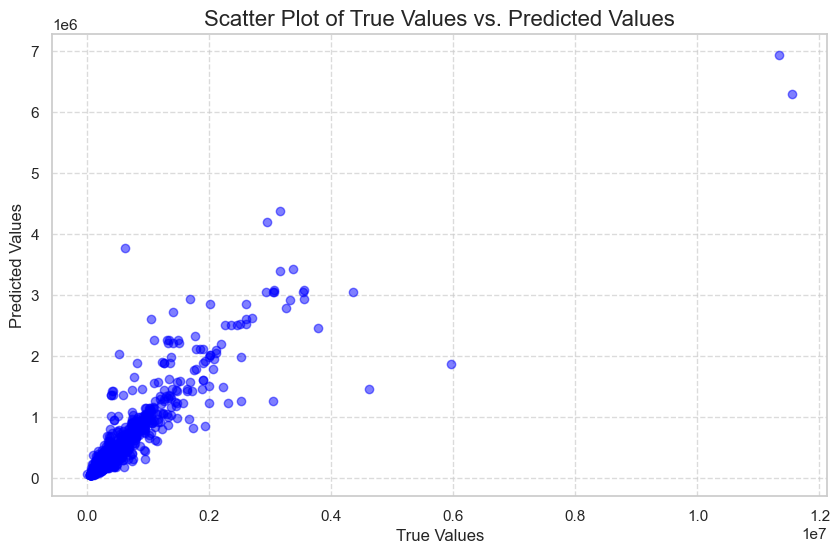

In [280]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [281]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

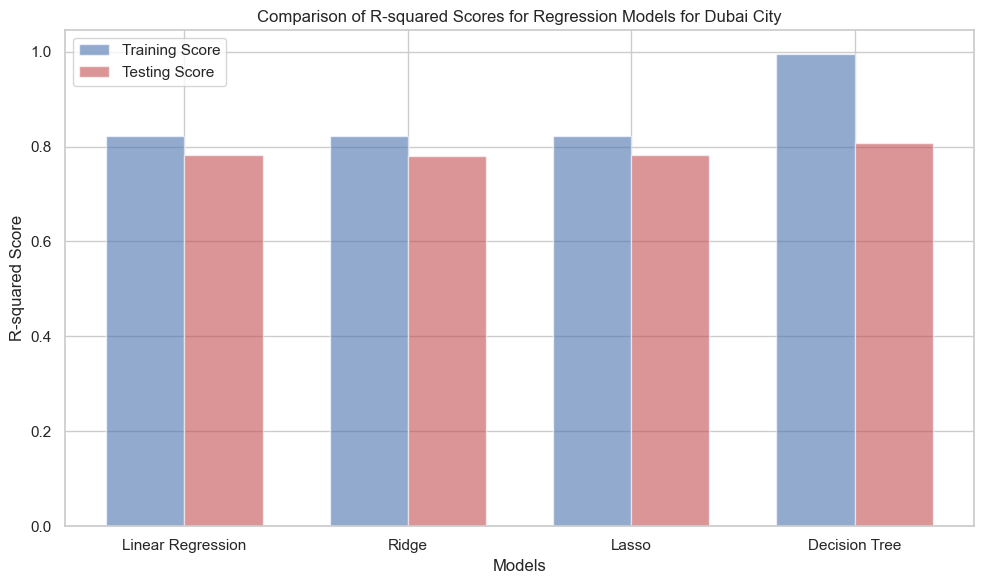

In [282]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Dubai City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [285]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("../server/artifacts/dubai/columns.json","w") as f:
#     f.write(json.dumps(columns))

## Model for Kuala Lumpur

In [307]:
kuala_lumpur_data.head()

City Location   Area_sqft  Bathrooms  Local_price  Bedrooms  \
0  Kuala Lumpur   AMPANG   9536.8154          2       690000         2   
1  Kuala Lumpur   AMPANG  11162.1643          2       568444         3   
2  Kuala Lumpur   AMPANG  17760.4350          2       618000         4   
3  Kuala Lumpur   AMPANG  13454.8750          2       428000         4   
4  Kuala Lumpur   AMPANG   7588.5495          1       450000         1   

   Price_GBP  
0  110400.00  
1   90951.04  
2   98880.00  
3   68480.00  
4   72000.00

In [308]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Kuala Lumpur's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(kuala_lumpur_data.Location)
dummies.head(3)

AMPANG  BANDAR TASIK SELATAN  BANGSAR SOUTH  BUKIT BINTANG  BUKITJALIL  \
0    True                 False          False          False       False   
1    True                 False          False          False       False   
2    True                 False          False          False       False   

   CHERAS  DESA PETALING  KEPONG  KUCHAI LAMA  PANDAN INDAH  SENTUL  \
0   False          False   False        False         False   False   
1   False          False   False        False         False   False   
2   False          False   False        False         False   False   

   SETIAWANGSA  SRI DAMANSARA  TAMAN MELAWATI  
0        False          False           False  
1        False          False           False  
2        False          False           False

In [309]:
dummies2 = pd.get_dummies(kuala_lumpur_data.City)
dummies2.head(3)

Kuala Lumpur
0          True
1          True
2          True

In [310]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
kuala_lumpur_data = kuala_lumpur_data.drop(['Location'], axis ='columns')
kuala_lumpur_data.head()

City   Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0  Kuala Lumpur   9536.8154          2       690000         2  110400.00
1  Kuala Lumpur  11162.1643          2       568444         3   90951.04
2  Kuala Lumpur  17760.4350          2       618000         4   98880.00
3  Kuala Lumpur  13454.8750          2       428000         4   68480.00
4  Kuala Lumpur   7588.5495          1       450000         1   72000.00

In [311]:
kuala_lumpur_data = kuala_lumpur_data.drop(['City'], axis ='columns')
kuala_lumpur_data.head()

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0   9536.8154          2       690000         2  110400.00
1  11162.1643          2       568444         3   90951.04
2  17760.4350          2       618000         4   98880.00
3  13454.8750          2       428000         4   68480.00
4   7588.5495          1       450000         1   72000.00

In [312]:
# Concatenating the original kuala_lumpur_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'
kuala_lumpur_data = pd.concat([kuala_lumpur_data,dummies,dummies2],axis='columns')
kuala_lumpur_data.head(3)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  AMPANG  \
0   9536.8154          2       690000         2  110400.00    True   
1  11162.1643          2       568444         3   90951.04    True   
2  17760.4350          2       618000         4   98880.00    True   

   BANDAR TASIK SELATAN  BANGSAR SOUTH  BUKIT BINTANG  BUKITJALIL  CHERAS  \
0                 False          False          False       False   False   
1                 False          False          False       False   False   
2                 False          False          False       False   False   

   DESA PETALING  KEPONG  KUCHAI LAMA  PANDAN INDAH  SENTUL  SETIAWANGSA  \
0          False   False        False         False   False        False   
1          False   False        False         False   False        False   
2          False   False        False         False   False        False   

   SRI DAMANSARA  TAMAN MELAWATI  Kuala Lumpur  
0          False           False          True  
1          False           False          True  
2          False           False          True

In [313]:
from sklearn.model_selection import train_test_split
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = kuala_lumpur_data.drop(['Local_price','Price_GBP'],axis='columns')

X.isna().sum()

Area_sqft               0
Bathrooms               0
Bedrooms                0
AMPANG                  0
BANDAR TASIK SELATAN    0
BANGSAR SOUTH           0
BUKIT BINTANG           0
BUKITJALIL              0
CHERAS                  0
DESA PETALING           0
KEPONG                  0
KUCHAI LAMA             0
PANDAN INDAH            0
SENTUL                  0
SETIAWANGSA             0
SRI DAMANSARA           0
TAMAN MELAWATI          0
Kuala Lumpur            0
dtype: int64

In [314]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = kuala_lumpur_data.Price_GBP
y.head()

0    110400.00
1     90951.04
2     98880.00
3     68480.00
4     72000.00
Name: Price_GBP, dtype: float64

In [315]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_kuala_lumpur = X
y_kuala_lumpur = y

In [288]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=10: Ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [289]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 63% for Kuala Lumpur Dataset.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.632499484403412

In [296]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.722258   
1              lasso    0.722257   
2      decision_tree    0.707798   
3      random_forest    0.788426   
4  gradient_boosting    0.754718   
5                svr    0.587511   

                                         best_params  
0                                   {'n_jobs': None}  
1              {'alpha': 0.1, 'selection': 'random'}  
2  {'criterion': 'absolute_error', 'splitter': 'b...  
3  {'criterion': 'absolute_error', 'n_estimators'...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
5                       {'C': 1, 'kernel': 'linear'}

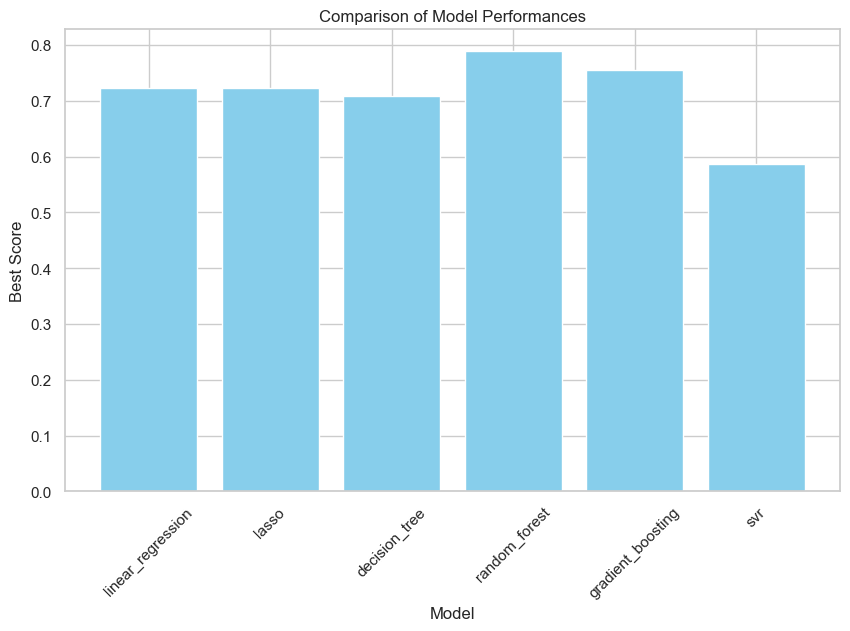

RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [297]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

In [298]:
# Using pickle to export the best model
with open('../server/artifacts/kuala_lumpur/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [300]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Creating ShuffleSplit cross-validator with 5 splits and 20% test size
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# Performing cross-validation for LinearRegression model, this returns an array of scores of the estimator for each run of the cross-validation.
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.7283693 , 0.71920337, 0.71920279, 0.71179562, 0.71526631])

In [301]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""
evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.731637981937092
Testing score : 0.632499484403412


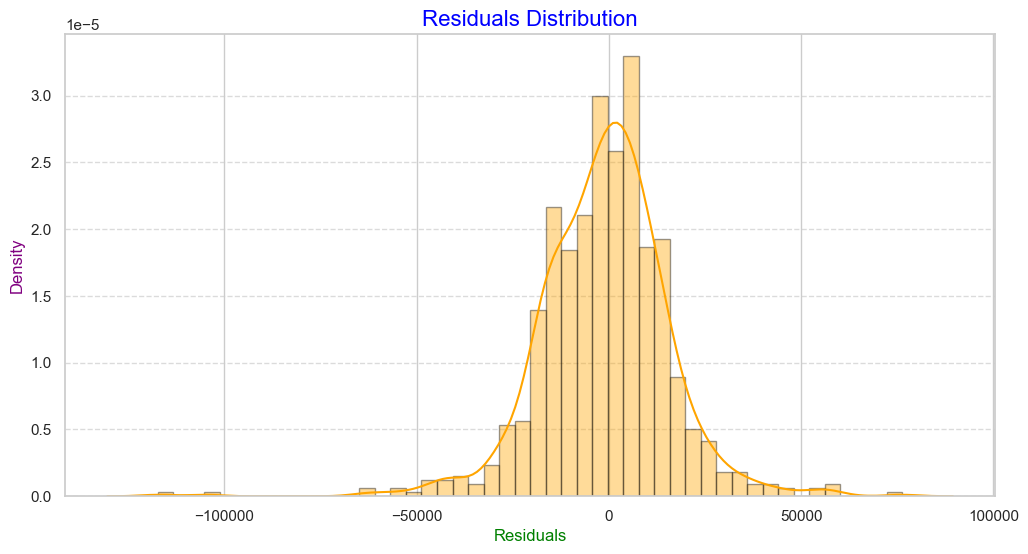

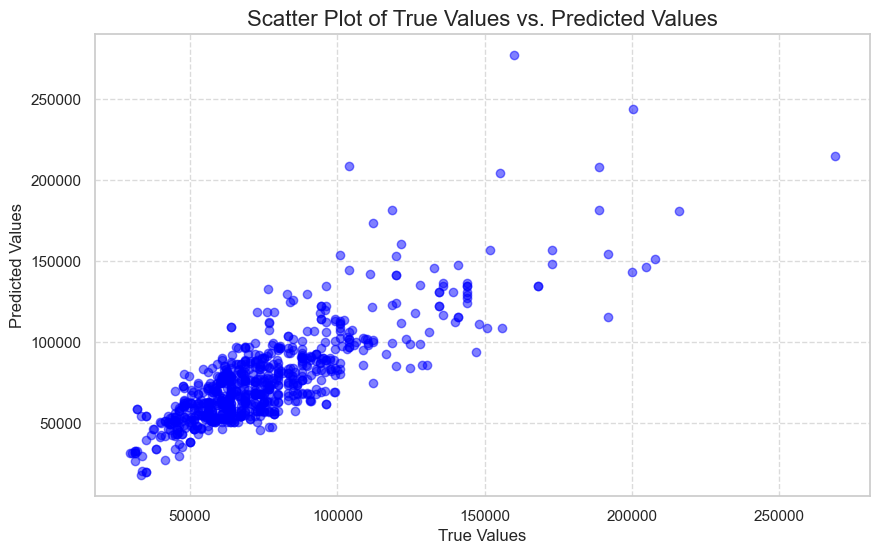

In [302]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.7316320495846991
Testing score : 0.6327285509618599


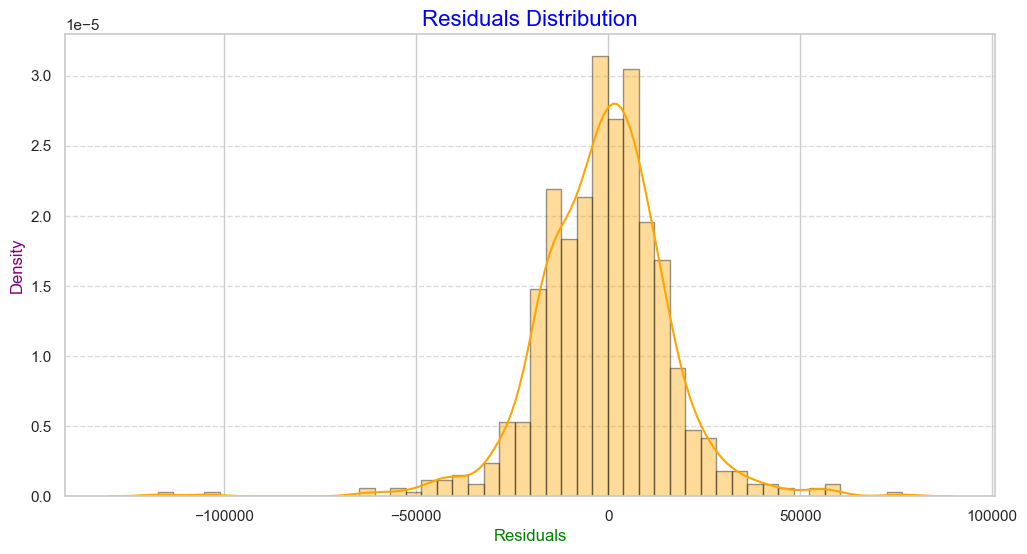

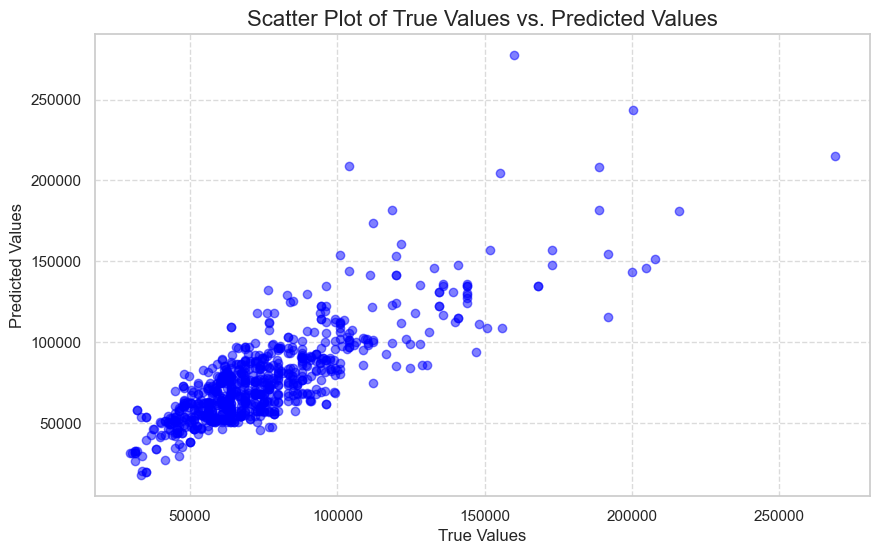

In [303]:
# Evaluating a Ridge model on the training and test data
from sklearn.linear_model import Ridge
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.7316375216670139
Testing score : 0.6325019509617611


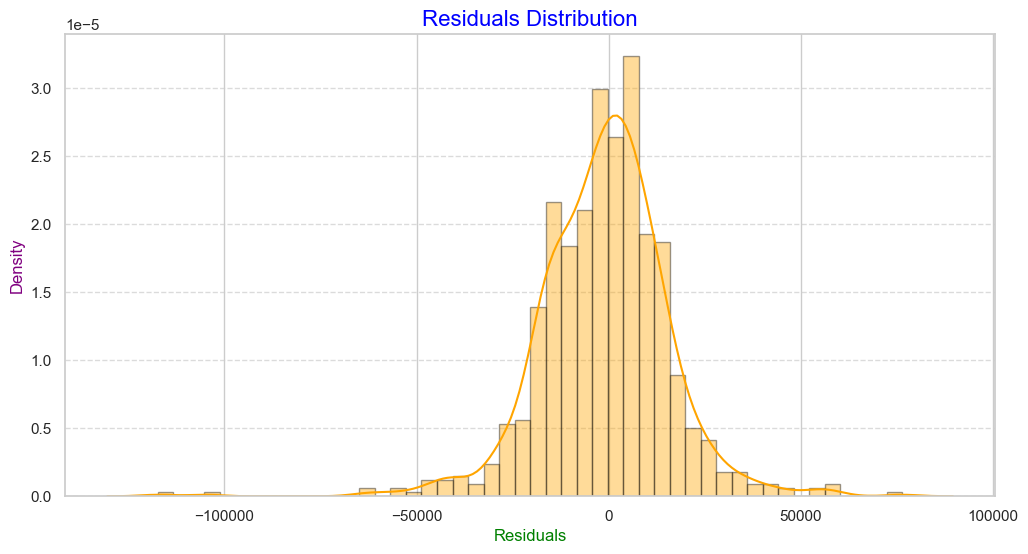

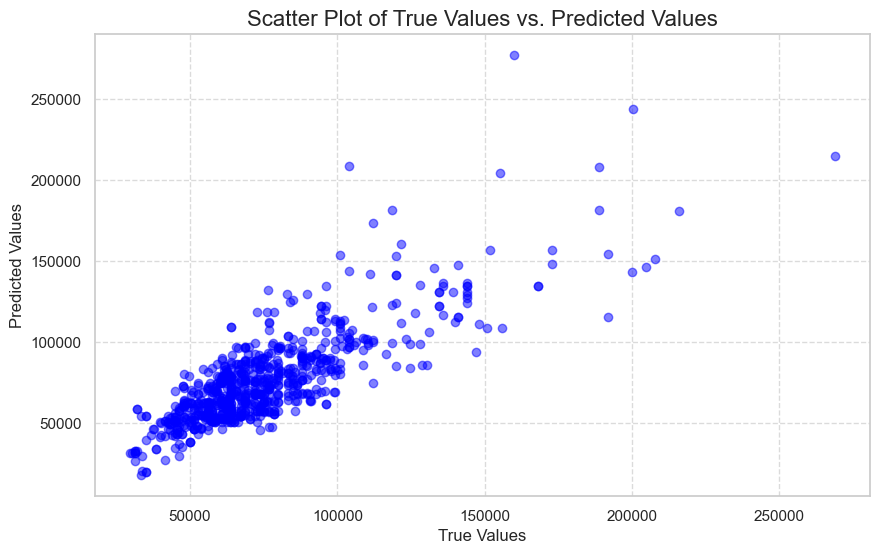

In [304]:
# Evaluating a Lasso model on the training and test data
from sklearn.linear_model import Lasso
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : 0.9806255313239173
Testing score : 0.6558445771948522


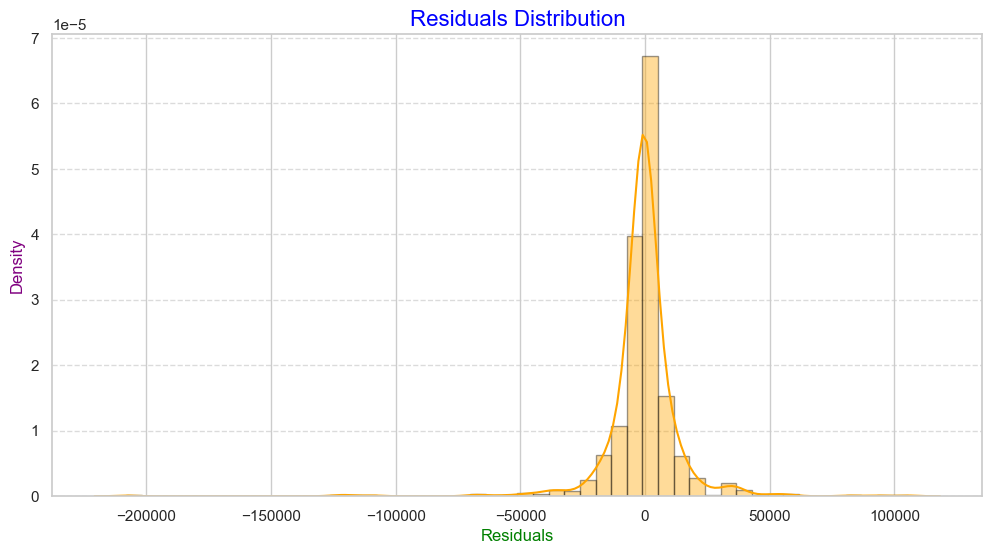

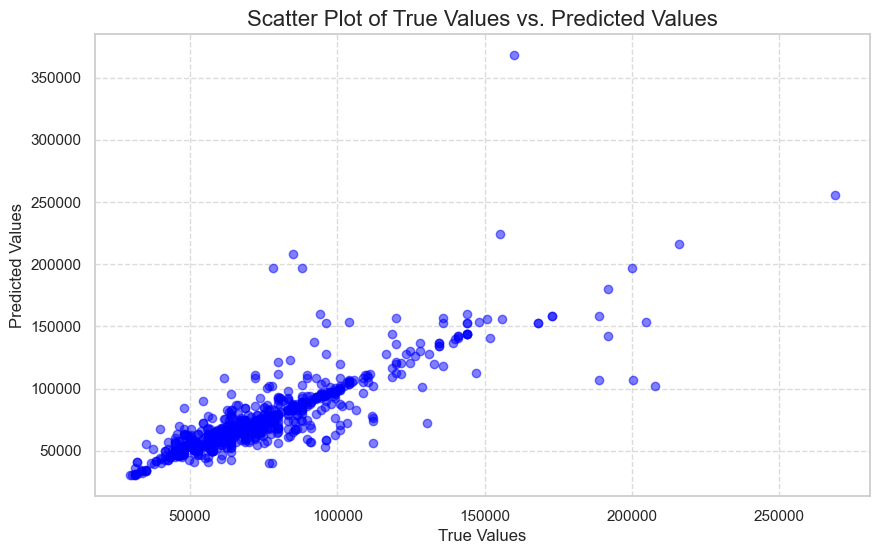

In [305]:
# Evaluating a Decision Tree model on the training and test data
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [306]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

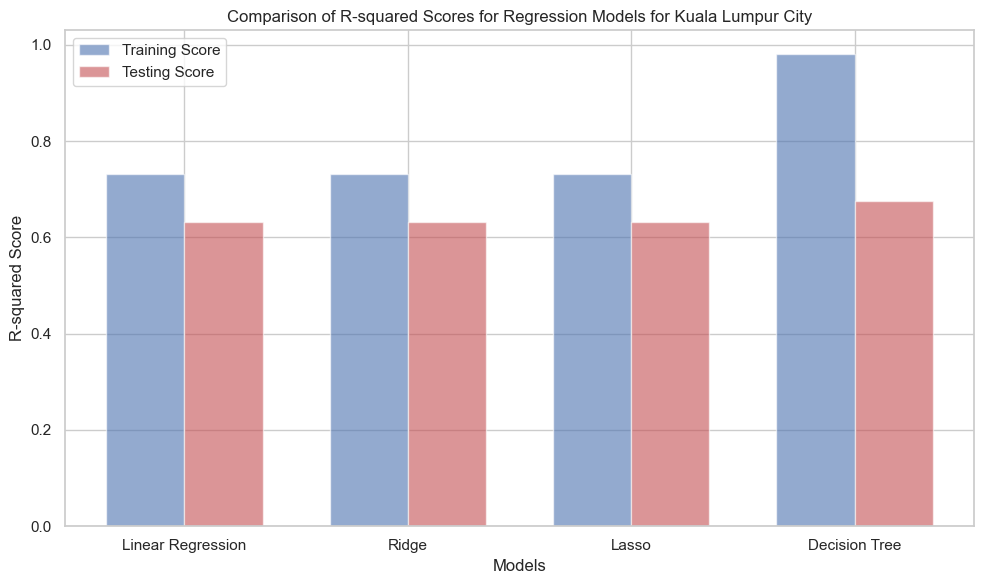

In [307]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Kuala Lumpur City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [310]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/kuala_lumpur/columns.json","w") as f:
    f.write(json.dumps(columns))

## Model for Lisbon

In [316]:
lisbon_data.head()

City                 Location  Area_sqft  Bathrooms  Local_price  \
0  Lisbon                  Olivais   818.0564          1       198000   
1  Lisbon                Alcantara  2045.1410          3      1270000   
2  Lisbon                  Estrela   279.8614          1       140000   
3  Lisbon  Sao Domingos de Benfica  1991.3215          4       995000   
4  Lisbon                  Arroios  1614.5850          1       570000   

   Bedrooms  Price_GBP  
0         3   168300.0  
1         5  1079500.0  
2         1   119000.0  
3         5   845750.0  
4         7   484500.0

In [317]:
# pd.get_dummies() function in pandas performs one-hot encoding by converting categorical data into binary,
# Here Lisbon's location and City column are converted into binary for model prediction
dummies = pd.get_dummies(lisbon_data.Location)
dummies.head(3)

Ajuda  Alcantara  Alvalade  Areeiro  Arroios  Avenidas Novas  Beato  Belem  \
0  False      False     False    False    False           False  False  False   
1  False       True     False    False    False           False  False  False   
2  False      False     False    False    False           False  False  False   

   Benfica  Campo de Ourique  ...  Marvila  Misericordia  Olivais  \
0    False             False  ...    False         False     True   
1    False             False  ...    False         False    False   
2    False             False  ...    False         False    False   

   Parque das Nacoes  Penha de Franca  Santa Clara  Santa Maria Maior  \
0              False            False        False              False   
1              False            False        False              False   
2              False            False        False              False   

   Santo Antonio  Sao Domingos de Benfica  Sao Vicente  
0          False                    False        False  
1          False                    False        False  
2          False                    False        False  

[3 rows x 24 columns]

In [318]:
dummies2 = pd.get_dummies(lisbon_data.City)
dummies2.head(3)

Lisbon
0    True
1    True
2    True

In [319]:
# Dropping the Location and City column as we have already concatenated the dummies (Binary).
lisbon_data = lisbon_data.drop(['Location','City'], axis ='columns')
lisbon_data.head()

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP
0   818.0564          1       198000         3   168300.0
1  2045.1410          3      1270000         5  1079500.0
2   279.8614          1       140000         1   119000.0
3  1991.3215          4       995000         5   845750.0
4  1614.5850          1       570000         7   484500.0

In [320]:
# Concatenating the original lisbon_data DataFrame with the dummy DataFrames 'dummies' and 'dummies2'
lisbon_data = pd.concat([lisbon_data,dummies,dummies2],axis='columns')
lisbon_data.head(3)

Area_sqft  Bathrooms  Local_price  Bedrooms  Price_GBP  Ajuda  Alcantara  \
0   818.0564          1       198000         3   168300.0  False      False   
1  2045.1410          3      1270000         5  1079500.0  False       True   
2   279.8614          1       140000         1   119000.0  False      False   

   Alvalade  Areeiro  Arroios  ...  Misericordia  Olivais  Parque das Nacoes  \
0     False    False    False  ...         False     True              False   
1     False    False    False  ...         False    False              False   
2     False    False    False  ...         False    False              False   

   Penha de Franca  Santa Clara  Santa Maria Maior  Santo Antonio  \
0            False        False              False          False   
1            False        False              False          False   
2            False        False              False          False   

   Sao Domingos de Benfica  Sao Vicente  Lisbon  
0                    False        False    True  
1                    False        False    True  
2                    False        False    True  

[3 rows x 30 columns]

In [321]:
from sklearn.model_selection import train_test_split
# For model prediction, using all the variables except Local Price and Price_GBP in independent variable X.
X = lisbon_data.drop(['Local_price','Price_GBP'],axis='columns')

X.isna().sum()

Area_sqft                  0
Bathrooms                  0
Bedrooms                   0
Ajuda                      0
Alcantara                  0
Alvalade                   0
Areeiro                    0
Arroios                    0
Avenidas Novas             0
Beato                      0
Belem                      0
Benfica                    0
Campo de Ourique           0
Campolide                  0
Carnide                    0
Estrela                    0
Lumiar                     0
Marvila                    0
Misericordia               0
Olivais                    0
Parque das Nacoes          0
Penha de Franca            0
Santa Clara                0
Santa Maria Maior          0
Santo Antonio              0
Sao Domingos de Benfica    0
Sao Vicente                0
Lisbon                     0
dtype: int64

In [322]:
# To predict the price in GBP, using Price_GBP as a Target variable.
y = lisbon_data.Price_GBP
y.head()

0     168300.0
1    1079500.0
2     119000.0
3     845750.0
4     484500.0
Name: Price_GBP, dtype: float64

In [323]:
# Storing this X and Y in another variable, so that it can be used while plotting learning curve, that is at the end of this code.
X_lisbon = X
y_lisbon = y

In [324]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [325]:
# Performing Linear Regression as a base model to know how out basic model is performing, and it is having accuracy of 66% for Lisbon Dataset.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6602927478242575

In [322]:
# Calling the function using X,y and algos as a parameter and storing the resultant dataframe in result_df variable
result_df = find_best_model_using_gridsearchcv(X,y,algos)
result_df

model  best_score  \
0  linear_regression    0.653859   
1              lasso    0.652946   
2      decision_tree    0.750955   
3      random_forest    0.784950   
4  gradient_boosting    0.759662   
5                svr    0.645117   

                                         best_params  
0                                   {'n_jobs': None}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'absolute_error', 'splitter': 'b...  
3  {'criterion': 'absolute_error', 'n_estimators'...  
4         {'learning_rate': 0.1, 'n_estimators': 50}  
5                       {'C': 1, 'kernel': 'linear'}

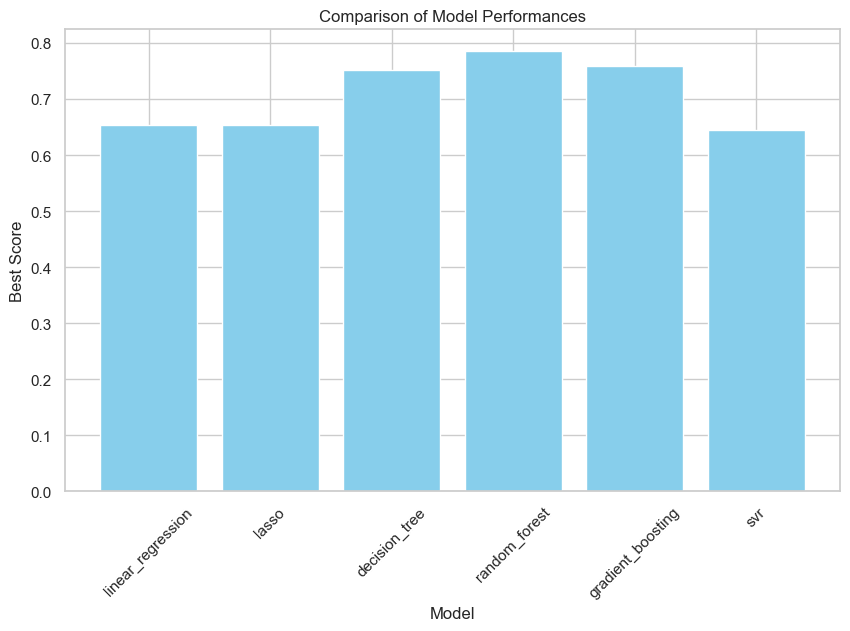

RandomForestRegressor(criterion='absolute_error', n_estimators=50)

In [323]:
# Plotting comparison graph for models
plt.figure(figsize=(10, 6))
plt.bar(result_df['model'], result_df['best_score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()

# Saving the best model so that it can be exported and can be used as backend for model deployment.
best_model_info = result_df.loc[result_df['best_score'].idxmax()]
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

best_model = algos[best_model_name]['model'].set_params(**best_model_params)
best_model.fit(X, y)

In [324]:
# Using pickle to export the best model
with open('../server/artifacts/lisbon/model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [326]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Creating ShuffleSplit cross-validator with 5 splits and 20% test size
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# Performing cross-validation for LinearRegression model, this returns an array of scores of the estimator for each run of the cross-validation.
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.73995862, 0.61488912, 0.60672964, 0.76497954, 0.78215848])

In [327]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
""" 
Evaluate a machine learning model by training it, calculating performance scores, and generating visualizations.

This function performs the following tasks:
1. Trains the given model using the provided training data.
2. Prints the model's training and testing scores.
3. Appends the model's performance results (training and testing scores) along with the model name to the `evaluation_results` list.
4. Makes predictions on the test set.
5. Plots the distribution of residuals (the differences between true and predicted values) to visualize their spread.
6. Creates a scatter plot comparing the true values with the predicted values to visually assess the model's performance.

Parameters:
- model: An instance of a machine learning model with `fit` and `predict` methods (e.g., from scikit-learn).
- model_name: A string representing the name of the model being evaluated.
"""
evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.7713516572794512
Testing score : 0.6602927478242575


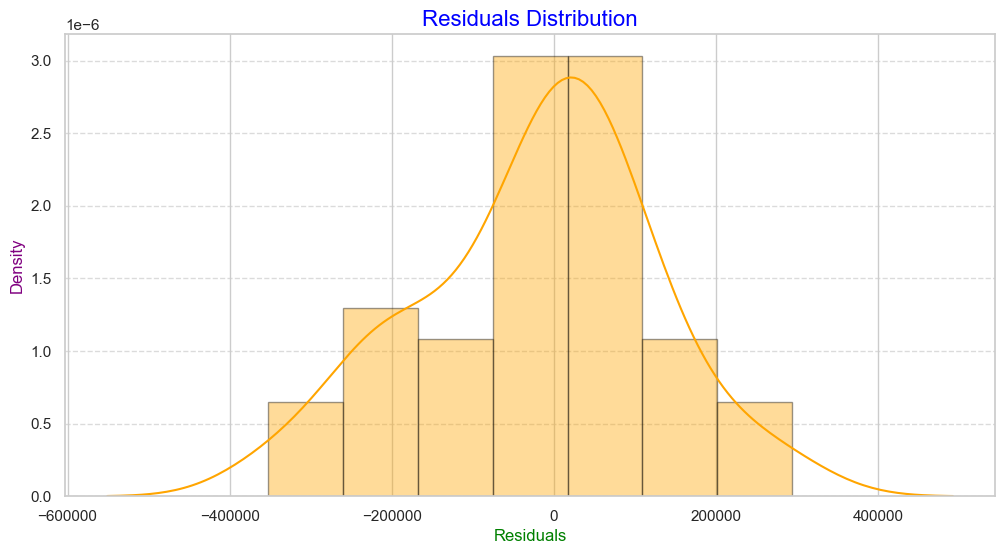

In [328]:
# Evaluating a Linear Regression model on the training and test data
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.7692118083550865
Testing score : 0.7357103628366175


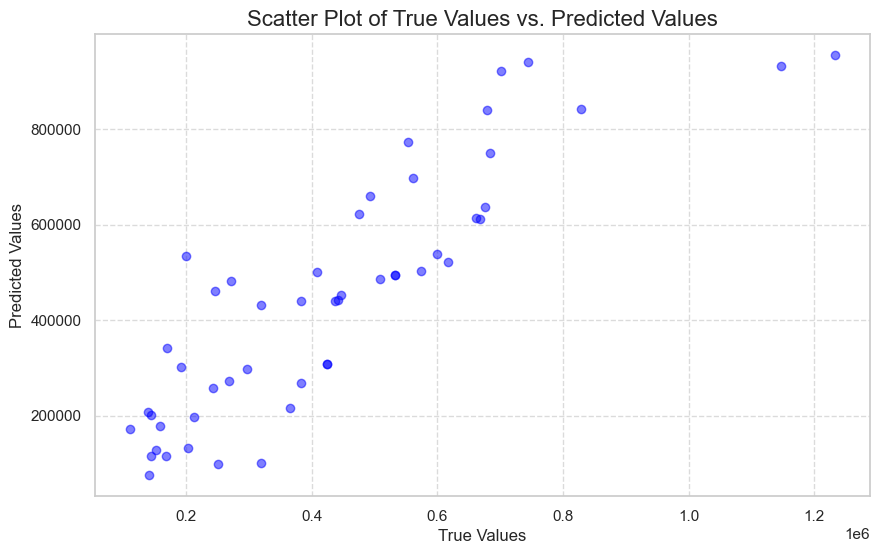

In [329]:
# Evaluating a Ridge model on the training and test data
from sklearn.linear_model import Ridge
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.7713516482520457
Testing score : 0.6599029683327919


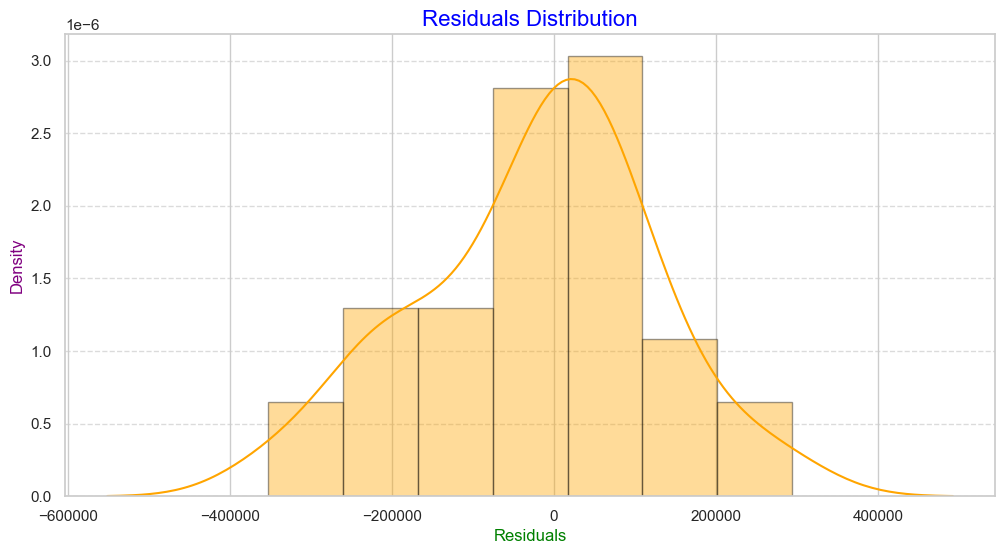

In [330]:
# Evaluating a Lasso model on the training and test data
from sklearn.linear_model import Lasso
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

In [331]:
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

Training score : 0.9997299825396111
Testing score : 0.7806558941503237


In [333]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

evaluation_results = []

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating R-squared scores
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    return training_score, testing_score

In [334]:
# Evaluating models
linear_train_score, linear_test_score = evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
ridge_train_score, ridge_test_score = evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)
lasso_train_score, lasso_test_score = evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)
tree_train_score, tree_test_score = evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

# Plotting accuracies
models = [result["Model"] for result in evaluation_results]
training_scores = [result["Training Score"] for result in evaluation_results]
testing_scores = [result["Testing Score"] for result in evaluation_results]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_scores, bar_width, label='Training Score', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing Score', color='r', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Regression Models for Lisbon City')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()

In [337]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/lisbon/columns.json","w") as f:
    f.write(json.dumps(columns))

## Learning Curve

In [328]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import os

def plot_learning_curve(model, title, X, y, folder_path):
    """
    Plot learning curves for a given model and save them to a folder.
    
    Parameters:
    - model: the model instance (e.g., LinearRegression(), Ridge(), etc.)
    - title: title for the plot
    - X: feature matrix
    - y: target variable
    - folder_path: path to the folder where plots will be saved
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue', marker='o')
    plt.plot(train_sizes, validation_scores_mean, label='Validation score', color='red', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('R-squared Score')
    plt.title(f'Learning Curve for {title}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [1]:
# Example dictionary for cities
cities = {
    'Bangalore': (X_bangalore, y_bangalore),
    'Pune': (X_pune, y_pune),
    'Cairo': (X_cairo, y_cairo),
    'Bangkok': (X_bangkok, y_bangkok),
    'London': (X_london, y_london),
    'Kuala Lumpur': (X_kuala_lumpur, y_kuala_lumpur),
    'Perth': (X_perth, y_perth),
    'Dubai': (X_dubai, y_dubai),
    'Lisbon': (X_lisbon, y_lisbon),
}

# List of models to evaluate
models = [
    (Ridge(), 'Ridge'),
    (Lasso(), 'Lasso'),
    (DecisionTreeRegressor(), 'Decision Tree'),
    (GradientBoostingRegressor(), 'Gradient Boosting'),
    (RandomForestRegressor(), 'Random Forest')
]


NameError: name 'X_bangalore' is not defined

-------------------------------------------------------------------------------------

In [329]:
def plot_learning_curves_for_city(models, city_name, X, y):
    """
    Plot learning curves for multiple models on the same graph for a specific city.
    
    Parameters:
    - models: list of tuples, each containing the model instance and the model name (e.g., [(LinearRegression(), 'Linear Regression'), ...])
    - city_name: name of the city for the plot title
    - X: feature matrix for the city
    - y: target variable for the city
    """
    plt.figure(figsize=(14, 8))
    
    # Define colors for each model
    colors = {
        'Linear Regression': 'blue',
        'Ridge': 'green',
        'Lasso': 'red',
        'Decision Tree': 'purple',
        'Gradient Boosting': 'orange',
        'Random Forest': 'cyan'
    }
    
    for model, name in models:
        color = colors[name]
        train_sizes, train_scores, validation_scores = learning_curve(
            model, X, y, cv=5, scoring='r2', n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10)
        )
        
        validation_scores_mean = np.mean(validation_scores, axis=1)

        plt.plot(train_sizes, validation_scores_mean, label=f'Test score ({name})', color=color, marker='+', linestyle='--')

    plt.xlabel('Training Size')
    plt.ylabel('R-squared Score')
    plt.title(f'Learning Curves for {city_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

PLotting graph for:  Bangalore


PLotting graph for:  Pune


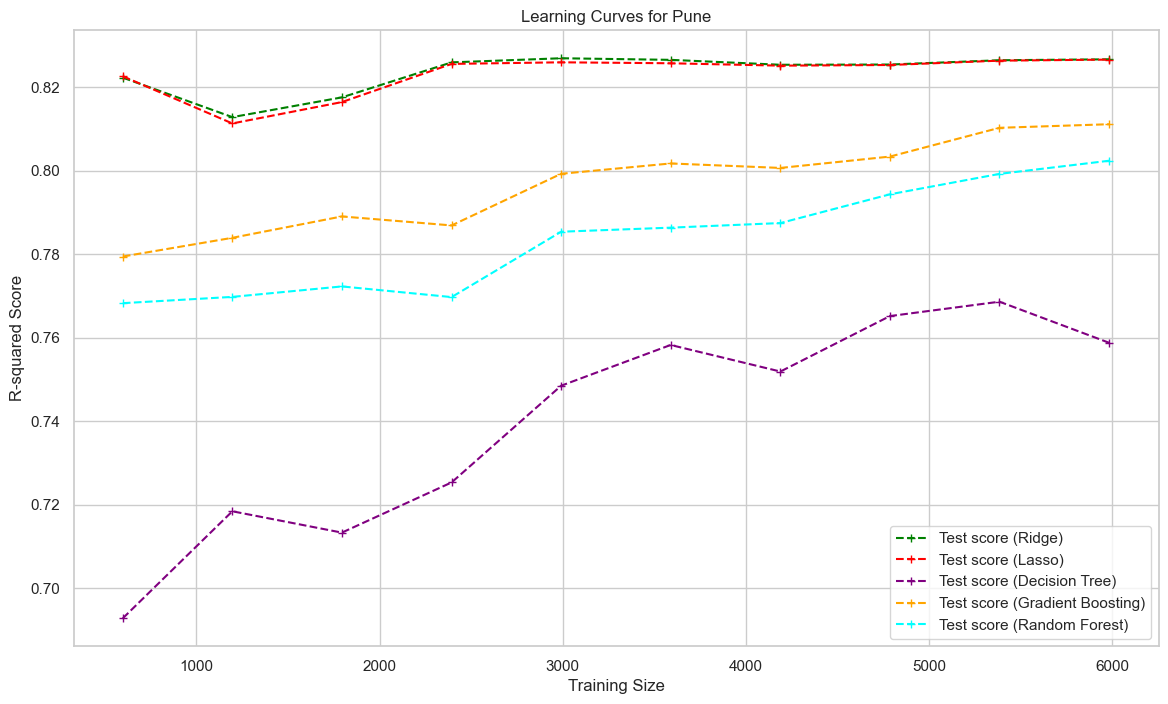

PLotting graph for:  Cairo


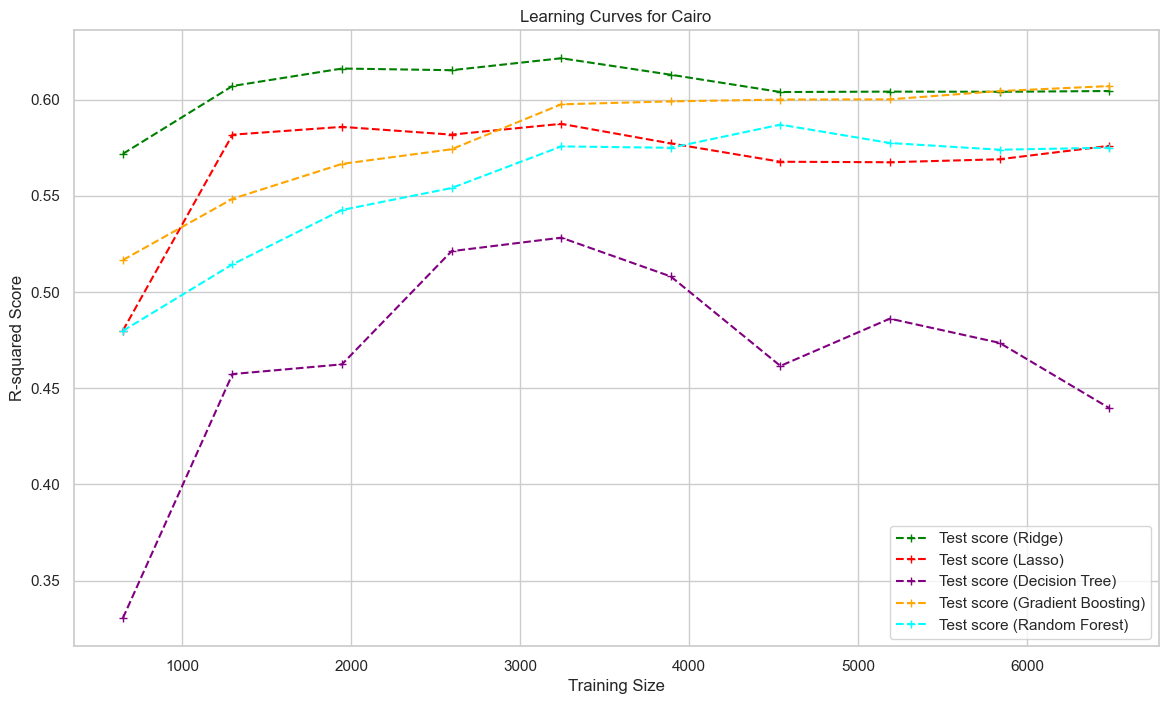

PLotting graph for:  Bangkok


PLotting graph for:  London


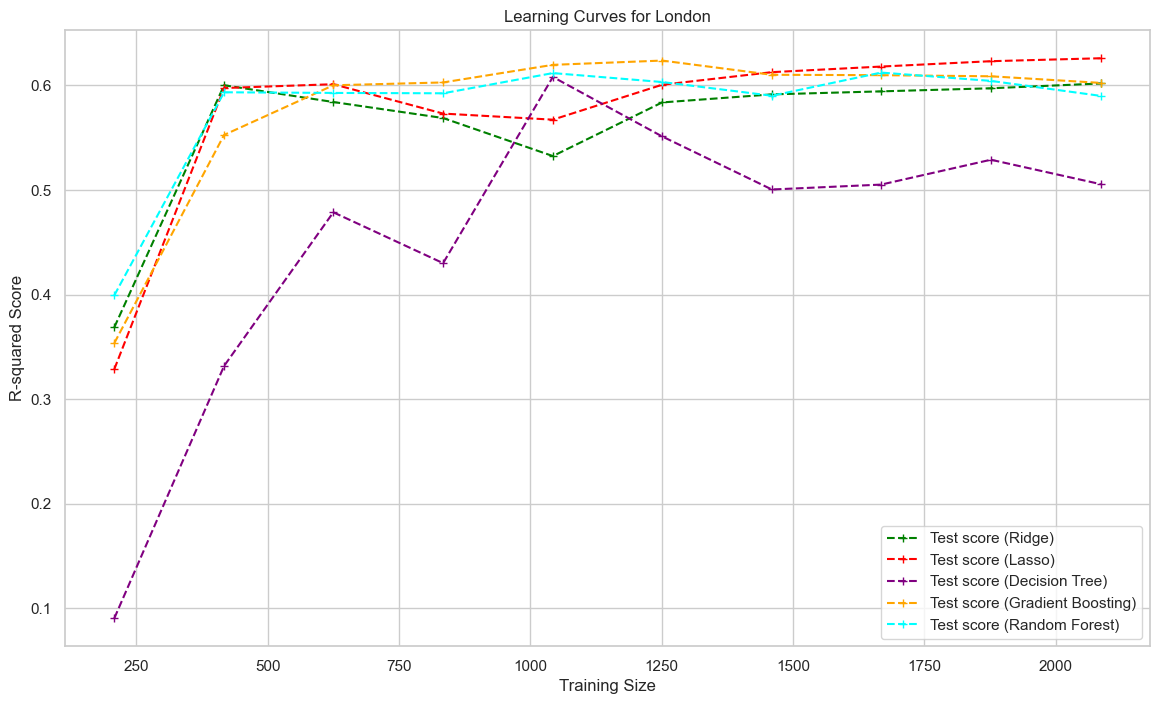

PLotting graph for:  Kuala Lumpur


PLotting graph for:  Perth


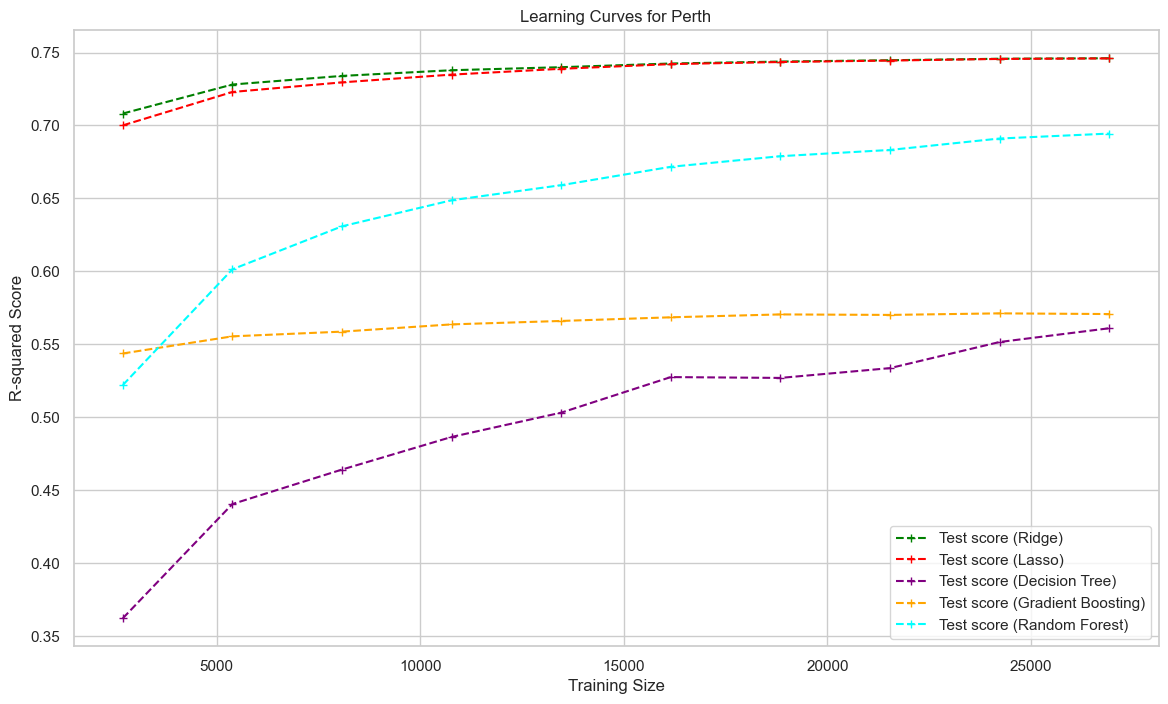

PLotting graph for:  Dubai


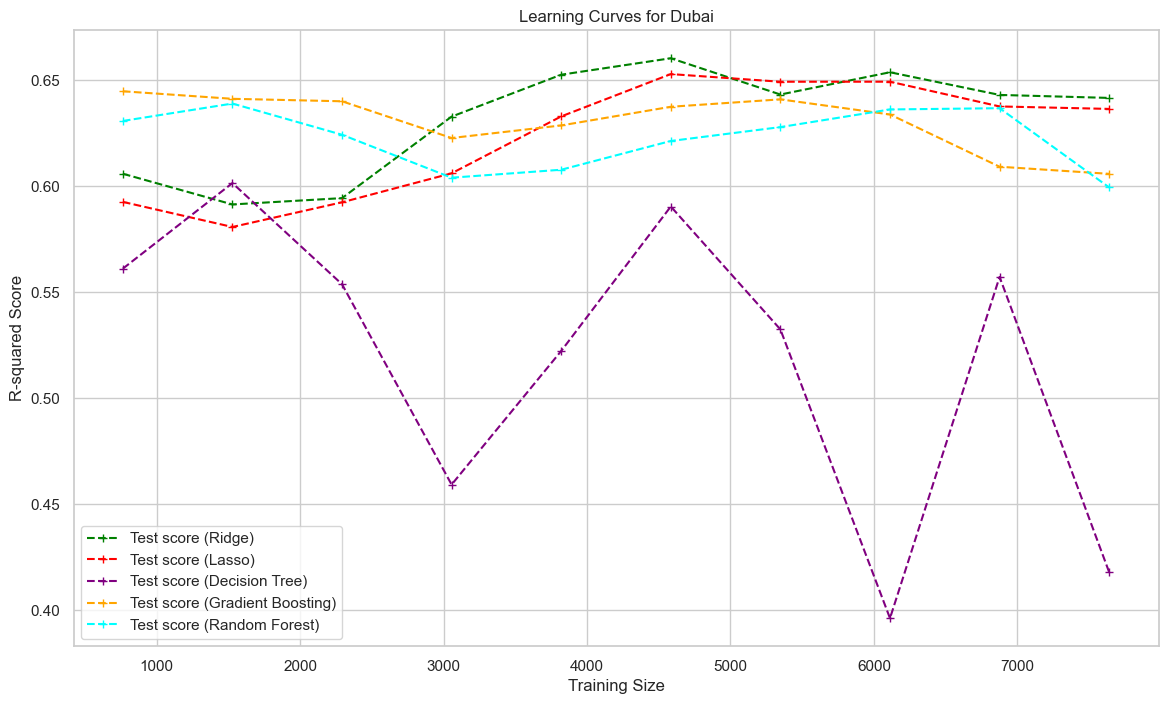

PLotting graph for:  Lisbon


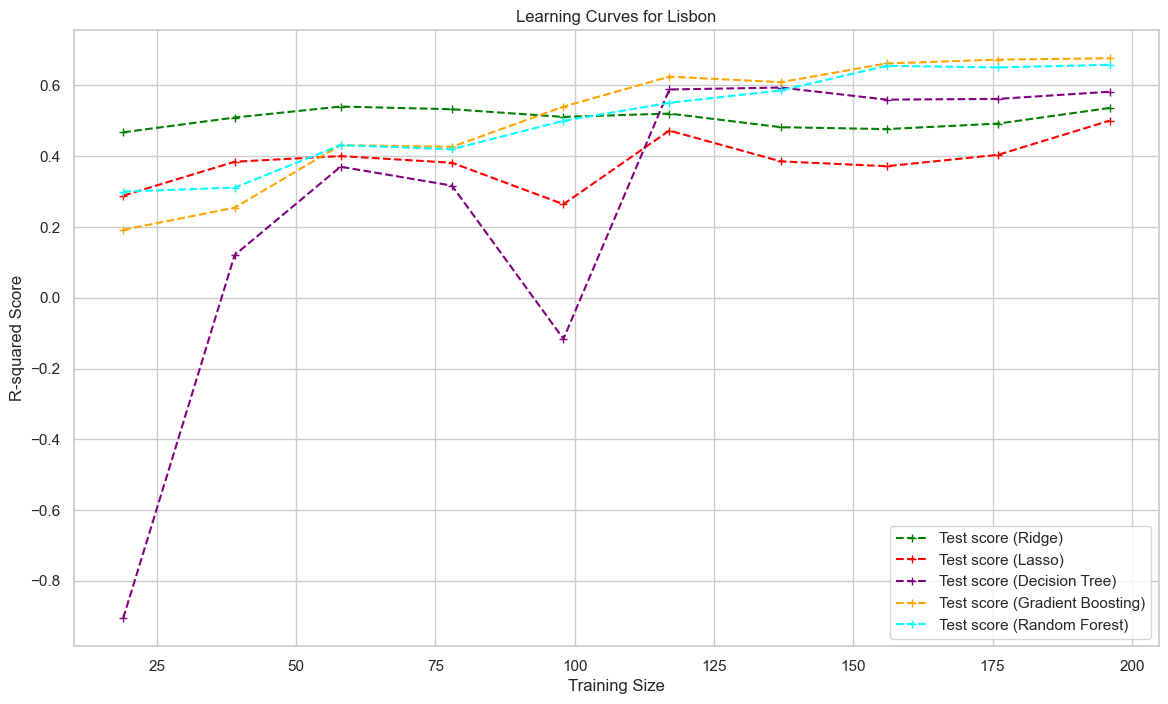

In [330]:
# Example dictionary for cities
cities = {
    'Bangalore': (X_bangalore, y_bangalore),
    'Pune': (X_pune, y_pune),
    'Cairo': (X_cairo, y_cairo),
    'Bangkok': (X_bangkok, y_bangkok),
    'London': (X_london, y_london),
    'Kuala Lumpur': (X_kuala_lumpur, y_kuala_lumpur),
    'Perth': (X_perth, y_perth),
    'Dubai': (X_dubai, y_dubai),
    'Lisbon': (X_lisbon, y_lisbon),
}

# List of models to evaluate
models = [
    (Ridge(), 'Ridge'),
    (Lasso(), 'Lasso'),
    (DecisionTreeRegressor(), 'Decision Tree'),
    (GradientBoostingRegressor(), 'Gradient Boosting'),
    (RandomForestRegressor(), 'Random Forest')
]

# Plot learning curves for each city
for city, (X, y) in cities.items():
    print("PLotting graph for: ", city)
    plot_learning_curves_for_city(models, city, X, y)